In [1]:
import os
from io import StringIO
import datetime
import pandas as pd
import psycopg2
from pprint import pprint 
from operator import itemgetter
from tqdm import tqdm
import json
import glob
import pickle
import seaborn as sns

class CustomEncoder(json.JSONEncoder):
    def default(self, obj):
        try:
            return str(obj)
        except:
            # Handle other types of objects if necessary
            return super().default(obj)

In [2]:
# Connection params
dbname = "FCP"
user = "postgres"
# password = ""
host = "localhost"
port = "5432"

In [3]:

#Connect to FCP and perform some tasks
try:
    connect = psycopg2.connect(dbname=dbname,
                            user=user,
                            password=password,
                            host=host,
                            port=port)
    cursor = connect.cursor()

    # Create the 'final' schema if it doesn't already exist
    cursor.execute("CREATE SCHEMA IF NOT EXISTS final;")

    # Create the 'data' table within the 'final' schema if it doesn't already exist
    cursor.execute("CREATE TABLE IF NOT EXISTS final.data (id serial PRIMARY KEY);") # Change table structure as per your need

    connect.commit()

    # Import files in batches
    folder = '.bugs/'
    batch_size = 100  # Number of files to import in each batch
    file_count = 0
    batch_count = 0

    for f in tqdm(glob.glob(os.path.join(folder, '*.pickle'))):
        data_dictionary = pickle.load(open(f, 'rb'))

        cursor.execute(f"SELECT column_name FROM information_schema.columns WHERE table_schema = 'final' AND table_name = 'data';")
        current_table_columns = cursor.fetchall()
        current_table_columns = set(map(itemgetter(0), current_table_columns))

        current_file_keys = set(data_dictionary.keys())
        not_existing_columns = current_file_keys - current_table_columns

        if len(not_existing_columns) > 0:
            alter_table_commands = ''.join(f"ALTER TABLE final.data ADD COLUMN IF NOT EXISTS {col} jsonb; " for col in not_existing_columns)
            cursor.execute(alter_table_commands)
            connect.commit()

        for k, v in data_dictionary.items():
            data_dictionary[k] = json.dumps(v, cls=CustomEncoder)

        columns = data_dictionary.keys()
        values = list(data_dictionary.values())

        query = "INSERT INTO final.data ({}) VALUES ({})".format(
            ', '.join(columns),
            ', '.join(['%s' for _ in values])
        )

        cursor.execute(query, values)

        file_count += 1

        if file_count >= batch_size:
            connect.commit()
            batch_count += 1
            file_count = 0
            print(f"Batch {batch_count} imported successfully.")

    connect.commit()  # Commit any remaining files in the last batch

except psycopg2.Error as error:
    print("Warning!", error)

finally:
    if connect is not None:
        cursor.close()
        connect.close()

  0%|          | 135/215173 [00:00<20:55, 171.28it/s]

Batch 1 imported successfully.


  0%|          | 215/215173 [00:01<20:15, 176.88it/s]

Batch 2 imported successfully.


  0%|          | 324/215173 [00:01<21:03, 170.04it/s]

Batch 3 imported successfully.


  0%|          | 412/215173 [00:02<26:49, 133.41it/s]

Batch 4 imported successfully.


  0%|          | 529/215173 [00:03<23:14, 153.92it/s]

Batch 5 imported successfully.


  0%|          | 650/215173 [00:03<13:59, 255.39it/s]

Batch 6 imported successfully.


  0%|          | 727/215173 [00:04<16:03, 222.50it/s]

Batch 7 imported successfully.


  0%|          | 823/215173 [00:04<16:23, 217.97it/s]

Batch 8 imported successfully.


  0%|          | 929/215173 [00:05<20:08, 177.27it/s]

Batch 9 imported successfully.


  0%|          | 1022/215173 [00:05<19:58, 178.71it/s]

Batch 10 imported successfully.


  1%|          | 1121/215173 [00:06<16:12, 220.02it/s]

Batch 11 imported successfully.


  1%|          | 1224/215173 [00:06<20:18, 175.63it/s]

Batch 12 imported successfully.


  1%|          | 1337/215173 [00:07<19:31, 182.51it/s]

Batch 13 imported successfully.


  1%|          | 1435/215173 [00:07<18:46, 189.66it/s]

Batch 14 imported successfully.


  1%|          | 1524/215173 [00:08<18:30, 192.42it/s]

Batch 15 imported successfully.


  1%|          | 1632/215173 [00:08<19:15, 184.76it/s]

Batch 16 imported successfully.


  1%|          | 1720/215173 [00:09<18:37, 191.09it/s]

Batch 17 imported successfully.


  1%|          | 1829/215173 [00:09<16:24, 216.62it/s]

Batch 18 imported successfully.


  1%|          | 1935/215173 [00:10<14:01, 253.35it/s]

Batch 19 imported successfully.


  1%|          | 2038/215173 [00:10<14:15, 249.17it/s]

Batch 20 imported successfully.


  1%|          | 2140/215173 [00:11<12:20, 287.50it/s]

Batch 21 imported successfully.


  1%|          | 2229/215173 [00:11<12:39, 280.47it/s]

Batch 22 imported successfully.


  1%|          | 2332/215173 [00:11<16:52, 210.27it/s]

Batch 23 imported successfully.


  1%|          | 2426/215173 [00:12<16:17, 217.72it/s]

Batch 24 imported successfully.


  1%|          | 2520/215173 [00:12<18:09, 195.21it/s]

Batch 25 imported successfully.


  1%|          | 2619/215173 [00:13<19:47, 178.94it/s]

Batch 26 imported successfully.


  1%|▏         | 2730/215173 [00:13<17:03, 207.50it/s]

Batch 27 imported successfully.


  1%|▏         | 2827/215173 [00:14<21:38, 163.51it/s]

Batch 28 imported successfully.


  1%|▏         | 2915/215173 [00:14<17:48, 198.66it/s]

Batch 29 imported successfully.


  1%|▏         | 3032/215173 [00:15<19:10, 184.45it/s]

Batch 30 imported successfully.


  1%|▏         | 3139/215173 [00:16<17:31, 201.63it/s]

Batch 31 imported successfully.


  1%|▏         | 3221/215173 [00:16<19:13, 183.69it/s]

Batch 32 imported successfully.


  2%|▏         | 3335/215173 [00:17<19:25, 181.83it/s]

Batch 33 imported successfully.


  2%|▏         | 3425/215173 [00:17<17:36, 200.34it/s]

Batch 34 imported successfully.


  2%|▏         | 3532/215173 [00:18<17:32, 201.07it/s]

Batch 35 imported successfully.


  2%|▏         | 3635/215173 [00:18<18:25, 191.38it/s]

Batch 36 imported successfully.


  2%|▏         | 3748/215173 [00:19<15:44, 223.91it/s]

Batch 37 imported successfully.


  2%|▏         | 3836/215173 [00:19<17:40, 199.35it/s]

Batch 38 imported successfully.


  2%|▏         | 3919/215173 [00:20<18:23, 191.38it/s]

Batch 39 imported successfully.


  2%|▏         | 4034/215173 [00:20<19:00, 185.08it/s]

Batch 40 imported successfully.


  2%|▏         | 4127/215173 [00:21<20:30, 171.51it/s]

Batch 41 imported successfully.


  2%|▏         | 4230/215173 [00:21<18:01, 195.13it/s]

Batch 42 imported successfully.


  2%|▏         | 4317/215173 [00:22<18:47, 187.03it/s]

Batch 43 imported successfully.


  2%|▏         | 4429/215173 [00:23<20:38, 170.10it/s]

Batch 44 imported successfully.


  2%|▏         | 4512/215173 [00:23<23:37, 148.65it/s]

Batch 45 imported successfully.


  2%|▏         | 4619/215173 [00:24<20:42, 169.47it/s]

Batch 46 imported successfully.


  2%|▏         | 4718/215173 [00:24<15:43, 222.94it/s]

Batch 47 imported successfully.


  2%|▏         | 4827/215173 [00:25<17:07, 204.64it/s]

Batch 48 imported successfully.


  2%|▏         | 4927/215173 [00:25<19:28, 180.00it/s]

Batch 49 imported successfully.


  2%|▏         | 5019/215173 [00:26<20:10, 173.62it/s]

Batch 50 imported successfully.


  2%|▏         | 5130/215173 [00:26<17:53, 195.64it/s]

Batch 51 imported successfully.


  2%|▏         | 5222/215173 [00:27<16:48, 208.26it/s]

Batch 52 imported successfully.


  2%|▏         | 5338/215173 [00:27<17:14, 202.83it/s]

Batch 53 imported successfully.


  3%|▎         | 5416/215173 [00:28<19:15, 181.55it/s]

Batch 54 imported successfully.


  3%|▎         | 5527/215173 [00:29<20:48, 167.89it/s]

Batch 55 imported successfully.


  3%|▎         | 5616/215173 [00:29<21:06, 165.44it/s]

Batch 56 imported successfully.


  3%|▎         | 5739/215173 [00:30<17:56, 194.50it/s]

Batch 57 imported successfully.


  3%|▎         | 5835/215173 [00:30<12:49, 272.03it/s]

Batch 58 imported successfully.


  3%|▎         | 5961/215173 [00:31<12:29, 278.96it/s]

Batch 59 imported successfully.


  3%|▎         | 6017/215173 [00:31<14:47, 235.65it/s]

Batch 60 imported successfully.


  3%|▎         | 6123/215173 [00:31<15:02, 231.53it/s]

Batch 61 imported successfully.


  3%|▎         | 6223/215173 [00:32<16:52, 206.34it/s]

Batch 62 imported successfully.


  3%|▎         | 6324/215173 [00:32<17:15, 201.66it/s]

Batch 63 imported successfully.


  3%|▎         | 6444/215173 [00:33<14:03, 247.57it/s]

Batch 64 imported successfully.


  3%|▎         | 6531/215173 [00:33<12:41, 273.92it/s]

Batch 65 imported successfully.


  3%|▎         | 6632/215173 [00:34<15:52, 219.04it/s]

Batch 66 imported successfully.


  3%|▎         | 6731/215173 [00:34<16:48, 206.70it/s]

Batch 67 imported successfully.


  3%|▎         | 6825/215173 [00:34<17:19, 200.36it/s]

Batch 68 imported successfully.


  3%|▎         | 6928/215173 [00:35<19:13, 180.51it/s]

Batch 69 imported successfully.


  3%|▎         | 7020/215173 [00:35<18:34, 186.82it/s]

Batch 70 imported successfully.


  3%|▎         | 7130/215173 [00:36<17:14, 201.05it/s]

Batch 71 imported successfully.


  3%|▎         | 7231/215173 [00:37<19:31, 177.46it/s]

Batch 72 imported successfully.


  3%|▎         | 7314/215173 [00:37<18:54, 183.16it/s]

Batch 73 imported successfully.


  3%|▎         | 7443/215173 [00:38<17:24, 198.93it/s]

Batch 74 imported successfully.


  4%|▎         | 7534/215173 [00:38<12:57, 267.20it/s]

Batch 75 imported successfully.


  4%|▎         | 7636/215173 [00:38<15:53, 217.71it/s]

Batch 76 imported successfully.


  4%|▎         | 7720/215173 [00:39<19:29, 177.32it/s]

Batch 77 imported successfully.


  4%|▎         | 7827/215173 [00:40<17:30, 197.42it/s]

Batch 78 imported successfully.


  4%|▎         | 7928/215173 [00:40<14:21, 240.68it/s]

Batch 79 imported successfully.


  4%|▎         | 8038/215173 [00:41<17:38, 195.72it/s]

Batch 80 imported successfully.


  4%|▍         | 8148/215173 [00:41<15:49, 218.00it/s]

Batch 81 imported successfully.


  4%|▍         | 8234/215173 [00:42<17:37, 195.76it/s]

Batch 82 imported successfully.


  4%|▍         | 8331/215173 [00:42<20:51, 165.34it/s]

Batch 83 imported successfully.


  4%|▍         | 8428/215173 [00:43<20:27, 168.44it/s]

Batch 84 imported successfully.


  4%|▍         | 8530/215173 [00:43<18:46, 183.37it/s]

Batch 85 imported successfully.


  4%|▍         | 8636/215173 [00:44<17:23, 198.01it/s]

Batch 86 imported successfully.


  4%|▍         | 8733/215173 [00:44<19:11, 179.32it/s]

Batch 87 imported successfully.


  4%|▍         | 8829/215173 [00:45<20:23, 168.64it/s]

Batch 88 imported successfully.


  4%|▍         | 8924/215173 [00:45<18:38, 184.42it/s]

Batch 89 imported successfully.


  4%|▍         | 9033/215173 [00:46<15:17, 224.75it/s]

Batch 90 imported successfully.


  4%|▍         | 9130/215173 [00:46<14:35, 235.36it/s]

Batch 91 imported successfully.


  4%|▍         | 9216/215173 [00:47<20:51, 164.55it/s]

Batch 92 imported successfully.


  4%|▍         | 9332/215173 [00:47<16:02, 213.80it/s]

Batch 93 imported successfully.


  4%|▍         | 9420/215173 [00:48<16:22, 209.33it/s]

Batch 94 imported successfully.


  4%|▍         | 9520/215173 [00:48<19:24, 176.62it/s]

Batch 95 imported successfully.


  4%|▍         | 9636/215173 [00:49<13:18, 257.36it/s]

Batch 96 imported successfully.


  5%|▍         | 9738/215173 [00:49<15:58, 214.25it/s]

Batch 97 imported successfully.


  5%|▍         | 9838/215173 [00:50<15:38, 218.80it/s]

Batch 98 imported successfully.


  5%|▍         | 9944/215173 [00:50<15:06, 226.38it/s]

Batch 99 imported successfully.


  5%|▍         | 10038/215173 [00:51<15:47, 216.51it/s]

Batch 100 imported successfully.


  5%|▍         | 10140/215173 [00:51<13:45, 248.30it/s]

Batch 101 imported successfully.


  5%|▍         | 10232/215173 [00:52<18:29, 184.69it/s]

Batch 102 imported successfully.


  5%|▍         | 10327/215173 [00:52<19:53, 171.68it/s]

Batch 103 imported successfully.


  5%|▍         | 10422/215173 [00:53<15:22, 222.02it/s]

Batch 104 imported successfully.


  5%|▍         | 10529/215173 [00:53<17:20, 196.74it/s]

Batch 105 imported successfully.


  5%|▍         | 10633/215173 [00:54<18:33, 183.72it/s]

Batch 106 imported successfully.


  5%|▍         | 10743/215173 [00:54<13:28, 252.87it/s]

Batch 107 imported successfully.


  5%|▌         | 10834/215173 [00:55<12:01, 283.05it/s]

Batch 108 imported successfully.


  5%|▌         | 10928/215173 [00:55<12:03, 282.35it/s]

Batch 109 imported successfully.


  5%|▌         | 11036/215173 [00:55<15:02, 226.10it/s]

Batch 110 imported successfully.


  5%|▌         | 11131/215173 [00:56<15:04, 225.51it/s]

Batch 111 imported successfully.


  5%|▌         | 11237/215173 [00:56<17:45, 191.32it/s]

Batch 112 imported successfully.


  5%|▌         | 11328/215173 [00:57<15:51, 214.28it/s]

Batch 113 imported successfully.


  5%|▌         | 11438/215173 [00:57<15:00, 226.31it/s]

Batch 114 imported successfully.


  5%|▌         | 11532/215173 [00:58<16:24, 206.76it/s]

Batch 115 imported successfully.


  5%|▌         | 11634/215173 [00:58<18:07, 187.20it/s]

Batch 116 imported successfully.


  5%|▌         | 11730/215173 [00:59<18:53, 179.50it/s]

Batch 117 imported successfully.


  5%|▌         | 11817/215173 [00:59<17:18, 195.75it/s]

Batch 118 imported successfully.


  6%|▌         | 11914/215173 [01:00<18:52, 179.42it/s]

Batch 119 imported successfully.


  6%|▌         | 12024/215173 [01:00<17:40, 191.59it/s]

Batch 120 imported successfully.


  6%|▌         | 12136/215173 [01:01<13:17, 254.70it/s]

Batch 121 imported successfully.


  6%|▌         | 12225/215173 [01:01<13:20, 253.67it/s]

Batch 122 imported successfully.


  6%|▌         | 12348/215173 [01:02<11:59, 281.78it/s]

Batch 123 imported successfully.


  6%|▌         | 12430/215173 [01:02<14:49, 228.03it/s]

Batch 124 imported successfully.


  6%|▌         | 12528/215173 [01:03<16:28, 205.10it/s]

Batch 125 imported successfully.


  6%|▌         | 12633/215173 [01:03<13:55, 242.43it/s]

Batch 126 imported successfully.


  6%|▌         | 12730/215173 [01:03<14:58, 225.40it/s]

Batch 127 imported successfully.


  6%|▌         | 12857/215173 [01:05<26:38, 126.53it/s]

Batch 128 imported successfully.


  6%|▌         | 12951/215173 [01:05<14:39, 230.01it/s]

Batch 129 imported successfully.


  6%|▌         | 13089/215173 [01:05<09:32, 353.01it/s]

Batch 130 imported successfully.


  6%|▌         | 13132/215173 [01:05<09:43, 346.14it/s]

Batch 131 imported successfully.


  6%|▌         | 13206/215173 [01:06<13:08, 256.26it/s]

Batch 132 imported successfully.


  6%|▌         | 13338/215173 [01:06<14:55, 225.45it/s]

Batch 133 imported successfully.


  6%|▌         | 13443/215173 [01:07<14:04, 238.91it/s]

Batch 134 imported successfully.


  6%|▋         | 13538/215173 [01:07<11:36, 289.58it/s]

Batch 135 imported successfully.


  6%|▋         | 13659/215173 [01:08<12:26, 269.91it/s]

Batch 136 imported successfully.


  6%|▋         | 13741/215173 [01:08<14:02, 238.99it/s]

Batch 137 imported successfully.


  6%|▋         | 13833/215173 [01:09<16:27, 203.83it/s]

Batch 138 imported successfully.


  6%|▋         | 13932/215173 [01:09<16:23, 204.61it/s]

Batch 139 imported successfully.


  7%|▋         | 14038/215173 [01:09<13:52, 241.58it/s]

Batch 140 imported successfully.


  7%|▋         | 14127/215173 [01:10<17:54, 187.12it/s]

Batch 141 imported successfully.


  7%|▋         | 14225/215173 [01:10<16:09, 207.33it/s]

Batch 142 imported successfully.


  7%|▋         | 14322/215173 [01:11<14:55, 224.26it/s]

Batch 143 imported successfully.


  7%|▋         | 14417/215173 [01:11<15:20, 218.10it/s]

Batch 144 imported successfully.


  7%|▋         | 14521/215173 [01:12<18:16, 183.00it/s]

Batch 145 imported successfully.


  7%|▋         | 14627/215173 [01:12<16:42, 200.11it/s]

Batch 146 imported successfully.


  7%|▋         | 14733/215173 [01:13<16:49, 198.57it/s]

Batch 147 imported successfully.


  7%|▋         | 14830/215173 [01:13<14:27, 230.82it/s]

Batch 148 imported successfully.


  7%|▋         | 14945/215173 [01:14<12:45, 261.43it/s]

Batch 149 imported successfully.


  7%|▋         | 15021/215173 [01:14<14:28, 230.46it/s]

Batch 150 imported successfully.


  7%|▋         | 15121/215173 [01:15<14:57, 222.82it/s]

Batch 151 imported successfully.


  7%|▋         | 15244/215173 [01:15<15:02, 221.54it/s]

Batch 152 imported successfully.


  7%|▋         | 15332/215173 [01:16<17:11, 193.70it/s]

Batch 153 imported successfully.


  7%|▋         | 15434/215173 [01:16<17:20, 191.88it/s]

Batch 154 imported successfully.


  7%|▋         | 15532/215173 [01:17<14:38, 227.37it/s]

Batch 155 imported successfully.


  7%|▋         | 15619/215173 [01:17<12:07, 274.26it/s]

Batch 156 imported successfully.


  7%|▋         | 15742/215173 [01:17<15:48, 210.15it/s]

Batch 157 imported successfully.


  7%|▋         | 15845/215173 [01:18<13:39, 243.08it/s]

Batch 158 imported successfully.


  7%|▋         | 15922/215173 [01:18<14:52, 223.30it/s]

Batch 159 imported successfully.


  7%|▋         | 16034/215173 [01:19<15:42, 211.27it/s]

Batch 160 imported successfully.


  8%|▊         | 16138/215173 [01:19<17:06, 193.95it/s]

Batch 161 imported successfully.


  8%|▊         | 16226/215173 [01:20<13:03, 254.07it/s]

Batch 162 imported successfully.


  8%|▊         | 16319/215173 [01:20<16:51, 196.66it/s]

Batch 163 imported successfully.


  8%|▊         | 16418/215173 [01:21<18:45, 176.58it/s]

Batch 164 imported successfully.


  8%|▊         | 16521/215173 [01:21<15:13, 217.44it/s]

Batch 165 imported successfully.


  8%|▊         | 16636/215173 [01:22<16:39, 198.57it/s]

Batch 166 imported successfully.


  8%|▊         | 16735/215173 [01:22<16:00, 206.61it/s]

Batch 167 imported successfully.


  8%|▊         | 16841/215173 [01:23<16:31, 200.13it/s]

Batch 168 imported successfully.


  8%|▊         | 16952/215173 [01:23<10:36, 311.59it/s]

Batch 169 imported successfully.


  8%|▊         | 17013/215173 [01:23<12:31, 263.58it/s]

Batch 170 imported successfully.


  8%|▊         | 17132/215173 [01:24<16:35, 198.84it/s]

Batch 171 imported successfully.


  8%|▊         | 17231/215173 [01:25<18:09, 181.67it/s]

Batch 172 imported successfully.


  8%|▊         | 17335/215173 [01:25<14:28, 227.90it/s]

Batch 173 imported successfully.


  8%|▊         | 17422/215173 [01:26<17:01, 193.56it/s]

Batch 174 imported successfully.


  8%|▊         | 17549/215173 [01:26<14:12, 231.85it/s]

Batch 175 imported successfully.


  8%|▊         | 17639/215173 [01:26<13:16, 248.02it/s]

Batch 176 imported successfully.


  8%|▊         | 17738/215173 [01:27<14:32, 226.38it/s]

Batch 177 imported successfully.


  8%|▊         | 17831/215173 [01:27<16:19, 201.46it/s]

Batch 178 imported successfully.


  8%|▊         | 17927/215173 [01:28<16:35, 198.24it/s]

Batch 179 imported successfully.


  8%|▊         | 18029/215173 [01:28<16:58, 193.47it/s]

Batch 180 imported successfully.


  8%|▊         | 18125/215173 [01:29<15:14, 215.49it/s]

Batch 181 imported successfully.


  8%|▊         | 18229/215173 [01:29<14:08, 231.98it/s]

Batch 182 imported successfully.


  9%|▊         | 18321/215173 [01:30<16:43, 196.21it/s]

Batch 183 imported successfully.


  9%|▊         | 18437/215173 [01:30<14:41, 223.06it/s]

Batch 184 imported successfully.


  9%|▊         | 18527/215173 [01:31<16:31, 198.30it/s]

Batch 185 imported successfully.


  9%|▊         | 18635/215173 [01:31<15:51, 206.50it/s]

Batch 186 imported successfully.


  9%|▊         | 18728/215173 [01:32<11:49, 276.90it/s]

Batch 187 imported successfully.


  9%|▉         | 18853/215173 [01:32<11:07, 294.04it/s]

Batch 188 imported successfully.


  9%|▉         | 18959/215173 [01:32<09:47, 333.71it/s]

Batch 189 imported successfully.


  9%|▉         | 19026/215173 [01:33<11:35, 282.06it/s]

Batch 190 imported successfully.


  9%|▉         | 19152/215173 [01:33<11:28, 284.81it/s]

Batch 191 imported successfully.


  9%|▉         | 19235/215173 [01:33<13:19, 245.16it/s]

Batch 192 imported successfully.


  9%|▉         | 19333/215173 [01:34<14:45, 221.27it/s]

Batch 193 imported successfully.


  9%|▉         | 19429/215173 [01:34<15:52, 205.51it/s]

Batch 194 imported successfully.


  9%|▉         | 19544/215173 [01:35<12:28, 261.42it/s]

Batch 195 imported successfully.


  9%|▉         | 19636/215173 [01:35<11:32, 282.26it/s]

Batch 196 imported successfully.


  9%|▉         | 19739/215173 [01:36<14:14, 228.82it/s]

Batch 197 imported successfully.


  9%|▉         | 19837/215173 [01:36<14:42, 221.31it/s]

Batch 198 imported successfully.


  9%|▉         | 19934/215173 [01:37<16:30, 197.11it/s]

Batch 199 imported successfully.


  9%|▉         | 20020/215173 [01:37<13:26, 242.07it/s]

Batch 200 imported successfully.


  9%|▉         | 20135/215173 [01:37<14:44, 220.55it/s]

Batch 201 imported successfully.


  9%|▉         | 20247/215173 [01:38<13:05, 248.10it/s]

Batch 202 imported successfully.


  9%|▉         | 20344/215173 [01:38<11:17, 287.53it/s]

Batch 203 imported successfully.


  9%|▉         | 20439/215173 [01:39<11:28, 282.93it/s]

Batch 204 imported successfully.


 10%|▉         | 20529/215173 [01:39<12:39, 256.14it/s]

Batch 205 imported successfully.


 10%|▉         | 20640/215173 [01:39<13:51, 233.98it/s]

Batch 206 imported successfully.


 10%|▉         | 20734/215173 [01:40<16:06, 201.10it/s]

Batch 207 imported successfully.


 10%|▉         | 20868/215173 [01:40<09:59, 323.92it/s]

Batch 208 imported successfully.


 10%|▉         | 20936/215173 [01:41<10:14, 316.05it/s]

Batch 209 imported successfully.


 10%|▉         | 21026/215173 [01:41<13:26, 240.70it/s]

Batch 210 imported successfully.


 10%|▉         | 21125/215173 [01:41<14:14, 227.13it/s]

Batch 211 imported successfully.


 10%|▉         | 21227/215173 [01:42<15:26, 209.37it/s]

Batch 212 imported successfully.


 10%|▉         | 21334/215173 [01:42<17:09, 188.22it/s]

Batch 213 imported successfully.


 10%|▉         | 21442/215173 [01:43<15:41, 205.83it/s]

Batch 214 imported successfully.


 10%|█         | 21532/215173 [01:43<12:02, 268.08it/s]

Batch 215 imported successfully.


 10%|█         | 21646/215173 [01:44<11:52, 271.43it/s]

Batch 216 imported successfully.


 10%|█         | 21731/215173 [01:44<12:52, 250.36it/s]

Batch 217 imported successfully.


 10%|█         | 21827/215173 [01:45<15:17, 210.80it/s]

Batch 218 imported successfully.


 10%|█         | 21928/215173 [01:45<17:33, 183.38it/s]

Batch 219 imported successfully.


 10%|█         | 22034/215173 [01:46<12:26, 258.64it/s]

Batch 220 imported successfully.


 10%|█         | 22132/215173 [01:46<15:30, 207.48it/s]

Batch 221 imported successfully.


 10%|█         | 22224/215173 [01:47<17:52, 179.84it/s]

Batch 222 imported successfully.


 10%|█         | 22323/215173 [01:47<18:20, 175.24it/s]

Batch 223 imported successfully.


 10%|█         | 22435/215173 [01:48<12:28, 257.54it/s]

Batch 224 imported successfully.


 10%|█         | 22542/215173 [01:48<14:03, 228.25it/s]

Batch 225 imported successfully.


 11%|█         | 22636/215173 [01:48<15:46, 203.37it/s]

Batch 226 imported successfully.


 11%|█         | 22769/215173 [01:49<10:36, 302.37it/s]

Batch 227 imported successfully.


 11%|█         | 22828/215173 [01:49<11:59, 267.46it/s]

Batch 228 imported successfully.


 11%|█         | 22959/215173 [01:50<10:15, 312.18it/s]

Batch 229 imported successfully.


 11%|█         | 23022/215173 [01:50<11:26, 279.87it/s]

Batch 230 imported successfully.


 11%|█         | 23134/215173 [01:50<14:07, 226.53it/s]

Batch 231 imported successfully.


 11%|█         | 23243/215173 [01:51<12:28, 256.44it/s]

Batch 232 imported successfully.


 11%|█         | 23332/215173 [01:51<11:39, 274.41it/s]

Batch 233 imported successfully.


 11%|█         | 23464/215173 [01:52<10:23, 307.30it/s]

Batch 234 imported successfully.


 11%|█         | 23536/215173 [01:52<11:30, 277.41it/s]

Batch 235 imported successfully.


 11%|█         | 23629/215173 [01:52<10:59, 290.52it/s]

Batch 236 imported successfully.


 11%|█         | 23743/215173 [01:53<13:12, 241.47it/s]

Batch 237 imported successfully.


 11%|█         | 23821/215173 [01:53<14:04, 226.58it/s]

Batch 238 imported successfully.


 11%|█         | 23948/215173 [01:53<11:09, 285.81it/s]

Batch 239 imported successfully.


 11%|█         | 24046/215173 [01:54<10:36, 300.17it/s]

Batch 240 imported successfully.


 11%|█         | 24149/215173 [01:54<10:46, 295.64it/s]

Batch 241 imported successfully.


 11%|█▏        | 24237/215173 [01:54<12:42, 250.50it/s]

Batch 242 imported successfully.


 11%|█▏        | 24320/215173 [01:55<13:54, 228.73it/s]

Batch 243 imported successfully.


 11%|█▏        | 24426/215173 [01:55<10:24, 305.56it/s]

Batch 244 imported successfully.


 11%|█▏        | 24534/215173 [01:55<09:43, 326.69it/s]

Batch 245 imported successfully.


 11%|█▏        | 24639/215173 [01:56<10:12, 310.97it/s]

Batch 246 imported successfully.


 11%|█▏        | 24737/215173 [01:56<10:58, 289.37it/s]

Batch 247 imported successfully.


 12%|█▏        | 24825/215173 [01:57<13:17, 238.75it/s]

Batch 248 imported successfully.


 12%|█▏        | 24928/215173 [01:57<11:29, 275.86it/s]

Batch 249 imported successfully.


 12%|█▏        | 25041/215173 [01:57<12:18, 257.57it/s]

Batch 250 imported successfully.


 12%|█▏        | 25124/215173 [01:58<13:17, 238.17it/s]

Batch 251 imported successfully.


 12%|█▏        | 25216/215173 [01:58<15:54, 199.11it/s]

Batch 252 imported successfully.


 12%|█▏        | 25370/215173 [01:59<10:43, 294.95it/s]

Batch 253 imported successfully.


 12%|█▏        | 25428/215173 [01:59<13:50, 228.38it/s]

Batch 254 imported successfully.


 12%|█▏        | 25516/215173 [02:00<18:03, 175.12it/s]

Batch 255 imported successfully.


 12%|█▏        | 25615/215173 [02:00<20:53, 151.20it/s]

Batch 256 imported successfully.


 12%|█▏        | 25721/215173 [02:01<18:45, 168.27it/s]

Batch 257 imported successfully.


 12%|█▏        | 25829/215173 [02:02<19:07, 165.03it/s]

Batch 258 imported successfully.


 12%|█▏        | 25924/215173 [02:02<19:56, 158.23it/s]

Batch 259 imported successfully.


 12%|█▏        | 26030/215173 [02:03<19:06, 165.04it/s]

Batch 260 imported successfully.


 12%|█▏        | 26121/215173 [02:03<15:56, 197.68it/s]

Batch 261 imported successfully.


 12%|█▏        | 26235/215173 [02:04<15:22, 204.91it/s]

Batch 262 imported successfully.


 12%|█▏        | 26337/215173 [02:04<13:36, 231.41it/s]

Batch 263 imported successfully.


 12%|█▏        | 26479/215173 [02:05<08:05, 388.64it/s]

Batch 264 imported successfully.
Batch 265 imported successfully.


 12%|█▏        | 26683/215173 [02:05<06:39, 471.98it/s]

Batch 266 imported successfully.


 12%|█▏        | 26780/215173 [02:05<07:15, 432.54it/s]

Batch 267 imported successfully.


 12%|█▏        | 26875/215173 [02:05<06:56, 451.85it/s]

Batch 268 imported successfully.


 13%|█▎        | 26978/215173 [02:06<06:30, 481.66it/s]

Batch 269 imported successfully.


 13%|█▎        | 27080/215173 [02:06<06:24, 489.00it/s]

Batch 270 imported successfully.
Batch 271 imported successfully.


 13%|█▎        | 27282/215173 [02:06<06:37, 473.22it/s]

Batch 272 imported successfully.


 13%|█▎        | 27378/215173 [02:06<06:48, 459.52it/s]

Batch 273 imported successfully.


 13%|█▎        | 27472/215173 [02:07<06:47, 460.66it/s]

Batch 274 imported successfully.


 13%|█▎        | 27565/215173 [02:07<07:11, 434.88it/s]

Batch 275 imported successfully.


 13%|█▎        | 27651/215173 [02:07<08:02, 388.72it/s]

Batch 276 imported successfully.


 13%|█▎        | 27729/215173 [02:07<08:57, 348.53it/s]

Batch 277 imported successfully.


 13%|█▎        | 27826/215173 [02:08<12:56, 241.41it/s]

Batch 278 imported successfully.


 13%|█▎        | 27929/215173 [02:08<14:27, 215.75it/s]

Batch 279 imported successfully.


 13%|█▎        | 28026/215173 [02:09<15:48, 197.38it/s]

Batch 280 imported successfully.


 13%|█▎        | 28116/215173 [02:09<16:45, 185.95it/s]

Batch 281 imported successfully.


 13%|█▎        | 28225/215173 [02:10<14:43, 211.65it/s]

Batch 282 imported successfully.


 13%|█▎        | 28329/215173 [02:10<13:59, 222.51it/s]

Batch 283 imported successfully.


 13%|█▎        | 28429/215173 [02:11<16:26, 189.37it/s]

Batch 284 imported successfully.


 13%|█▎        | 28524/215173 [02:11<18:02, 172.38it/s]

Batch 285 imported successfully.


 13%|█▎        | 28621/215173 [02:12<15:10, 204.97it/s]

Batch 286 imported successfully.


 13%|█▎        | 28725/215173 [02:12<17:23, 178.60it/s]

Batch 287 imported successfully.


 13%|█▎        | 28831/215173 [02:13<17:05, 181.74it/s]

Batch 288 imported successfully.


 13%|█▎        | 28917/215173 [02:13<16:26, 188.83it/s]

Batch 289 imported successfully.


 13%|█▎        | 29019/215173 [02:14<18:35, 166.83it/s]

Batch 290 imported successfully.


 14%|█▎        | 29124/215173 [02:15<21:05, 147.03it/s]

Batch 291 imported successfully.


 14%|█▎        | 29216/215173 [02:15<19:34, 158.37it/s]

Batch 292 imported successfully.


 14%|█▎        | 29333/215173 [02:16<17:30, 176.95it/s]

Batch 293 imported successfully.


 14%|█▎        | 29414/215173 [02:16<17:21, 178.39it/s]

Batch 294 imported successfully.


 14%|█▎        | 29544/215173 [02:17<12:34, 245.87it/s]

Batch 295 imported successfully.


 14%|█▍        | 29635/215173 [02:17<16:25, 188.27it/s]

Batch 296 imported successfully.


 14%|█▍        | 29736/215173 [02:18<16:11, 190.94it/s]

Batch 297 imported successfully.


 14%|█▍        | 29837/215173 [02:18<15:58, 193.35it/s]

Batch 298 imported successfully.


 14%|█▍        | 29921/215173 [02:19<15:32, 198.69it/s]

Batch 299 imported successfully.


 14%|█▍        | 30032/215173 [02:19<14:34, 211.64it/s]

Batch 300 imported successfully.


 14%|█▍        | 30122/215173 [02:20<15:29, 198.98it/s]

Batch 301 imported successfully.


 14%|█▍        | 30232/215173 [02:21<18:58, 162.41it/s]

Batch 302 imported successfully.


 14%|█▍        | 30323/215173 [02:21<15:34, 197.73it/s]

Batch 303 imported successfully.


 14%|█▍        | 30435/215173 [02:22<16:17, 188.91it/s]

Batch 304 imported successfully.


 14%|█▍        | 30520/215173 [02:22<17:07, 179.74it/s]

Batch 305 imported successfully.


 14%|█▍        | 30628/215173 [02:23<17:16, 178.12it/s]

Batch 306 imported successfully.


 14%|█▍        | 30752/215173 [02:23<12:47, 240.22it/s]

Batch 307 imported successfully.


 14%|█▍        | 30824/215173 [02:24<15:52, 193.47it/s]

Batch 308 imported successfully.


 14%|█▍        | 30920/215173 [02:24<15:24, 199.24it/s]

Batch 309 imported successfully.


 14%|█▍        | 31029/215173 [02:25<16:12, 189.27it/s]

Batch 310 imported successfully.


 14%|█▍        | 31115/215173 [02:25<17:13, 178.13it/s]

Batch 311 imported successfully.


 15%|█▍        | 31222/215173 [02:26<16:52, 181.75it/s]

Batch 312 imported successfully.


 15%|█▍        | 31332/215173 [02:26<14:12, 215.70it/s]

Batch 313 imported successfully.


 15%|█▍        | 31432/215173 [02:27<16:01, 191.08it/s]

Batch 314 imported successfully.


 15%|█▍        | 31529/215173 [02:27<13:43, 223.02it/s]

Batch 315 imported successfully.


 15%|█▍        | 31644/215173 [02:28<14:48, 206.52it/s]

Batch 316 imported successfully.


 15%|█▍        | 31732/215173 [02:28<15:32, 196.73it/s]

Batch 317 imported successfully.


 15%|█▍        | 31830/215173 [02:29<16:19, 187.12it/s]

Batch 318 imported successfully.


 15%|█▍        | 31935/215173 [02:29<11:57, 255.47it/s]

Batch 319 imported successfully.


 15%|█▍        | 32020/215173 [02:29<12:52, 237.03it/s]

Batch 320 imported successfully.


 15%|█▍        | 32121/215173 [02:30<14:15, 214.04it/s]

Batch 321 imported successfully.


 15%|█▍        | 32224/215173 [02:30<17:21, 175.59it/s]

Batch 322 imported successfully.


 15%|█▌        | 32327/215173 [02:31<16:58, 179.57it/s]

Batch 323 imported successfully.


 15%|█▌        | 32411/215173 [02:31<16:38, 183.00it/s]

Batch 324 imported successfully.


 15%|█▌        | 32538/215173 [02:32<15:03, 202.18it/s]

Batch 325 imported successfully.


 15%|█▌        | 32632/215173 [02:33<14:12, 214.15it/s]

Batch 326 imported successfully.


 15%|█▌        | 32721/215173 [02:33<15:45, 193.01it/s]

Batch 327 imported successfully.


 15%|█▌        | 32824/215173 [02:33<14:08, 214.83it/s]

Batch 328 imported successfully.


 15%|█▌        | 32945/215173 [02:34<12:53, 235.57it/s]

Batch 329 imported successfully.


 15%|█▌        | 33016/215173 [02:34<14:46, 205.46it/s]

Batch 330 imported successfully.


 15%|█▌        | 33126/215173 [02:35<13:00, 233.11it/s]

Batch 331 imported successfully.


 15%|█▌        | 33245/215173 [02:35<13:17, 228.13it/s]

Batch 332 imported successfully.


 15%|█▌        | 33335/215173 [02:36<15:01, 201.74it/s]

Batch 333 imported successfully.


 16%|█▌        | 33425/215173 [02:36<14:44, 205.44it/s]

Batch 334 imported successfully.


 16%|█▌        | 33517/215173 [02:37<14:16, 212.06it/s]

Batch 335 imported successfully.


 16%|█▌        | 33620/215173 [02:37<16:47, 180.12it/s]

Batch 336 imported successfully.


 16%|█▌        | 33745/215173 [02:38<14:07, 214.18it/s]

Batch 337 imported successfully.


 16%|█▌        | 33814/215173 [02:38<16:09, 187.01it/s]

Batch 338 imported successfully.


 16%|█▌        | 33920/215173 [02:39<15:41, 192.43it/s]

Batch 339 imported successfully.


 16%|█▌        | 34025/215173 [02:39<15:07, 199.65it/s]

Batch 340 imported successfully.


 16%|█▌        | 34130/215173 [02:40<16:37, 181.43it/s]

Batch 341 imported successfully.


 16%|█▌        | 34224/215173 [02:40<13:53, 217.15it/s]

Batch 342 imported successfully.


 16%|█▌        | 34330/215173 [02:41<14:49, 203.23it/s]

Batch 343 imported successfully.


 16%|█▌        | 34419/215173 [02:41<15:20, 196.34it/s]

Batch 344 imported successfully.


 16%|█▌        | 34536/215173 [02:42<13:41, 219.93it/s]

Batch 345 imported successfully.


 16%|█▌        | 34618/215173 [02:42<13:49, 217.68it/s]

Batch 346 imported successfully.


 16%|█▌        | 34735/215173 [02:43<14:17, 210.32it/s]

Batch 347 imported successfully.


 16%|█▌        | 34832/215173 [02:43<13:53, 216.40it/s]

Batch 348 imported successfully.


 16%|█▌        | 34950/215173 [02:44<12:54, 232.66it/s]

Batch 349 imported successfully.


 16%|█▋        | 35025/215173 [02:44<13:09, 228.15it/s]

Batch 350 imported successfully.


 16%|█▋        | 35143/215173 [02:44<12:08, 247.18it/s]

Batch 351 imported successfully.


 16%|█▋        | 35241/215173 [02:45<14:12, 211.07it/s]

Batch 352 imported successfully.


 16%|█▋        | 35331/215173 [02:45<15:07, 198.14it/s]

Batch 353 imported successfully.


 16%|█▋        | 35430/215173 [02:46<13:44, 218.02it/s]

Batch 354 imported successfully.


 17%|█▋        | 35522/215173 [02:46<14:33, 205.68it/s]

Batch 355 imported successfully.


 17%|█▋        | 35613/215173 [02:47<16:03, 186.41it/s]

Batch 356 imported successfully.


 17%|█▋        | 35735/215173 [02:47<13:20, 224.14it/s]

Batch 357 imported successfully.


 17%|█▋        | 35874/215173 [02:48<09:20, 319.68it/s]

Batch 358 imported successfully.


 17%|█▋        | 35939/215173 [02:48<11:15, 265.40it/s]

Batch 359 imported successfully.


 17%|█▋        | 36016/215173 [02:48<13:48, 216.31it/s]

Batch 360 imported successfully.


 17%|█▋        | 36131/215173 [02:49<13:52, 215.04it/s]

Batch 361 imported successfully.


 17%|█▋        | 36224/215173 [02:49<13:55, 214.28it/s]

Batch 362 imported successfully.


 17%|█▋        | 36335/215173 [02:50<15:10, 196.45it/s]

Batch 363 imported successfully.


 17%|█▋        | 36432/215173 [02:50<17:03, 174.63it/s]

Batch 364 imported successfully.


 17%|█▋        | 36522/215173 [02:51<14:59, 198.60it/s]

Batch 365 imported successfully.


 17%|█▋        | 36614/215173 [02:51<14:13, 209.29it/s]

Batch 366 imported successfully.


 17%|█▋        | 36742/215173 [02:52<14:59, 198.32it/s]

Batch 367 imported successfully.


 17%|█▋        | 36837/215173 [02:52<14:22, 206.82it/s]

Batch 368 imported successfully.


 17%|█▋        | 36939/215173 [02:53<13:11, 225.27it/s]

Batch 369 imported successfully.


 17%|█▋        | 37027/215173 [02:53<15:22, 193.06it/s]

Batch 370 imported successfully.


 17%|█▋        | 37119/215173 [02:54<14:33, 203.80it/s]

Batch 371 imported successfully.


 17%|█▋        | 37229/215173 [02:54<16:12, 182.89it/s]

Batch 372 imported successfully.


 17%|█▋        | 37340/215173 [02:55<14:43, 201.23it/s]

Batch 373 imported successfully.


 17%|█▋        | 37424/215173 [02:55<12:36, 235.10it/s]

Batch 374 imported successfully.


 17%|█▋        | 37535/215173 [02:56<15:09, 195.30it/s]

Batch 375 imported successfully.


 17%|█▋        | 37624/215173 [02:56<14:50, 199.36it/s]

Batch 376 imported successfully.


 18%|█▊        | 37731/215173 [02:57<14:53, 198.69it/s]

Batch 377 imported successfully.


 18%|█▊        | 37818/215173 [02:57<15:03, 196.31it/s]

Batch 378 imported successfully.


 18%|█▊        | 37952/215173 [02:58<13:13, 223.29it/s]

Batch 379 imported successfully.


 18%|█▊        | 38026/215173 [02:58<13:38, 216.39it/s]

Batch 380 imported successfully.


 18%|█▊        | 38183/215173 [02:59<09:29, 310.60it/s]

Batch 381 imported successfully.


 18%|█▊        | 38215/215173 [02:59<10:35, 278.34it/s]

Batch 382 imported successfully.


 18%|█▊        | 38340/215173 [03:00<13:40, 215.57it/s]

Batch 383 imported successfully.


 18%|█▊        | 38415/215173 [03:00<14:13, 207.11it/s]

Batch 384 imported successfully.


 18%|█▊        | 38526/215173 [03:00<13:05, 225.02it/s]

Batch 385 imported successfully.


 18%|█▊        | 38633/215173 [03:01<11:50, 248.44it/s]

Batch 386 imported successfully.


 18%|█▊        | 38729/215173 [03:01<14:54, 197.18it/s]

Batch 387 imported successfully.


 18%|█▊        | 38838/215173 [03:02<14:08, 207.84it/s]

Batch 388 imported successfully.


 18%|█▊        | 38935/215173 [03:02<14:19, 205.15it/s]

Batch 389 imported successfully.


 18%|█▊        | 39020/215173 [03:03<15:15, 192.32it/s]

Batch 390 imported successfully.


 18%|█▊        | 39149/215173 [03:03<12:16, 239.05it/s]

Batch 391 imported successfully.


 18%|█▊        | 39244/215173 [03:04<10:03, 291.75it/s]

Batch 392 imported successfully.


 18%|█▊        | 39370/215173 [03:04<08:08, 359.66it/s]

Batch 393 imported successfully.
Batch 394 imported successfully.


 18%|█▊        | 39569/215173 [03:04<06:24, 456.14it/s]

Batch 395 imported successfully.


 18%|█▊        | 39665/215173 [03:05<06:20, 461.02it/s]

Batch 396 imported successfully.


 18%|█▊        | 39767/215173 [03:05<06:06, 478.19it/s]

Batch 397 imported successfully.
Batch 398 imported successfully.


 19%|█▊        | 39971/215173 [03:05<05:53, 495.31it/s]

Batch 399 imported successfully.


 19%|█▊        | 40074/215173 [03:05<05:53, 495.40it/s]

Batch 400 imported successfully.


 19%|█▊        | 40173/215173 [03:06<06:00, 485.95it/s]

Batch 401 imported successfully.


 19%|█▊        | 40273/215173 [03:06<05:56, 490.97it/s]

Batch 402 imported successfully.
Batch 403 imported successfully.


 19%|█▉        | 40476/215173 [03:06<05:58, 487.77it/s]

Batch 404 imported successfully.


 19%|█▉        | 40573/215173 [03:07<06:22, 455.94it/s]

Batch 405 imported successfully.


 19%|█▉        | 40665/215173 [03:07<06:32, 444.27it/s]

Batch 406 imported successfully.


 19%|█▉        | 40756/215173 [03:07<07:07, 407.85it/s]

Batch 407 imported successfully.


 19%|█▉        | 40858/215173 [03:07<06:25, 452.08it/s]

Batch 408 imported successfully.


 19%|█▉        | 40950/215173 [03:07<06:36, 439.73it/s]

Batch 409 imported successfully.


 19%|█▉        | 41039/215173 [03:08<06:39, 435.41it/s]

Batch 410 imported successfully.


 19%|█▉        | 41125/215173 [03:08<07:06, 408.44it/s]

Batch 411 imported successfully.


 19%|█▉        | 41241/215173 [03:08<08:05, 358.49it/s]

Batch 412 imported successfully.


 19%|█▉        | 41311/215173 [03:08<10:49, 267.73it/s]

Batch 413 imported successfully.


 19%|█▉        | 41426/215173 [03:09<12:07, 238.88it/s]

Batch 414 imported successfully.


 19%|█▉        | 41524/215173 [03:09<13:56, 207.49it/s]

Batch 415 imported successfully.


 19%|█▉        | 41621/215173 [03:10<12:54, 224.20it/s]

Batch 416 imported successfully.


 19%|█▉        | 41719/215173 [03:10<12:59, 222.54it/s]

Batch 417 imported successfully.


 19%|█▉        | 41815/215173 [03:11<13:42, 210.67it/s]

Batch 418 imported successfully.


 19%|█▉        | 41927/215173 [03:11<16:01, 180.19it/s]

Batch 419 imported successfully.


 20%|█▉        | 42051/215173 [03:12<10:46, 267.85it/s]

Batch 420 imported successfully.


 20%|█▉        | 42141/215173 [03:12<11:22, 253.59it/s]

Batch 421 imported successfully.


 20%|█▉        | 42240/215173 [03:13<13:48, 208.62it/s]

Batch 422 imported successfully.


 20%|█▉        | 42343/215173 [03:13<12:46, 225.42it/s]

Batch 423 imported successfully.


 20%|█▉        | 42440/215173 [03:14<12:47, 224.94it/s]

Batch 424 imported successfully.


 20%|█▉        | 42552/215173 [03:14<08:50, 325.55it/s]

Batch 425 imported successfully.


 20%|█▉        | 42654/215173 [03:14<09:28, 303.68it/s]

Batch 426 imported successfully.


 20%|█▉        | 42714/215173 [03:15<11:42, 245.43it/s]

Batch 427 imported successfully.


 20%|█▉        | 42827/215173 [03:15<14:41, 195.62it/s]

Batch 428 imported successfully.


 20%|█▉        | 42935/215173 [03:16<14:19, 200.38it/s]

Batch 429 imported successfully.


 20%|██        | 43040/215173 [03:16<14:23, 199.43it/s]

Batch 430 imported successfully.


 20%|██        | 43152/215173 [03:17<10:57, 261.69it/s]

Batch 431 imported successfully.


 20%|██        | 43229/215173 [03:17<12:12, 234.83it/s]

Batch 432 imported successfully.


 20%|██        | 43337/215173 [03:17<11:04, 258.73it/s]

Batch 433 imported successfully.


 20%|██        | 43441/215173 [03:18<11:36, 246.57it/s]

Batch 434 imported successfully.


 20%|██        | 43532/215173 [03:18<14:53, 192.14it/s]

Batch 435 imported successfully.


 20%|██        | 43634/215173 [03:19<15:31, 184.06it/s]

Batch 436 imported successfully.


 20%|██        | 43738/215173 [03:19<15:27, 184.76it/s]

Batch 437 imported successfully.


 20%|██        | 43839/215173 [03:20<14:33, 196.15it/s]

Batch 438 imported successfully.


 20%|██        | 43925/215173 [03:20<14:30, 196.62it/s]

Batch 439 imported successfully.


 20%|██        | 44022/215173 [03:21<13:19, 214.08it/s]

Batch 440 imported successfully.


 21%|██        | 44121/215173 [03:21<12:02, 236.90it/s]

Batch 441 imported successfully.


 21%|██        | 44230/215173 [03:22<14:59, 190.13it/s]

Batch 442 imported successfully.


 21%|██        | 44324/215173 [03:22<14:42, 193.64it/s]

Batch 443 imported successfully.


 21%|██        | 44430/215173 [03:23<12:46, 222.78it/s]

Batch 444 imported successfully.


 21%|██        | 44542/215173 [03:23<12:12, 233.05it/s]

Batch 445 imported successfully.


 21%|██        | 44641/215173 [03:24<12:15, 231.81it/s]

Batch 446 imported successfully.


 21%|██        | 44733/215173 [03:24<14:50, 191.49it/s]

Batch 447 imported successfully.


 21%|██        | 44828/215173 [03:25<16:49, 168.77it/s]

Batch 448 imported successfully.


 21%|██        | 44936/215173 [03:25<13:59, 202.90it/s]

Batch 449 imported successfully.


 21%|██        | 45037/215173 [03:26<13:28, 210.53it/s]

Batch 450 imported successfully.


 21%|██        | 45149/215173 [03:26<10:49, 261.72it/s]

Batch 451 imported successfully.


 21%|██        | 45224/215173 [03:27<14:04, 201.26it/s]

Batch 452 imported successfully.


 21%|██        | 45329/215173 [03:27<14:38, 193.34it/s]

Batch 453 imported successfully.


 21%|██        | 45441/215173 [03:28<12:48, 221.00it/s]

Batch 454 imported successfully.


 21%|██        | 45539/215173 [03:28<12:37, 223.82it/s]

Batch 455 imported successfully.


 21%|██        | 45626/215173 [03:29<14:44, 191.77it/s]

Batch 456 imported successfully.


 21%|██        | 45723/215173 [03:29<14:00, 201.65it/s]

Batch 457 imported successfully.


 21%|██▏       | 45844/215173 [03:30<12:26, 226.76it/s]

Batch 458 imported successfully.


 21%|██▏       | 45930/215173 [03:30<14:48, 190.40it/s]

Batch 459 imported successfully.


 21%|██▏       | 46015/215173 [03:31<16:22, 172.12it/s]

Batch 460 imported successfully.


 21%|██▏       | 46118/215173 [03:31<14:41, 191.87it/s]

Batch 461 imported successfully.


 21%|██▏       | 46250/215173 [03:31<08:51, 317.93it/s]

Batch 462 imported successfully.


 22%|██▏       | 46315/215173 [03:32<10:12, 275.69it/s]

Batch 463 imported successfully.


 22%|██▏       | 46418/215173 [03:32<13:33, 207.32it/s]

Batch 464 imported successfully.


 22%|██▏       | 46544/215173 [03:33<11:43, 239.83it/s]

Batch 465 imported successfully.


 22%|██▏       | 46663/215173 [03:33<10:07, 277.33it/s]

Batch 466 imported successfully.


 22%|██▏       | 46718/215173 [03:34<12:47, 219.52it/s]

Batch 467 imported successfully.


 22%|██▏       | 46821/215173 [03:34<12:41, 221.16it/s]

Batch 468 imported successfully.


 22%|██▏       | 46926/215173 [03:34<12:59, 215.80it/s]

Batch 469 imported successfully.


 22%|██▏       | 47021/215173 [03:35<13:50, 202.52it/s]

Batch 470 imported successfully.


 22%|██▏       | 47109/215173 [03:35<17:01, 164.59it/s]

Batch 471 imported successfully.


 22%|██▏       | 47232/215173 [03:36<14:14, 196.49it/s]

Batch 472 imported successfully.


 22%|██▏       | 47359/215173 [03:37<09:19, 299.88it/s]

Batch 473 imported successfully.


 22%|██▏       | 47420/215173 [03:37<10:07, 276.17it/s]

Batch 474 imported successfully.


 22%|██▏       | 47530/215173 [03:37<12:03, 231.78it/s]

Batch 475 imported successfully.


 22%|██▏       | 47627/215173 [03:38<12:33, 222.30it/s]

Batch 476 imported successfully.


 22%|██▏       | 47728/215173 [03:38<11:24, 244.69it/s]

Batch 477 imported successfully.


 22%|██▏       | 47833/215173 [03:39<11:40, 238.82it/s]

Batch 478 imported successfully.


 22%|██▏       | 47937/215173 [03:39<13:07, 212.38it/s]

Batch 479 imported successfully.


 22%|██▏       | 48022/215173 [03:40<14:37, 190.43it/s]

Batch 480 imported successfully.


 22%|██▏       | 48126/215173 [03:40<13:50, 201.06it/s]

Batch 481 imported successfully.


 22%|██▏       | 48218/215173 [03:40<14:23, 193.39it/s]

Batch 482 imported successfully.


 22%|██▏       | 48328/215173 [03:41<12:40, 219.46it/s]

Batch 483 imported successfully.


 23%|██▎       | 48433/215173 [03:41<09:28, 293.33it/s]

Batch 484 imported successfully.


 23%|██▎       | 48546/215173 [03:42<10:41, 259.73it/s]

Batch 485 imported successfully.


 23%|██▎       | 48625/215173 [03:42<11:43, 236.86it/s]

Batch 486 imported successfully.


 23%|██▎       | 48739/215173 [03:43<13:33, 204.63it/s]

Batch 487 imported successfully.


 23%|██▎       | 48833/215173 [03:43<13:29, 205.47it/s]

Batch 488 imported successfully.


 23%|██▎       | 48922/215173 [03:44<13:17, 208.53it/s]

Batch 489 imported successfully.


 23%|██▎       | 49025/215173 [03:44<11:46, 235.12it/s]

Batch 490 imported successfully.


 23%|██▎       | 49145/215173 [03:45<13:01, 212.47it/s]

Batch 491 imported successfully.


 23%|██▎       | 49213/215173 [03:45<13:57, 198.24it/s]

Batch 492 imported successfully.


 23%|██▎       | 49325/215173 [03:46<13:44, 201.27it/s]

Batch 493 imported successfully.


 23%|██▎       | 49467/215173 [03:46<08:01, 344.16it/s]

Batch 494 imported successfully.


 23%|██▎       | 49543/215173 [03:46<08:48, 313.56it/s]

Batch 495 imported successfully.


 23%|██▎       | 49643/215173 [03:47<10:33, 261.44it/s]

Batch 496 imported successfully.


 23%|██▎       | 49726/215173 [03:47<11:51, 232.48it/s]

Batch 497 imported successfully.


 23%|██▎       | 49823/215173 [03:47<12:49, 214.76it/s]

Batch 498 imported successfully.


 23%|██▎       | 49936/215173 [03:48<13:43, 200.74it/s]

Batch 499 imported successfully.


 23%|██▎       | 50030/215173 [03:48<11:58, 229.90it/s]

Batch 500 imported successfully.


 23%|██▎       | 50127/215173 [03:49<13:26, 204.53it/s]

Batch 501 imported successfully.


 23%|██▎       | 50232/215173 [03:49<11:38, 236.16it/s]

Batch 502 imported successfully.


 23%|██▎       | 50340/215173 [03:50<12:14, 224.54it/s]

Batch 503 imported successfully.


 23%|██▎       | 50427/215173 [03:50<10:22, 264.63it/s]

Batch 504 imported successfully.


 23%|██▎       | 50525/215173 [03:51<13:08, 208.84it/s]

Batch 505 imported successfully.


 24%|██▎       | 50626/215173 [03:51<11:35, 236.59it/s]

Batch 506 imported successfully.


 24%|██▎       | 50723/215173 [03:52<13:19, 205.79it/s]

Batch 507 imported successfully.


 24%|██▎       | 50834/215173 [03:52<12:50, 213.32it/s]

Batch 508 imported successfully.


 24%|██▎       | 50928/215173 [03:53<12:18, 222.27it/s]

Batch 509 imported successfully.


 24%|██▎       | 51038/215173 [03:53<10:27, 261.43it/s]

Batch 510 imported successfully.


 24%|██▍       | 51133/215173 [03:53<09:12, 296.68it/s]

Batch 511 imported successfully.


 24%|██▍       | 51220/215173 [03:54<12:01, 227.38it/s]

Batch 512 imported successfully.


 24%|██▍       | 51343/215173 [03:54<12:30, 218.41it/s]

Batch 513 imported successfully.


 24%|██▍       | 51451/215173 [03:55<10:53, 250.49it/s]

Batch 514 imported successfully.


 24%|██▍       | 51526/215173 [03:55<12:08, 224.66it/s]

Batch 515 imported successfully.


 24%|██▍       | 51646/215173 [03:56<11:55, 228.51it/s]

Batch 516 imported successfully.


 24%|██▍       | 51736/215173 [03:56<13:29, 201.95it/s]

Batch 517 imported successfully.


 24%|██▍       | 51825/215173 [03:57<13:56, 195.22it/s]

Batch 518 imported successfully.


 24%|██▍       | 51932/215173 [03:57<14:31, 187.33it/s]

Batch 519 imported successfully.


 24%|██▍       | 52016/215173 [03:58<15:00, 181.09it/s]

Batch 520 imported successfully.


 24%|██▍       | 52129/215173 [03:58<12:47, 212.56it/s]

Batch 521 imported successfully.


 24%|██▍       | 52248/215173 [03:59<10:34, 256.63it/s]

Batch 522 imported successfully.


 24%|██▍       | 52341/215173 [03:59<11:08, 243.47it/s]

Batch 523 imported successfully.


 24%|██▍       | 52426/215173 [03:59<10:14, 264.80it/s]

Batch 524 imported successfully.


 24%|██▍       | 52530/215173 [04:00<11:34, 234.15it/s]

Batch 525 imported successfully.


 24%|██▍       | 52636/215173 [04:00<15:18, 176.87it/s]

Batch 526 imported successfully.


 25%|██▍       | 52722/215173 [04:01<13:21, 202.80it/s]

Batch 527 imported successfully.


 25%|██▍       | 52839/215173 [04:01<12:51, 210.33it/s]

Batch 528 imported successfully.


 25%|██▍       | 52946/215173 [04:02<10:41, 252.87it/s]

Batch 529 imported successfully.


 25%|██▍       | 53034/215173 [04:02<10:35, 255.17it/s]

Batch 530 imported successfully.


 25%|██▍       | 53152/215173 [04:03<10:44, 251.43it/s]

Batch 531 imported successfully.


 25%|██▍       | 53227/215173 [04:03<13:06, 205.85it/s]

Batch 532 imported successfully.


 25%|██▍       | 53350/215173 [04:03<09:36, 280.66it/s]

Batch 533 imported successfully.


 25%|██▍       | 53460/215173 [04:04<07:56, 339.13it/s]

Batch 534 imported successfully.


 25%|██▍       | 53532/215173 [04:04<08:10, 329.71it/s]

Batch 535 imported successfully.


 25%|██▍       | 53639/215173 [04:04<07:52, 341.74it/s]

Batch 536 imported successfully.


 25%|██▍       | 53790/215173 [04:05<06:05, 441.32it/s]

Batch 537 imported successfully.
Batch 538 imported successfully.


 25%|██▌       | 53981/215173 [04:05<05:45, 466.42it/s]

Batch 539 imported successfully.


 25%|██▌       | 54029/215173 [04:05<05:43, 469.78it/s]

Batch 540 imported successfully.


 25%|██▌       | 54161/215173 [04:06<15:45, 170.23it/s]

Batch 541 imported successfully.


 25%|██▌       | 54253/215173 [04:07<10:40, 251.12it/s]

Batch 542 imported successfully.


 25%|██▌       | 54382/215173 [04:07<07:56, 337.55it/s]

Batch 543 imported successfully.


 25%|██▌       | 54466/215173 [04:07<07:39, 349.59it/s]

Batch 544 imported successfully.


 25%|██▌       | 54506/215173 [04:07<08:45, 305.60it/s]

Batch 545 imported successfully.


 25%|██▌       | 54623/215173 [04:08<12:40, 211.11it/s]

Batch 546 imported successfully.


 25%|██▌       | 54722/215173 [04:08<12:32, 213.18it/s]

Batch 547 imported successfully.


 25%|██▌       | 54819/215173 [04:09<11:36, 230.09it/s]

Batch 548 imported successfully.


 26%|██▌       | 54936/215173 [04:09<13:09, 202.87it/s]

Batch 549 imported successfully.


 26%|██▌       | 55023/215173 [04:10<13:44, 194.35it/s]

Batch 550 imported successfully.


 26%|██▌       | 55122/215173 [04:10<12:17, 217.15it/s]

Batch 551 imported successfully.


 26%|██▌       | 55230/215173 [04:11<13:46, 193.52it/s]

Batch 552 imported successfully.


 26%|██▌       | 55330/215173 [04:11<14:30, 183.71it/s]

Batch 553 imported successfully.


 26%|██▌       | 55424/215173 [04:12<12:39, 210.36it/s]

Batch 554 imported successfully.


 26%|██▌       | 55529/215173 [04:12<14:37, 181.90it/s]

Batch 555 imported successfully.


 26%|██▌       | 55628/215173 [04:13<13:18, 199.77it/s]

Batch 556 imported successfully.


 26%|██▌       | 55730/215173 [04:13<12:18, 215.81it/s]

Batch 557 imported successfully.


 26%|██▌       | 55833/215173 [04:14<12:17, 216.02it/s]

Batch 558 imported successfully.


 26%|██▌       | 55931/215173 [04:14<12:02, 220.29it/s]

Batch 559 imported successfully.


 26%|██▌       | 56047/215173 [04:15<09:25, 281.25it/s]

Batch 560 imported successfully.


 26%|██▌       | 56150/215173 [04:15<08:50, 299.52it/s]

Batch 561 imported successfully.


 26%|██▌       | 56241/215173 [04:15<09:47, 270.71it/s]

Batch 562 imported successfully.


 26%|██▌       | 56320/215173 [04:16<11:40, 226.90it/s]

Batch 563 imported successfully.


 26%|██▌       | 56413/215173 [04:16<12:39, 208.91it/s]

Batch 564 imported successfully.


 26%|██▋       | 56521/215173 [04:17<13:07, 201.52it/s]

Batch 565 imported successfully.


 26%|██▋       | 56632/215173 [04:17<13:11, 200.24it/s]

Batch 566 imported successfully.


 26%|██▋       | 56728/215173 [04:18<11:44, 225.05it/s]

Batch 567 imported successfully.


 26%|██▋       | 56865/215173 [04:18<08:24, 313.70it/s]

Batch 568 imported successfully.


 26%|██▋       | 56928/215173 [04:18<09:43, 271.22it/s]

Batch 569 imported successfully.


 27%|██▋       | 57040/215173 [04:19<11:33, 228.12it/s]

Batch 570 imported successfully.


 27%|██▋       | 57146/215173 [04:19<09:17, 283.43it/s]

Batch 571 imported successfully.


 27%|██▋       | 57242/215173 [04:20<09:22, 280.77it/s]

Batch 572 imported successfully.


 27%|██▋       | 57325/215173 [04:20<11:07, 236.54it/s]

Batch 573 imported successfully.


 27%|██▋       | 57434/215173 [04:20<10:35, 248.17it/s]

Batch 574 imported successfully.


 27%|██▋       | 57533/215173 [04:21<11:22, 231.12it/s]

Batch 575 imported successfully.


 27%|██▋       | 57645/215173 [04:21<09:54, 265.18it/s]

Batch 576 imported successfully.


 27%|██▋       | 57733/215173 [04:22<09:54, 264.85it/s]

Batch 577 imported successfully.


 27%|██▋       | 57829/215173 [04:22<09:03, 289.64it/s]

Batch 578 imported successfully.


 27%|██▋       | 57946/215173 [04:22<10:12, 256.63it/s]

Batch 579 imported successfully.


 27%|██▋       | 58047/215173 [04:23<08:13, 318.31it/s]

Batch 580 imported successfully.


 27%|██▋       | 58164/215173 [04:23<07:37, 343.40it/s]

Batch 581 imported successfully.


 27%|██▋       | 58242/215173 [04:23<07:56, 329.62it/s]

Batch 582 imported successfully.


 27%|██▋       | 58343/215173 [04:24<08:34, 305.01it/s]

Batch 583 imported successfully.


 27%|██▋       | 58432/215173 [04:24<10:54, 239.32it/s]

Batch 584 imported successfully.


 27%|██▋       | 58542/215173 [04:24<09:53, 263.99it/s]

Batch 585 imported successfully.


 27%|██▋       | 58632/215173 [04:25<10:06, 258.16it/s]

Batch 586 imported successfully.


 27%|██▋       | 58738/215173 [04:25<10:34, 246.37it/s]

Batch 587 imported successfully.


 27%|██▋       | 58830/215173 [04:25<09:13, 282.50it/s]

Batch 588 imported successfully.


 27%|██▋       | 58922/215173 [04:26<08:54, 292.49it/s]

Batch 589 imported successfully.


 27%|██▋       | 59070/215173 [04:26<07:39, 339.37it/s]

Batch 590 imported successfully.


 27%|██▋       | 59139/215173 [04:26<07:50, 331.64it/s]

Batch 591 imported successfully.


 28%|██▊       | 59237/215173 [04:27<08:23, 309.91it/s]

Batch 592 imported successfully.


 28%|██▊       | 59330/215173 [04:27<09:37, 269.64it/s]

Batch 593 imported successfully.


 28%|██▊       | 59447/215173 [04:28<09:33, 271.42it/s]

Batch 594 imported successfully.


 28%|██▊       | 59528/215173 [04:28<10:14, 253.23it/s]

Batch 595 imported successfully.


 28%|██▊       | 59636/215173 [04:28<09:45, 265.76it/s]

Batch 596 imported successfully.


 28%|██▊       | 59751/215173 [04:29<09:13, 280.75it/s]

Batch 597 imported successfully.


 28%|██▊       | 59824/215173 [04:29<07:54, 327.50it/s]

Batch 598 imported successfully.


 28%|██▊       | 59944/215173 [04:29<09:38, 268.17it/s]

Batch 599 imported successfully.


 28%|██▊       | 60016/215173 [04:30<08:10, 316.03it/s]

Batch 600 imported successfully.


 28%|██▊       | 60139/215173 [04:30<09:39, 267.55it/s]

Batch 601 imported successfully.


 28%|██▊       | 60229/215173 [04:30<09:57, 259.28it/s]

Batch 602 imported successfully.


 28%|██▊       | 60336/215173 [04:31<10:10, 253.74it/s]

Batch 603 imported successfully.


 28%|██▊       | 60443/215173 [04:31<10:38, 242.19it/s]

Batch 604 imported successfully.


 28%|██▊       | 60539/215173 [04:32<08:47, 292.94it/s]

Batch 605 imported successfully.


 28%|██▊       | 60629/215173 [04:32<09:03, 284.59it/s]

Batch 606 imported successfully.


 28%|██▊       | 60742/215173 [04:32<10:40, 240.95it/s]

Batch 607 imported successfully.


 28%|██▊       | 60827/215173 [04:33<10:30, 244.81it/s]

Batch 608 imported successfully.


 28%|██▊       | 60967/215173 [04:33<07:57, 323.05it/s]

Batch 609 imported successfully.


 28%|██▊       | 61032/215173 [04:33<08:19, 308.83it/s]

Batch 610 imported successfully.


 28%|██▊       | 61130/215173 [04:34<09:14, 277.85it/s]

Batch 611 imported successfully.


 28%|██▊       | 61268/215173 [04:34<08:37, 297.41it/s]

Batch 612 imported successfully.


 29%|██▊       | 61330/215173 [04:34<09:31, 269.12it/s]

Batch 613 imported successfully.


 29%|██▊       | 61427/215173 [04:35<08:44, 293.06it/s]

Batch 614 imported successfully.


 29%|██▊       | 61521/215173 [04:35<08:34, 298.85it/s]

Batch 615 imported successfully.


 29%|██▊       | 61617/215173 [04:35<09:28, 270.31it/s]

Batch 616 imported successfully.


 29%|██▊       | 61735/215173 [04:36<11:05, 230.58it/s]

Batch 617 imported successfully.


 29%|██▊       | 61818/215173 [04:36<10:54, 234.29it/s]

Batch 618 imported successfully.


 29%|██▉       | 61926/215173 [04:37<10:21, 246.41it/s]

Batch 619 imported successfully.


 29%|██▉       | 62035/215173 [04:37<11:25, 223.26it/s]

Batch 620 imported successfully.


 29%|██▉       | 62138/215173 [04:38<11:28, 222.38it/s]

Batch 621 imported successfully.


 29%|██▉       | 62243/215173 [04:38<11:21, 224.48it/s]

Batch 622 imported successfully.


 29%|██▉       | 62334/215173 [04:39<12:09, 209.51it/s]

Batch 623 imported successfully.


 29%|██▉       | 62436/215173 [04:39<11:31, 221.03it/s]

Batch 624 imported successfully.


 29%|██▉       | 62535/215173 [04:40<11:32, 220.36it/s]

Batch 625 imported successfully.


 29%|██▉       | 62630/215173 [04:40<12:03, 210.96it/s]

Batch 626 imported successfully.


 29%|██▉       | 62726/215173 [04:41<14:06, 179.99it/s]

Batch 627 imported successfully.


 29%|██▉       | 62851/215173 [04:41<09:26, 268.72it/s]

Batch 628 imported successfully.


 29%|██▉       | 62910/215173 [04:41<09:54, 256.12it/s]

Batch 629 imported successfully.


 29%|██▉       | 63032/215173 [04:42<12:01, 210.84it/s]

Batch 630 imported successfully.


 29%|██▉       | 63122/215173 [04:42<12:00, 211.17it/s]

Batch 631 imported successfully.


 29%|██▉       | 63229/215173 [04:43<13:16, 190.85it/s]

Batch 632 imported successfully.


 29%|██▉       | 63339/215173 [04:43<12:54, 196.00it/s]

Batch 633 imported successfully.


 29%|██▉       | 63423/215173 [04:44<12:30, 202.24it/s]

Batch 634 imported successfully.


 30%|██▉       | 63529/215173 [04:44<11:16, 224.12it/s]

Batch 635 imported successfully.


 30%|██▉       | 63624/215173 [04:45<11:25, 221.07it/s]

Batch 636 imported successfully.


 30%|██▉       | 63716/215173 [04:45<10:49, 233.25it/s]

Batch 637 imported successfully.


 30%|██▉       | 63852/215173 [04:45<07:55, 318.31it/s]

Batch 638 imported successfully.


 30%|██▉       | 63948/215173 [04:46<08:46, 287.07it/s]

Batch 639 imported successfully.


 30%|██▉       | 64032/215173 [04:46<10:39, 236.50it/s]

Batch 640 imported successfully.


 30%|██▉       | 64128/215173 [04:47<11:09, 225.53it/s]

Batch 641 imported successfully.


 30%|██▉       | 64225/215173 [04:47<10:59, 228.98it/s]

Batch 642 imported successfully.


 30%|██▉       | 64342/215173 [04:48<11:23, 220.51it/s]

Batch 643 imported successfully.


 30%|██▉       | 64427/215173 [04:48<10:20, 242.79it/s]

Batch 644 imported successfully.


 30%|██▉       | 64527/215173 [04:48<12:04, 207.80it/s]

Batch 645 imported successfully.


 30%|███       | 64639/215173 [04:49<11:36, 216.16it/s]

Batch 646 imported successfully.


 30%|███       | 64757/215173 [04:49<07:25, 337.50it/s]

Batch 647 imported successfully.


 30%|███       | 64829/215173 [04:50<08:13, 304.46it/s]

Batch 648 imported successfully.


 30%|███       | 64952/215173 [04:50<09:58, 250.88it/s]

Batch 649 imported successfully.


 30%|███       | 65029/215173 [04:50<11:05, 225.57it/s]

Batch 650 imported successfully.


 30%|███       | 65125/215173 [04:51<12:47, 195.44it/s]

Batch 651 imported successfully.


 30%|███       | 65231/215173 [04:52<14:29, 172.46it/s]

Batch 652 imported successfully.


 30%|███       | 65335/215173 [04:52<12:26, 200.70it/s]

Batch 653 imported successfully.


 30%|███       | 65425/215173 [04:53<12:34, 198.34it/s]

Batch 654 imported successfully.


 30%|███       | 65527/215173 [04:53<08:13, 303.44it/s]

Batch 655 imported successfully.


 31%|███       | 65646/215173 [04:53<09:11, 271.31it/s]

Batch 656 imported successfully.


 31%|███       | 65726/215173 [04:54<10:15, 242.87it/s]

Batch 657 imported successfully.


 31%|███       | 65824/215173 [04:54<11:16, 220.65it/s]

Batch 658 imported successfully.


 31%|███       | 65922/215173 [04:55<11:09, 222.90it/s]

Batch 659 imported successfully.


 31%|███       | 66049/215173 [04:55<10:10, 244.25it/s]

Batch 660 imported successfully.


 31%|███       | 66126/215173 [04:55<11:19, 219.46it/s]

Batch 661 imported successfully.


 31%|███       | 66239/215173 [04:56<12:14, 202.86it/s]

Batch 662 imported successfully.


 31%|███       | 66328/215173 [04:57<12:40, 195.77it/s]

Batch 663 imported successfully.


 31%|███       | 66419/215173 [04:57<10:02, 246.92it/s]

Batch 664 imported successfully.


 31%|███       | 66521/215173 [04:57<11:06, 223.03it/s]

Batch 665 imported successfully.


 31%|███       | 66627/215173 [04:58<10:03, 246.05it/s]

Batch 666 imported successfully.


 31%|███       | 66732/215173 [04:58<10:52, 227.55it/s]

Batch 667 imported successfully.


 31%|███       | 66828/215173 [04:59<11:23, 217.19it/s]

Batch 668 imported successfully.


 31%|███       | 66943/215173 [04:59<11:23, 216.93it/s]

Batch 669 imported successfully.


 31%|███       | 67030/215173 [05:00<12:01, 205.39it/s]

Batch 670 imported successfully.


 31%|███       | 67132/215173 [05:00<12:05, 203.96it/s]

Batch 671 imported successfully.


 31%|███       | 67234/215173 [05:01<10:55, 225.70it/s]

Batch 672 imported successfully.


 31%|███▏      | 67332/215173 [05:01<08:43, 282.36it/s]

Batch 673 imported successfully.


 31%|███▏      | 67438/215173 [05:01<11:20, 217.10it/s]

Batch 674 imported successfully.


 31%|███▏      | 67518/215173 [05:02<10:30, 234.17it/s]

Batch 675 imported successfully.


 31%|███▏      | 67616/215173 [05:02<11:20, 216.69it/s]

Batch 676 imported successfully.


 31%|███▏      | 67733/215173 [05:03<11:30, 213.47it/s]

Batch 677 imported successfully.


 32%|███▏      | 67839/215173 [05:03<09:35, 256.15it/s]

Batch 678 imported successfully.


 32%|███▏      | 67951/215173 [05:04<09:01, 271.88it/s]

Batch 679 imported successfully.


 32%|███▏      | 68016/215173 [05:04<08:13, 298.08it/s]

Batch 680 imported successfully.


 32%|███▏      | 68163/215173 [05:05<13:55, 176.04it/s]

Batch 681 imported successfully.


 32%|███▏      | 68241/215173 [05:05<09:58, 245.48it/s]

Batch 682 imported successfully.


 32%|███▏      | 68381/215173 [05:06<06:47, 359.93it/s]

Batch 683 imported successfully.


 32%|███▏      | 68470/215173 [05:06<06:09, 396.90it/s]

Batch 684 imported successfully.


 32%|███▏      | 68559/215173 [05:06<05:55, 411.94it/s]

Batch 685 imported successfully.


 32%|███▏      | 68640/215173 [05:07<07:41, 317.84it/s]

Batch 686 imported successfully.


 32%|███▏      | 68736/215173 [05:07<09:15, 263.84it/s]

Batch 687 imported successfully.


 32%|███▏      | 68819/215173 [05:07<10:01, 243.31it/s]

Batch 688 imported successfully.


 32%|███▏      | 68920/215173 [05:08<10:53, 223.67it/s]

Batch 689 imported successfully.


 32%|███▏      | 69036/215173 [05:08<11:17, 215.67it/s]

Batch 690 imported successfully.


 32%|███▏      | 69166/215173 [05:09<08:32, 284.88it/s]

Batch 691 imported successfully.


 32%|███▏      | 69223/215173 [05:09<09:52, 246.27it/s]

Batch 692 imported successfully.


 32%|███▏      | 69328/215173 [05:09<11:35, 209.67it/s]

Batch 693 imported successfully.


 32%|███▏      | 69411/215173 [05:10<10:21, 234.42it/s]

Batch 694 imported successfully.


 32%|███▏      | 69518/215173 [05:10<10:17, 235.77it/s]

Batch 695 imported successfully.


 32%|███▏      | 69633/215173 [05:11<11:23, 212.85it/s]

Batch 696 imported successfully.


 32%|███▏      | 69740/215173 [05:11<11:59, 202.01it/s]

Batch 697 imported successfully.


 32%|███▏      | 69837/215173 [05:12<11:40, 207.38it/s]

Batch 698 imported successfully.


 33%|███▎      | 69935/215173 [05:12<10:28, 231.22it/s]

Batch 699 imported successfully.


 33%|███▎      | 70037/215173 [05:13<10:35, 228.29it/s]

Batch 700 imported successfully.


 33%|███▎      | 70130/215173 [05:13<11:18, 213.72it/s]

Batch 701 imported successfully.


 33%|███▎      | 70234/215173 [05:14<12:51, 187.97it/s]

Batch 702 imported successfully.


 33%|███▎      | 70322/215173 [05:14<12:17, 196.31it/s]

Batch 703 imported successfully.


 33%|███▎      | 70435/215173 [05:15<11:27, 210.65it/s]

Batch 704 imported successfully.


 33%|███▎      | 70536/215173 [05:15<13:17, 181.27it/s]

Batch 705 imported successfully.


 33%|███▎      | 70641/215173 [05:16<10:38, 226.33it/s]

Batch 706 imported successfully.


 33%|███▎      | 70730/215173 [05:16<12:27, 193.20it/s]

Batch 707 imported successfully.


 33%|███▎      | 70830/215173 [05:17<10:12, 235.84it/s]

Batch 708 imported successfully.


 33%|███▎      | 70942/215173 [05:17<11:38, 206.48it/s]

Batch 709 imported successfully.


 33%|███▎      | 71029/215173 [05:18<12:37, 190.25it/s]

Batch 710 imported successfully.


 33%|███▎      | 71131/215173 [05:18<12:30, 191.83it/s]

Batch 711 imported successfully.


 33%|███▎      | 71223/215173 [05:19<11:17, 212.43it/s]

Batch 712 imported successfully.


 33%|███▎      | 71323/215173 [05:19<13:21, 179.46it/s]

Batch 713 imported successfully.


 33%|███▎      | 71422/215173 [05:20<12:58, 184.75it/s]

Batch 714 imported successfully.


 33%|███▎      | 71525/215173 [05:20<10:40, 224.43it/s]

Batch 715 imported successfully.


 33%|███▎      | 71659/215173 [05:21<07:32, 317.08it/s]

Batch 716 imported successfully.


 33%|███▎      | 71722/215173 [05:21<10:07, 236.14it/s]

Batch 717 imported successfully.


 33%|███▎      | 71827/215173 [05:21<10:24, 229.52it/s]

Batch 718 imported successfully.


 33%|███▎      | 71933/215173 [05:22<09:55, 240.70it/s]

Batch 719 imported successfully.


 33%|███▎      | 72031/215173 [05:22<11:30, 207.39it/s]

Batch 720 imported successfully.


 34%|███▎      | 72126/215173 [05:23<11:27, 208.21it/s]

Batch 721 imported successfully.


 34%|███▎      | 72225/215173 [05:23<10:58, 217.22it/s]

Batch 722 imported successfully.


 34%|███▎      | 72333/215173 [05:24<12:31, 189.95it/s]

Batch 723 imported successfully.


 34%|███▎      | 72435/215173 [05:24<11:19, 210.07it/s]

Batch 724 imported successfully.


 34%|███▎      | 72535/215173 [05:25<11:01, 215.72it/s]

Batch 725 imported successfully.


 34%|███▍      | 72622/215173 [05:25<12:18, 193.03it/s]

Batch 726 imported successfully.


 34%|███▍      | 72723/215173 [05:26<14:04, 168.69it/s]

Batch 727 imported successfully.


 34%|███▍      | 72846/215173 [05:26<11:00, 215.37it/s]

Batch 728 imported successfully.


 34%|███▍      | 72928/215173 [05:27<10:31, 225.40it/s]

Batch 729 imported successfully.


 34%|███▍      | 73021/215173 [05:27<11:25, 207.48it/s]

Batch 730 imported successfully.


 34%|███▍      | 73135/215173 [05:28<11:16, 210.02it/s]

Batch 731 imported successfully.


 34%|███▍      | 73232/215173 [05:28<08:30, 278.18it/s]

Batch 732 imported successfully.


 34%|███▍      | 73312/215173 [05:29<11:35, 204.08it/s]

Batch 733 imported successfully.


 34%|███▍      | 73420/215173 [05:29<13:27, 175.60it/s]

Batch 734 imported successfully.


 34%|███▍      | 73538/215173 [05:30<11:14, 209.95it/s]

Batch 735 imported successfully.


 34%|███▍      | 73622/215173 [05:30<13:23, 176.17it/s]

Batch 736 imported successfully.


 34%|███▍      | 73723/215173 [05:31<12:37, 186.70it/s]

Batch 737 imported successfully.


 34%|███▍      | 73824/215173 [05:31<13:11, 178.55it/s]

Batch 738 imported successfully.


 34%|███▍      | 73937/215173 [05:32<12:08, 193.81it/s]

Batch 739 imported successfully.


 34%|███▍      | 74032/215173 [05:32<12:07, 193.92it/s]

Batch 740 imported successfully.


 34%|███▍      | 74139/215173 [05:33<09:47, 240.07it/s]

Batch 741 imported successfully.


 34%|███▍      | 74219/215173 [05:33<11:02, 212.91it/s]

Batch 742 imported successfully.


 35%|███▍      | 74332/215173 [05:34<12:02, 194.87it/s]

Batch 743 imported successfully.


 35%|███▍      | 74436/215173 [05:34<10:00, 234.45it/s]

Batch 744 imported successfully.


 35%|███▍      | 74509/215173 [05:35<11:19, 206.88it/s]

Batch 745 imported successfully.


 35%|███▍      | 74626/215173 [05:35<13:54, 168.40it/s]

Batch 746 imported successfully.


 35%|███▍      | 74746/215173 [05:36<09:15, 252.67it/s]

Batch 747 imported successfully.


 35%|███▍      | 74800/215173 [05:36<09:04, 257.58it/s]

Batch 748 imported successfully.


 35%|███▍      | 74932/215173 [05:37<12:31, 186.51it/s]

Batch 749 imported successfully.


 35%|███▍      | 75029/215173 [05:37<10:55, 213.78it/s]

Batch 750 imported successfully.


 35%|███▍      | 75141/215173 [05:38<08:56, 261.09it/s]

Batch 751 imported successfully.


 35%|███▍      | 75227/215173 [05:38<08:38, 269.97it/s]

Batch 752 imported successfully.


 35%|███▌      | 75337/215173 [05:38<10:19, 225.56it/s]

Batch 753 imported successfully.


 35%|███▌      | 75427/215173 [05:39<11:57, 194.88it/s]

Batch 754 imported successfully.


 35%|███▌      | 75520/215173 [05:39<13:32, 171.87it/s]

Batch 755 imported successfully.


 35%|███▌      | 75623/215173 [05:40<13:15, 175.32it/s]

Batch 756 imported successfully.


 35%|███▌      | 75739/215173 [05:41<10:47, 215.19it/s]

Batch 757 imported successfully.


 35%|███▌      | 75825/215173 [05:41<08:54, 260.81it/s]

Batch 758 imported successfully.


 35%|███▌      | 75926/215173 [05:41<11:48, 196.51it/s]

Batch 759 imported successfully.


 35%|███▌      | 76012/215173 [05:42<13:00, 178.24it/s]

Batch 760 imported successfully.


 35%|███▌      | 76123/215173 [05:43<13:22, 173.37it/s]

Batch 761 imported successfully.


 35%|███▌      | 76209/215173 [05:43<11:35, 199.87it/s]

Batch 762 imported successfully.


 35%|███▌      | 76328/215173 [05:44<13:05, 176.84it/s]

Batch 763 imported successfully.


 36%|███▌      | 76425/215173 [05:44<10:33, 219.09it/s]

Batch 764 imported successfully.


 36%|███▌      | 76537/215173 [05:45<11:36, 199.14it/s]

Batch 765 imported successfully.


 36%|███▌      | 76641/215173 [05:45<09:46, 236.30it/s]

Batch 766 imported successfully.


 36%|███▌      | 76721/215173 [05:45<10:04, 229.00it/s]

Batch 767 imported successfully.


 36%|███▌      | 76821/215173 [05:46<11:41, 197.36it/s]

Batch 768 imported successfully.


 36%|███▌      | 76923/215173 [05:46<09:53, 232.78it/s]

Batch 769 imported successfully.


 36%|███▌      | 77020/215173 [05:47<10:10, 226.46it/s]

Batch 770 imported successfully.


 36%|███▌      | 77133/215173 [05:48<11:59, 191.95it/s]

Batch 771 imported successfully.


 36%|███▌      | 77222/215173 [05:48<12:11, 188.56it/s]

Batch 772 imported successfully.


 36%|███▌      | 77323/215173 [05:48<10:02, 228.65it/s]

Batch 773 imported successfully.


 36%|███▌      | 77476/215173 [05:49<07:52, 291.32it/s]

Batch 774 imported successfully.


 36%|███▌      | 77539/215173 [05:49<07:39, 299.80it/s]

Batch 775 imported successfully.


 36%|███▌      | 77632/215173 [05:50<09:24, 243.49it/s]

Batch 776 imported successfully.


 36%|███▌      | 77724/215173 [05:50<12:32, 182.55it/s]

Batch 777 imported successfully.


 36%|███▌      | 77825/215173 [05:51<11:59, 190.80it/s]

Batch 778 imported successfully.


 36%|███▌      | 77930/215173 [05:51<11:39, 196.29it/s]

Batch 779 imported successfully.


 36%|███▋      | 78021/215173 [05:52<10:50, 210.87it/s]

Batch 780 imported successfully.


 36%|███▋      | 78127/215173 [05:52<09:10, 248.95it/s]

Batch 781 imported successfully.


 36%|███▋      | 78224/215173 [05:53<10:30, 217.11it/s]

Batch 782 imported successfully.


 36%|███▋      | 78328/215173 [05:53<12:18, 185.37it/s]

Batch 783 imported successfully.


 36%|███▋      | 78426/215173 [05:54<12:03, 189.07it/s]

Batch 784 imported successfully.


 36%|███▋      | 78526/215173 [05:54<10:36, 214.55it/s]

Batch 785 imported successfully.


 37%|███▋      | 78615/215173 [05:55<11:21, 200.31it/s]

Batch 786 imported successfully.


 37%|███▋      | 78731/215173 [05:55<13:01, 174.52it/s]

Batch 787 imported successfully.


 37%|███▋      | 78815/215173 [05:56<12:56, 175.51it/s]

Batch 788 imported successfully.


 37%|███▋      | 78922/215173 [05:56<10:58, 206.87it/s]

Batch 789 imported successfully.


 37%|███▋      | 79049/215173 [05:57<07:40, 295.31it/s]

Batch 790 imported successfully.


 37%|███▋      | 79134/215173 [05:57<09:35, 236.57it/s]

Batch 791 imported successfully.


 37%|███▋      | 79241/215173 [05:58<09:02, 250.44it/s]

Batch 792 imported successfully.


 37%|███▋      | 79338/215173 [05:58<10:53, 208.01it/s]

Batch 793 imported successfully.


 37%|███▋      | 79428/215173 [05:59<10:48, 209.26it/s]

Batch 794 imported successfully.


 37%|███▋      | 79538/215173 [05:59<09:28, 238.49it/s]

Batch 795 imported successfully.


 37%|███▋      | 79628/215173 [06:00<11:28, 196.82it/s]

Batch 796 imported successfully.


 37%|███▋      | 79719/215173 [06:00<10:56, 206.37it/s]

Batch 797 imported successfully.


 37%|███▋      | 79851/215173 [06:00<07:08, 315.85it/s]

Batch 798 imported successfully.


 37%|███▋      | 79917/215173 [06:01<08:31, 264.62it/s]

Batch 799 imported successfully.


 37%|███▋      | 80022/215173 [06:01<10:06, 223.00it/s]

Batch 800 imported successfully.


 37%|███▋      | 80137/215173 [06:02<10:43, 209.97it/s]

Batch 801 imported successfully.


 37%|███▋      | 80242/215173 [06:02<09:27, 237.85it/s]

Batch 802 imported successfully.


 37%|███▋      | 80331/215173 [06:02<08:12, 273.86it/s]

Batch 803 imported successfully.


 37%|███▋      | 80431/215173 [06:03<07:52, 285.41it/s]

Batch 804 imported successfully.


 37%|███▋      | 80542/215173 [06:03<09:08, 245.63it/s]

Batch 805 imported successfully.


 37%|███▋      | 80646/215173 [06:04<08:05, 277.27it/s]

Batch 806 imported successfully.


 38%|███▊      | 80745/215173 [06:04<07:23, 303.05it/s]

Batch 807 imported successfully.


 38%|███▊      | 80843/215173 [06:04<07:06, 314.73it/s]

Batch 808 imported successfully.


 38%|███▊      | 80951/215173 [06:05<06:39, 336.25it/s]

Batch 809 imported successfully.


 38%|███▊      | 81063/215173 [06:05<06:09, 362.82it/s]

Batch 810 imported successfully.


 38%|███▊      | 81135/215173 [06:05<06:41, 333.50it/s]

Batch 811 imported successfully.


 38%|███▊      | 81246/215173 [06:05<06:15, 357.10it/s]

Batch 812 imported successfully.


 38%|███▊      | 81362/215173 [06:06<06:01, 369.68it/s]

Batch 813 imported successfully.


 38%|███▊      | 81442/215173 [06:06<05:51, 380.94it/s]

Batch 814 imported successfully.


 38%|███▊      | 81558/215173 [06:06<05:55, 375.41it/s]

Batch 815 imported successfully.


 38%|███▊      | 81672/215173 [06:07<06:03, 367.29it/s]

Batch 816 imported successfully.


 38%|███▊      | 81750/215173 [06:07<06:11, 359.47it/s]

Batch 817 imported successfully.


 38%|███▊      | 81859/215173 [06:07<06:37, 335.18it/s]

Batch 818 imported successfully.


 38%|███▊      | 81966/215173 [06:07<06:31, 340.42it/s]

Batch 819 imported successfully.


 38%|███▊      | 82041/215173 [06:08<06:18, 351.60it/s]

Batch 820 imported successfully.


 38%|███▊      | 82154/215173 [06:08<06:16, 352.94it/s]

Batch 821 imported successfully.


 38%|███▊      | 82272/215173 [06:08<05:53, 375.77it/s]

Batch 822 imported successfully.


 38%|███▊      | 82348/215173 [06:08<05:57, 371.60it/s]

Batch 823 imported successfully.


 38%|███▊      | 82464/215173 [06:09<06:22, 346.76it/s]

Batch 824 imported successfully.


 38%|███▊      | 82543/215173 [06:09<05:58, 369.79it/s]

Batch 825 imported successfully.


 38%|███▊      | 82661/215173 [06:09<05:50, 377.85it/s]

Batch 826 imported successfully.


 38%|███▊      | 82736/215173 [06:10<06:18, 349.99it/s]

Batch 827 imported successfully.


 38%|███▊      | 82830/215173 [06:10<10:07, 217.97it/s]

Batch 828 imported successfully.


 39%|███▊      | 82942/215173 [06:11<09:19, 236.38it/s]

Batch 829 imported successfully.


 39%|███▊      | 83040/215173 [06:11<07:34, 290.69it/s]

Batch 830 imported successfully.


 39%|███▊      | 83140/215173 [06:11<07:13, 304.59it/s]

Batch 831 imported successfully.


 39%|███▊      | 83231/215173 [06:12<07:52, 279.49it/s]

Batch 832 imported successfully.


 39%|███▊      | 83346/215173 [06:12<08:16, 265.46it/s]

Batch 833 imported successfully.


 39%|███▉      | 83431/215173 [06:12<08:11, 268.25it/s]

Batch 834 imported successfully.


 39%|███▉      | 83521/215173 [06:13<07:46, 282.45it/s]

Batch 835 imported successfully.


 39%|███▉      | 83647/215173 [06:13<07:35, 288.72it/s]

Batch 836 imported successfully.


 39%|███▉      | 83742/215173 [06:13<07:33, 289.60it/s]

Batch 837 imported successfully.


 39%|███▉      | 83846/215173 [06:14<07:32, 290.31it/s]

Batch 838 imported successfully.


 39%|███▉      | 83937/215173 [06:14<08:28, 257.86it/s]

Batch 839 imported successfully.


 39%|███▉      | 84023/215173 [06:14<07:55, 275.98it/s]

Batch 840 imported successfully.


 39%|███▉      | 84128/215173 [06:15<09:19, 234.29it/s]

Batch 841 imported successfully.


 39%|███▉      | 84236/215173 [06:15<09:08, 238.53it/s]

Batch 842 imported successfully.


 39%|███▉      | 84306/215173 [06:16<11:14, 194.01it/s]

Batch 843 imported successfully.


 39%|███▉      | 84424/215173 [06:16<12:05, 180.20it/s]

Batch 844 imported successfully.


 39%|███▉      | 84545/215173 [06:17<07:58, 272.80it/s]

Batch 845 imported successfully.


 39%|███▉      | 84636/215173 [06:17<08:12, 265.06it/s]

Batch 846 imported successfully.


 39%|███▉      | 84752/215173 [06:18<08:26, 257.39it/s]

Batch 847 imported successfully.


 39%|███▉      | 84807/215173 [06:18<08:35, 253.13it/s]

Batch 848 imported successfully.


 39%|███▉      | 84936/215173 [06:19<09:16, 234.23it/s]

Batch 849 imported successfully.


 40%|███▉      | 85014/215173 [06:19<10:33, 205.38it/s]

Batch 850 imported successfully.


 40%|███▉      | 85127/215173 [06:20<11:02, 196.42it/s]

Batch 851 imported successfully.


 40%|███▉      | 85246/215173 [06:20<08:22, 258.49it/s]

Batch 852 imported successfully.


 40%|███▉      | 85352/215173 [06:20<06:52, 314.99it/s]

Batch 853 imported successfully.


 40%|███▉      | 85445/215173 [06:21<08:19, 259.78it/s]

Batch 854 imported successfully.


 40%|███▉      | 85544/215173 [06:21<08:04, 267.39it/s]

Batch 855 imported successfully.


 40%|███▉      | 85625/215173 [06:21<08:47, 245.74it/s]

Batch 856 imported successfully.


 40%|███▉      | 85726/215173 [06:22<09:01, 239.16it/s]

Batch 857 imported successfully.


 40%|███▉      | 85819/215173 [06:22<11:01, 195.57it/s]

Batch 858 imported successfully.


 40%|███▉      | 85907/215173 [06:23<11:31, 186.88it/s]

Batch 859 imported successfully.


 40%|███▉      | 86025/215173 [06:23<10:40, 201.66it/s]

Batch 860 imported successfully.


 40%|████      | 86158/215173 [06:24<08:21, 257.11it/s]

Batch 861 imported successfully.


 40%|████      | 86234/215173 [06:24<08:59, 238.79it/s]

Batch 862 imported successfully.


 40%|████      | 86336/215173 [06:25<10:03, 213.47it/s]

Batch 863 imported successfully.


 40%|████      | 86438/215173 [06:25<09:07, 235.05it/s]

Batch 864 imported successfully.


 40%|████      | 86513/215173 [06:25<09:04, 236.31it/s]

Batch 865 imported successfully.


 40%|████      | 86639/215173 [06:26<08:45, 244.68it/s]

Batch 866 imported successfully.


 40%|████      | 86727/215173 [06:26<07:52, 271.97it/s]

Batch 867 imported successfully.


 40%|████      | 86835/215173 [06:27<09:00, 237.34it/s]

Batch 868 imported successfully.


 40%|████      | 86920/215173 [06:27<08:00, 266.87it/s]

Batch 869 imported successfully.


 40%|████      | 87020/215173 [06:28<10:18, 207.15it/s]

Batch 870 imported successfully.


 40%|████      | 87122/215173 [06:28<11:12, 190.46it/s]

Batch 871 imported successfully.


 41%|████      | 87232/215173 [06:29<10:34, 201.77it/s]

Batch 872 imported successfully.


 41%|████      | 87327/215173 [06:29<09:20, 228.15it/s]

Batch 873 imported successfully.


 41%|████      | 87430/215173 [06:30<09:18, 228.65it/s]

Batch 874 imported successfully.


 41%|████      | 87529/215173 [06:30<09:21, 227.22it/s]

Batch 875 imported successfully.


 41%|████      | 87654/215173 [06:30<07:25, 285.93it/s]

Batch 876 imported successfully.


 41%|████      | 87746/215173 [06:31<07:38, 277.66it/s]

Batch 877 imported successfully.


 41%|████      | 87830/215173 [06:31<08:15, 256.88it/s]

Batch 878 imported successfully.


 41%|████      | 87932/215173 [06:32<09:27, 224.16it/s]

Batch 879 imported successfully.


 41%|████      | 88026/215173 [06:32<10:00, 211.89it/s]

Batch 880 imported successfully.


 41%|████      | 88141/215173 [06:33<09:42, 217.92it/s]

Batch 881 imported successfully.


 41%|████      | 88235/215173 [06:33<10:04, 210.06it/s]

Batch 882 imported successfully.


 41%|████      | 88353/215173 [06:34<07:43, 273.45it/s]

Batch 883 imported successfully.


 41%|████      | 88443/215173 [06:34<07:38, 276.17it/s]

Batch 884 imported successfully.


 41%|████      | 88531/215173 [06:34<07:23, 285.59it/s]

Batch 885 imported successfully.


 41%|████      | 88640/215173 [06:35<08:29, 248.25it/s]

Batch 886 imported successfully.


 41%|████      | 88748/215173 [06:35<08:05, 260.27it/s]

Batch 887 imported successfully.


 41%|████▏     | 88824/215173 [06:35<09:35, 219.39it/s]

Batch 888 imported successfully.


 41%|████▏     | 88932/215173 [06:36<11:04, 189.88it/s]

Batch 889 imported successfully.


 41%|████▏     | 89051/215173 [06:36<07:33, 277.89it/s]

Batch 890 imported successfully.


 41%|████▏     | 89143/215173 [06:37<07:21, 285.76it/s]

Batch 891 imported successfully.


 41%|████▏     | 89236/215173 [06:37<07:15, 288.91it/s]

Batch 892 imported successfully.


 42%|████▏     | 89331/215173 [06:37<08:08, 257.42it/s]

Batch 893 imported successfully.


 42%|████▏     | 89439/215173 [06:38<09:22, 223.49it/s]

Batch 894 imported successfully.


 42%|████▏     | 89538/215173 [06:38<09:46, 214.24it/s]

Batch 895 imported successfully.


 42%|████▏     | 89637/215173 [06:39<09:02, 231.60it/s]

Batch 896 imported successfully.


 42%|████▏     | 89749/215173 [06:39<08:04, 258.80it/s]

Batch 897 imported successfully.


 42%|████▏     | 89826/215173 [06:40<10:07, 206.31it/s]

Batch 898 imported successfully.


 42%|████▏     | 89925/215173 [06:40<08:55, 233.99it/s]

Batch 899 imported successfully.


 42%|████▏     | 90023/215173 [06:41<10:57, 190.32it/s]

Batch 900 imported successfully.


 42%|████▏     | 90124/215173 [06:41<09:04, 229.55it/s]

Batch 901 imported successfully.


 42%|████▏     | 90234/215173 [06:41<09:27, 220.24it/s]

Batch 902 imported successfully.


 42%|████▏     | 90348/215173 [06:42<07:35, 274.31it/s]

Batch 903 imported successfully.


 42%|████▏     | 90428/215173 [06:42<08:41, 239.43it/s]

Batch 904 imported successfully.


 42%|████▏     | 90552/215173 [06:43<07:33, 275.00it/s]

Batch 905 imported successfully.


 42%|████▏     | 90636/215173 [06:43<08:02, 258.24it/s]

Batch 906 imported successfully.


 42%|████▏     | 90737/215173 [06:44<09:16, 223.80it/s]

Batch 907 imported successfully.


 42%|████▏     | 90834/215173 [06:44<09:48, 211.11it/s]

Batch 908 imported successfully.


 42%|████▏     | 90917/215173 [06:44<08:25, 245.65it/s]

Batch 909 imported successfully.


 42%|████▏     | 91045/215173 [06:45<08:46, 235.91it/s]

Batch 910 imported successfully.


 42%|████▏     | 91119/215173 [06:45<09:39, 213.90it/s]

Batch 911 imported successfully.


 42%|████▏     | 91239/215173 [06:46<09:14, 223.69it/s]

Batch 912 imported successfully.


 42%|████▏     | 91337/215173 [06:46<07:29, 275.43it/s]

Batch 913 imported successfully.


 42%|████▏     | 91423/215173 [06:46<09:05, 226.94it/s]

Batch 914 imported successfully.


 43%|████▎     | 91530/215173 [06:47<09:23, 219.40it/s]

Batch 915 imported successfully.


 43%|████▎     | 91626/215173 [06:47<09:06, 226.01it/s]

Batch 916 imported successfully.


 43%|████▎     | 91723/215173 [06:48<08:52, 231.66it/s]

Batch 917 imported successfully.


 43%|████▎     | 91837/215173 [06:48<10:09, 202.28it/s]

Batch 918 imported successfully.


 43%|████▎     | 91929/215173 [06:49<09:43, 211.32it/s]

Batch 919 imported successfully.


 43%|████▎     | 92024/215173 [06:49<07:35, 270.47it/s]

Batch 920 imported successfully.


 43%|████▎     | 92124/215173 [06:50<10:34, 193.83it/s]

Batch 921 imported successfully.


 43%|████▎     | 92235/215173 [06:50<10:28, 195.53it/s]

Batch 922 imported successfully.


 43%|████▎     | 92337/215173 [06:51<11:38, 175.78it/s]

Batch 923 imported successfully.


 43%|████▎     | 92426/215173 [06:51<09:39, 211.81it/s]

Batch 924 imported successfully.


 43%|████▎     | 92529/215173 [06:52<09:21, 218.58it/s]

Batch 925 imported successfully.


 43%|████▎     | 92615/215173 [06:52<11:28, 178.09it/s]

Batch 926 imported successfully.


 43%|████▎     | 92718/215173 [06:53<10:54, 187.12it/s]

Batch 927 imported successfully.


 43%|████▎     | 92840/215173 [06:53<07:06, 286.72it/s]

Batch 928 imported successfully.


 43%|████▎     | 92919/215173 [06:54<09:47, 207.98it/s]

Batch 929 imported successfully.


 43%|████▎     | 93032/215173 [06:54<09:33, 212.87it/s]

Batch 930 imported successfully.


 43%|████▎     | 93131/215173 [06:55<09:17, 218.96it/s]

Batch 931 imported successfully.


 43%|████▎     | 93238/215173 [06:55<08:26, 240.88it/s]

Batch 932 imported successfully.


 43%|████▎     | 93318/215173 [06:55<08:13, 246.85it/s]

Batch 933 imported successfully.


 43%|████▎     | 93418/215173 [06:56<09:18, 218.01it/s]

Batch 934 imported successfully.


 43%|████▎     | 93530/215173 [06:56<08:45, 231.58it/s]

Batch 935 imported successfully.


 44%|████▎     | 93633/215173 [06:57<08:58, 225.53it/s]

Batch 936 imported successfully.


 44%|████▎     | 93740/215173 [06:57<09:05, 222.64it/s]

Batch 937 imported successfully.


 44%|████▎     | 93836/215173 [06:58<09:09, 220.63it/s]

Batch 938 imported successfully.


 44%|████▎     | 93938/215173 [06:58<08:21, 241.53it/s]

Batch 939 imported successfully.


 44%|████▎     | 94019/215173 [06:58<08:03, 250.39it/s]

Batch 940 imported successfully.


 44%|████▎     | 94120/215173 [06:59<09:34, 210.67it/s]

Batch 941 imported successfully.


 44%|████▍     | 94228/215173 [06:59<10:41, 188.40it/s]

Batch 942 imported successfully.


 44%|████▍     | 94334/215173 [07:00<09:16, 217.12it/s]

Batch 943 imported successfully.


 44%|████▍     | 94437/215173 [07:00<09:04, 221.82it/s]

Batch 944 imported successfully.


 44%|████▍     | 94541/215173 [07:01<08:47, 228.86it/s]

Batch 945 imported successfully.


 44%|████▍     | 94622/215173 [07:01<08:54, 225.70it/s]

Batch 946 imported successfully.


 44%|████▍     | 94729/215173 [07:02<08:29, 236.21it/s]

Batch 947 imported successfully.


 44%|████▍     | 94832/215173 [07:02<09:38, 208.10it/s]

Batch 948 imported successfully.


 44%|████▍     | 94929/215173 [07:03<08:47, 228.06it/s]

Batch 949 imported successfully.


 44%|████▍     | 95038/215173 [07:03<08:40, 230.77it/s]

Batch 950 imported successfully.


 44%|████▍     | 95155/215173 [07:03<05:55, 337.61it/s]

Batch 951 imported successfully.


 44%|████▍     | 95239/215173 [07:04<05:19, 375.43it/s]

Batch 952 imported successfully.


 44%|████▍     | 95348/215173 [07:04<06:42, 297.83it/s]

Batch 953 imported successfully.


 44%|████▍     | 95437/215173 [07:04<07:33, 264.09it/s]

Batch 954 imported successfully.


 44%|████▍     | 95540/215173 [07:05<08:11, 243.19it/s]

Batch 955 imported successfully.


 44%|████▍     | 95628/215173 [07:05<07:18, 272.91it/s]

Batch 956 imported successfully.


 44%|████▍     | 95739/215173 [07:06<08:04, 246.54it/s]

Batch 957 imported successfully.


 45%|████▍     | 95855/215173 [07:06<05:57, 333.30it/s]

Batch 958 imported successfully.


 45%|████▍     | 95938/215173 [07:06<05:22, 370.05it/s]

Batch 959 imported successfully.


 45%|████▍     | 96043/215173 [07:07<06:51, 289.84it/s]

Batch 960 imported successfully.


 45%|████▍     | 96158/215173 [07:07<05:37, 352.41it/s]

Batch 961 imported successfully.


 45%|████▍     | 96248/215173 [07:07<04:59, 396.80it/s]

Batch 962 imported successfully.


 45%|████▍     | 96383/215173 [07:07<04:37, 427.33it/s]

Batch 963 imported successfully.


 45%|████▍     | 96479/215173 [07:08<04:22, 451.43it/s]

Batch 964 imported successfully.


 45%|████▍     | 96526/215173 [07:08<04:20, 455.82it/s]

Batch 965 imported successfully.


 45%|████▍     | 96652/215173 [07:09<12:13, 161.68it/s]

Batch 966 imported successfully.


 45%|████▍     | 96782/215173 [07:09<07:17, 270.43it/s]

Batch 967 imported successfully.


 45%|████▌     | 96862/215173 [07:10<06:19, 312.08it/s]

Batch 968 imported successfully.


 45%|████▌     | 96942/215173 [07:10<05:38, 349.55it/s]

Batch 969 imported successfully.


 45%|████▌     | 97021/215173 [07:10<05:42, 344.72it/s]

Batch 970 imported successfully.


 45%|████▌     | 97124/215173 [07:10<07:34, 259.95it/s]

Batch 971 imported successfully.


 45%|████▌     | 97226/215173 [07:11<08:52, 221.65it/s]

Batch 972 imported successfully.


 45%|████▌     | 97323/215173 [07:11<09:36, 204.58it/s]

Batch 973 imported successfully.


 45%|████▌     | 97443/215173 [07:12<06:57, 282.27it/s]

Batch 974 imported successfully.


 45%|████▌     | 97532/215173 [07:12<06:59, 280.37it/s]

Batch 975 imported successfully.


 45%|████▌     | 97644/215173 [07:13<07:37, 256.85it/s]

Batch 976 imported successfully.


 45%|████▌     | 97723/215173 [07:13<07:48, 250.48it/s]

Batch 977 imported successfully.


 45%|████▌     | 97836/215173 [07:13<08:00, 244.42it/s]

Batch 978 imported successfully.


 46%|████▌     | 97953/215173 [07:14<06:57, 280.52it/s]

Batch 979 imported successfully.


 46%|████▌     | 98058/215173 [07:14<06:05, 320.13it/s]

Batch 980 imported successfully.


 46%|████▌     | 98180/215173 [07:14<05:22, 362.28it/s]

Batch 981 imported successfully.


 46%|████▌     | 98258/215173 [07:15<05:37, 346.49it/s]

Batch 982 imported successfully.


 46%|████▌     | 98327/215173 [07:15<06:52, 283.49it/s]

Batch 983 imported successfully.


 46%|████▌     | 98412/215173 [07:15<07:44, 251.59it/s]

Batch 984 imported successfully.


 46%|████▌     | 98525/215173 [07:16<09:44, 199.44it/s]

Batch 985 imported successfully.


 46%|████▌     | 98627/215173 [07:17<10:56, 177.48it/s]

Batch 986 imported successfully.


 46%|████▌     | 98720/215173 [07:17<09:44, 199.35it/s]

Batch 987 imported successfully.


 46%|████▌     | 98846/215173 [07:17<06:33, 295.42it/s]

Batch 988 imported successfully.


 46%|████▌     | 98933/215173 [07:18<07:48, 248.34it/s]

Batch 989 imported successfully.


 46%|████▌     | 99032/215173 [07:18<08:56, 216.44it/s]

Batch 990 imported successfully.


 46%|████▌     | 99114/215173 [07:19<07:44, 249.73it/s]

Batch 991 imported successfully.


 46%|████▌     | 99231/215173 [07:19<10:17, 187.62it/s]

Batch 992 imported successfully.


 46%|████▌     | 99345/215173 [07:20<07:28, 258.50it/s]

Batch 993 imported successfully.


 46%|████▌     | 99425/215173 [07:20<08:37, 223.68it/s]

Batch 994 imported successfully.


 46%|████▋     | 99535/215173 [07:20<07:24, 260.26it/s]

Batch 995 imported successfully.


 46%|████▋     | 99628/215173 [07:21<07:33, 254.60it/s]

Batch 996 imported successfully.


 46%|████▋     | 99731/215173 [07:21<08:26, 227.98it/s]

Batch 997 imported successfully.


 46%|████▋     | 99828/215173 [07:22<08:12, 234.05it/s]

Batch 998 imported successfully.


 46%|████▋     | 99926/215173 [07:22<08:19, 230.73it/s]

Batch 999 imported successfully.


 46%|████▋     | 100026/215173 [07:23<09:28, 202.56it/s]

Batch 1000 imported successfully.


 47%|████▋     | 100122/215173 [07:23<09:39, 198.62it/s]

Batch 1001 imported successfully.


 47%|████▋     | 100244/215173 [07:23<06:48, 281.69it/s]

Batch 1002 imported successfully.


 47%|████▋     | 100328/215173 [07:24<08:19, 229.85it/s]

Batch 1003 imported successfully.


 47%|████▋     | 100420/215173 [07:24<09:12, 207.85it/s]

Batch 1004 imported successfully.


 47%|████▋     | 100536/215173 [07:25<08:40, 220.04it/s]

Batch 1005 imported successfully.


 47%|████▋     | 100633/215173 [07:25<08:19, 229.18it/s]

Batch 1006 imported successfully.


 47%|████▋     | 100725/215173 [07:26<09:10, 207.77it/s]

Batch 1007 imported successfully.


 47%|████▋     | 100832/215173 [07:26<10:08, 187.84it/s]

Batch 1008 imported successfully.


 47%|████▋     | 100961/215173 [07:27<06:19, 301.00it/s]

Batch 1009 imported successfully.


 47%|████▋     | 101021/215173 [07:27<06:58, 273.05it/s]

Batch 1010 imported successfully.


 47%|████▋     | 101123/215173 [07:27<09:05, 208.97it/s]

Batch 1011 imported successfully.


 47%|████▋     | 101229/215173 [07:28<09:52, 192.44it/s]

Batch 1012 imported successfully.


 47%|████▋     | 101331/215173 [07:29<09:49, 193.26it/s]

Batch 1013 imported successfully.


 47%|████▋     | 101429/215173 [07:29<09:51, 192.43it/s]

Batch 1014 imported successfully.


 47%|████▋     | 101528/215173 [07:29<08:42, 217.56it/s]

Batch 1015 imported successfully.


 47%|████▋     | 101661/215173 [07:30<06:15, 302.65it/s]

Batch 1016 imported successfully.


 47%|████▋     | 101749/215173 [07:30<07:05, 266.76it/s]

Batch 1017 imported successfully.


 47%|████▋     | 101829/215173 [07:31<08:44, 216.00it/s]

Batch 1018 imported successfully.


 47%|████▋     | 101927/215173 [07:31<08:41, 217.02it/s]

Batch 1019 imported successfully.


 47%|████▋     | 102045/215173 [07:32<08:29, 221.92it/s]

Batch 1020 imported successfully.


 47%|████▋     | 102130/215173 [07:32<08:03, 233.64it/s]

Batch 1021 imported successfully.


 48%|████▊     | 102213/215173 [07:32<08:05, 232.77it/s]

Batch 1022 imported successfully.


 48%|████▊     | 102337/215173 [07:33<08:01, 234.26it/s]

Batch 1023 imported successfully.


 48%|████▊     | 102426/215173 [07:33<07:12, 260.60it/s]

Batch 1024 imported successfully.


 48%|████▊     | 102531/215173 [07:34<07:42, 243.29it/s]

Batch 1025 imported successfully.


 48%|████▊     | 102625/215173 [07:34<08:45, 214.37it/s]

Batch 1026 imported successfully.


 48%|████▊     | 102727/215173 [07:35<08:11, 228.88it/s]

Batch 1027 imported successfully.


 48%|████▊     | 102827/215173 [07:35<08:33, 218.62it/s]

Batch 1028 imported successfully.


 48%|████▊     | 102930/215173 [07:35<07:55, 235.96it/s]

Batch 1029 imported successfully.


 48%|████▊     | 103029/215173 [07:36<08:16, 225.92it/s]

Batch 1030 imported successfully.


 48%|████▊     | 103117/215173 [07:36<07:00, 266.43it/s]

Batch 1031 imported successfully.


 48%|████▊     | 103224/215173 [07:37<08:00, 232.77it/s]

Batch 1032 imported successfully.


 48%|████▊     | 103323/215173 [07:37<08:53, 209.78it/s]

Batch 1033 imported successfully.


 48%|████▊     | 103429/215173 [07:38<07:46, 239.60it/s]

Batch 1034 imported successfully.


 48%|████▊     | 103531/215173 [07:38<08:42, 213.66it/s]

Batch 1035 imported successfully.


 48%|████▊     | 103633/215173 [07:39<10:13, 181.94it/s]

Batch 1036 imported successfully.


 48%|████▊     | 103749/215173 [07:39<07:13, 257.03it/s]

Batch 1037 imported successfully.


 48%|████▊     | 103829/215173 [07:39<07:29, 247.71it/s]

Batch 1038 imported successfully.


 48%|████▊     | 103920/215173 [07:40<10:01, 185.04it/s]

Batch 1039 imported successfully.


 48%|████▊     | 104048/215173 [07:40<07:00, 264.24it/s]

Batch 1040 imported successfully.


 48%|████▊     | 104128/215173 [07:41<07:23, 250.20it/s]

Batch 1041 imported successfully.


 48%|████▊     | 104241/215173 [07:41<07:36, 243.22it/s]

Batch 1042 imported successfully.


 48%|████▊     | 104325/215173 [07:42<08:24, 219.88it/s]

Batch 1043 imported successfully.


 49%|████▊     | 104445/215173 [07:42<06:41, 275.89it/s]

Batch 1044 imported successfully.


 49%|████▊     | 104548/215173 [07:42<06:01, 305.65it/s]

Batch 1045 imported successfully.


 49%|████▊     | 104642/215173 [07:43<06:47, 271.07it/s]

Batch 1046 imported successfully.


 49%|████▊     | 104723/215173 [07:43<09:00, 204.20it/s]

Batch 1047 imported successfully.


 49%|████▊     | 104819/215173 [07:44<09:19, 197.30it/s]

Batch 1048 imported successfully.


 49%|████▉     | 104940/215173 [07:44<08:35, 213.89it/s]

Batch 1049 imported successfully.


 49%|████▉     | 105018/215173 [07:44<07:41, 238.71it/s]

Batch 1050 imported successfully.


 49%|████▉     | 105128/215173 [07:45<07:08, 257.01it/s]

Batch 1051 imported successfully.


 49%|████▉     | 105229/215173 [07:45<08:46, 208.80it/s]

Batch 1052 imported successfully.


 49%|████▉     | 105317/215173 [07:46<08:50, 207.01it/s]

Batch 1053 imported successfully.


 49%|████▉     | 105418/215173 [07:46<08:56, 204.52it/s]

Batch 1054 imported successfully.


 49%|████▉     | 105527/215173 [07:47<07:21, 248.60it/s]

Batch 1055 imported successfully.


 49%|████▉     | 105639/215173 [07:47<07:02, 259.13it/s]

Batch 1056 imported successfully.


 49%|████▉     | 105734/215173 [07:47<06:18, 289.22it/s]

Batch 1057 imported successfully.


 49%|████▉     | 105821/215173 [07:48<07:46, 234.38it/s]

Batch 1058 imported successfully.


 49%|████▉     | 105936/215173 [07:48<07:51, 231.75it/s]

Batch 1059 imported successfully.


 49%|████▉     | 106017/215173 [07:49<07:51, 231.60it/s]

Batch 1060 imported successfully.


 49%|████▉     | 106123/215173 [07:49<07:18, 248.84it/s]

Batch 1061 imported successfully.


 49%|████▉     | 106237/215173 [07:50<06:47, 267.22it/s]

Batch 1062 imported successfully.


 49%|████▉     | 106328/215173 [07:50<07:07, 254.83it/s]

Batch 1063 imported successfully.


 49%|████▉     | 106439/215173 [07:50<06:48, 266.45it/s]

Batch 1064 imported successfully.


 50%|████▉     | 106550/215173 [07:51<06:54, 261.98it/s]

Batch 1065 imported successfully.


 50%|████▉     | 106625/215173 [07:51<08:24, 214.99it/s]

Batch 1066 imported successfully.


 50%|████▉     | 106729/215173 [07:52<07:53, 228.79it/s]

Batch 1067 imported successfully.


 50%|████▉     | 106835/215173 [07:52<08:01, 224.83it/s]

Batch 1068 imported successfully.


 50%|████▉     | 106925/215173 [07:53<09:06, 198.25it/s]

Batch 1069 imported successfully.


 50%|████▉     | 107026/215173 [07:53<07:27, 241.66it/s]

Batch 1070 imported successfully.


 50%|████▉     | 107143/215173 [07:54<08:12, 219.39it/s]

Batch 1071 imported successfully.


 50%|████▉     | 107220/215173 [07:54<08:27, 212.58it/s]

Batch 1072 imported successfully.


 50%|████▉     | 107332/215173 [07:54<06:59, 257.31it/s]

Batch 1073 imported successfully.


 50%|████▉     | 107445/215173 [07:55<07:10, 250.36it/s]

Batch 1074 imported successfully.


 50%|████▉     | 107520/215173 [07:55<08:02, 223.28it/s]

Batch 1075 imported successfully.


 50%|█████     | 107627/215173 [07:56<07:56, 225.70it/s]

Batch 1076 imported successfully.


 50%|█████     | 107712/215173 [07:56<07:10, 249.85it/s]

Batch 1077 imported successfully.


 50%|█████     | 107831/215173 [07:56<08:17, 215.88it/s]

Batch 1078 imported successfully.


 50%|█████     | 107957/215173 [07:57<05:54, 302.32it/s]

Batch 1079 imported successfully.


 50%|█████     | 108021/215173 [07:57<06:02, 295.83it/s]

Batch 1080 imported successfully.


 50%|█████     | 108134/215173 [07:58<07:01, 253.89it/s]

Batch 1081 imported successfully.


 50%|█████     | 108241/215173 [07:58<07:10, 248.13it/s]

Batch 1082 imported successfully.


 50%|█████     | 108318/215173 [07:58<07:26, 239.12it/s]

Batch 1083 imported successfully.


 50%|█████     | 108445/215173 [07:59<07:28, 238.14it/s]

Batch 1084 imported successfully.


 50%|█████     | 108527/215173 [07:59<07:06, 249.97it/s]

Batch 1085 imported successfully.


 50%|█████     | 108643/215173 [08:00<06:25, 276.65it/s]

Batch 1086 imported successfully.


 51%|█████     | 108714/215173 [08:00<05:39, 313.43it/s]

Batch 1087 imported successfully.


 51%|█████     | 108826/215173 [08:00<08:03, 219.93it/s]

Batch 1088 imported successfully.


 51%|█████     | 108948/215173 [08:01<06:23, 277.14it/s]

Batch 1089 imported successfully.


 51%|█████     | 109035/215173 [08:01<06:58, 253.54it/s]

Batch 1090 imported successfully.


 51%|█████     | 109145/215173 [08:02<07:08, 247.73it/s]

Batch 1091 imported successfully.


 51%|█████     | 109222/215173 [08:02<07:21, 240.18it/s]

Batch 1092 imported successfully.


 51%|█████     | 109351/215173 [08:02<05:42, 309.05it/s]

Batch 1093 imported successfully.


 51%|█████     | 109419/215173 [08:03<05:41, 309.43it/s]

Batch 1094 imported successfully.


 51%|█████     | 109543/215173 [08:03<06:29, 271.17it/s]

Batch 1095 imported successfully.


 51%|█████     | 109635/215173 [08:03<06:13, 282.49it/s]

Batch 1096 imported successfully.


 51%|█████     | 109728/215173 [08:04<06:20, 277.34it/s]

Batch 1097 imported successfully.


 51%|█████     | 109851/215173 [08:04<06:21, 275.80it/s]

Batch 1098 imported successfully.


 51%|█████     | 109931/215173 [08:05<07:08, 245.79it/s]

Batch 1099 imported successfully.


 51%|█████     | 110025/215173 [08:05<06:31, 268.85it/s]

Batch 1100 imported successfully.


 51%|█████     | 110169/215173 [08:06<10:38, 164.47it/s]

Batch 1101 imported successfully.


 51%|█████     | 110237/215173 [08:07<07:56, 220.35it/s]

Batch 1102 imported successfully.


 51%|█████▏    | 110348/215173 [08:07<05:46, 302.39it/s]

Batch 1103 imported successfully.


 51%|█████▏    | 110446/215173 [08:07<06:55, 251.85it/s]

Batch 1104 imported successfully.


 51%|█████▏    | 110530/215173 [08:08<06:52, 253.54it/s]

Batch 1105 imported successfully.


 51%|█████▏    | 110636/215173 [08:08<07:25, 234.46it/s]

Batch 1106 imported successfully.


 51%|█████▏    | 110738/215173 [08:09<07:01, 247.72it/s]

Batch 1107 imported successfully.


 52%|█████▏    | 110825/215173 [08:09<07:05, 245.13it/s]

Batch 1108 imported successfully.


 52%|█████▏    | 110929/215173 [08:09<07:23, 234.94it/s]

Batch 1109 imported successfully.


 52%|█████▏    | 111032/215173 [08:10<07:11, 241.17it/s]

Batch 1110 imported successfully.


 52%|█████▏    | 111138/215173 [08:10<07:21, 235.63it/s]

Batch 1111 imported successfully.


 52%|█████▏    | 111239/215173 [08:11<07:17, 237.42it/s]

Batch 1112 imported successfully.


 52%|█████▏    | 111332/215173 [08:11<08:23, 206.12it/s]

Batch 1113 imported successfully.


 52%|█████▏    | 111423/215173 [08:11<06:46, 255.43it/s]

Batch 1114 imported successfully.


 52%|█████▏    | 111529/215173 [08:12<07:22, 234.42it/s]

Batch 1115 imported successfully.


 52%|█████▏    | 111632/215173 [08:12<07:43, 223.47it/s]

Batch 1116 imported successfully.


 52%|█████▏    | 111734/215173 [08:13<07:46, 221.86it/s]

Batch 1117 imported successfully.


 52%|█████▏    | 111832/215173 [08:13<07:39, 224.96it/s]

Batch 1118 imported successfully.


 52%|█████▏    | 111935/215173 [08:14<07:10, 239.82it/s]

Batch 1119 imported successfully.


 52%|█████▏    | 112046/215173 [08:14<06:44, 254.91it/s]

Batch 1120 imported successfully.


 52%|█████▏    | 112126/215173 [08:14<07:00, 245.00it/s]

Batch 1121 imported successfully.


 52%|█████▏    | 112232/215173 [08:15<06:45, 254.07it/s]

Batch 1122 imported successfully.


 52%|█████▏    | 112313/215173 [08:15<06:55, 247.82it/s]

Batch 1123 imported successfully.


 52%|█████▏    | 112431/215173 [08:16<08:06, 211.02it/s]

Batch 1124 imported successfully.


 52%|█████▏    | 112519/215173 [08:16<08:56, 191.43it/s]

Batch 1125 imported successfully.


 52%|█████▏    | 112627/215173 [08:17<08:10, 209.00it/s]

Batch 1126 imported successfully.


 52%|█████▏    | 112740/215173 [08:17<06:19, 269.95it/s]

Batch 1127 imported successfully.


 52%|█████▏    | 112818/215173 [08:18<07:30, 227.37it/s]

Batch 1128 imported successfully.


 52%|█████▏    | 112947/215173 [08:18<07:09, 238.23it/s]

Batch 1129 imported successfully.


 53%|█████▎    | 113023/215173 [08:18<07:32, 225.54it/s]

Batch 1130 imported successfully.


 53%|█████▎    | 113129/215173 [08:19<06:39, 255.37it/s]

Batch 1131 imported successfully.


 53%|█████▎    | 113237/215173 [08:19<07:01, 241.66it/s]

Batch 1132 imported successfully.


 53%|█████▎    | 113339/215173 [08:20<07:28, 227.24it/s]

Batch 1133 imported successfully.


 53%|█████▎    | 113442/215173 [08:20<08:10, 207.60it/s]

Batch 1134 imported successfully.


 53%|█████▎    | 113544/215173 [08:21<07:04, 239.18it/s]

Batch 1135 imported successfully.


 53%|█████▎    | 113654/215173 [08:21<06:28, 261.32it/s]

Batch 1136 imported successfully.


 53%|█████▎    | 113733/215173 [08:21<06:54, 244.77it/s]

Batch 1137 imported successfully.


 53%|█████▎    | 113848/215173 [08:22<06:05, 276.93it/s]

Batch 1138 imported successfully.


 53%|█████▎    | 113928/215173 [08:22<06:44, 250.19it/s]

Batch 1139 imported successfully.


 53%|█████▎    | 114051/215173 [08:23<06:31, 258.51it/s]

Batch 1140 imported successfully.


 53%|█████▎    | 114135/215173 [08:23<06:40, 252.14it/s]

Batch 1141 imported successfully.


 53%|█████▎    | 114231/215173 [08:23<07:57, 211.52it/s]

Batch 1142 imported successfully.


 53%|█████▎    | 114322/215173 [08:24<07:46, 216.32it/s]

Batch 1143 imported successfully.


 53%|█████▎    | 114429/215173 [08:24<07:03, 237.87it/s]

Batch 1144 imported successfully.


 53%|█████▎    | 114532/215173 [08:25<07:34, 221.52it/s]

Batch 1145 imported successfully.


 53%|█████▎    | 114630/215173 [08:25<07:40, 218.24it/s]

Batch 1146 imported successfully.


 53%|█████▎    | 114731/215173 [08:26<06:09, 271.85it/s]

Batch 1147 imported successfully.


 53%|█████▎    | 114840/215173 [08:26<06:31, 256.27it/s]

Batch 1148 imported successfully.


 53%|█████▎    | 114944/215173 [08:26<06:59, 239.07it/s]

Batch 1149 imported successfully.


 53%|█████▎    | 115023/215173 [08:27<06:47, 245.56it/s]

Batch 1150 imported successfully.


 54%|█████▎    | 115119/215173 [08:27<07:52, 211.60it/s]

Batch 1151 imported successfully.


 54%|█████▎    | 115254/215173 [08:28<06:28, 257.26it/s]

Batch 1152 imported successfully.


 54%|█████▎    | 115330/215173 [08:28<07:15, 229.34it/s]

Batch 1153 imported successfully.


 54%|█████▎    | 115441/215173 [08:29<08:01, 207.15it/s]

Batch 1154 imported successfully.


 54%|█████▎    | 115551/215173 [08:29<06:32, 253.98it/s]

Batch 1155 imported successfully.


 54%|█████▎    | 115625/215173 [08:29<07:40, 216.02it/s]

Batch 1156 imported successfully.


 54%|█████▍    | 115722/215173 [08:30<08:06, 204.29it/s]

Batch 1157 imported successfully.


 54%|█████▍    | 115843/215173 [08:30<05:55, 279.47it/s]

Batch 1158 imported successfully.


 54%|█████▍    | 115934/215173 [08:31<06:19, 261.77it/s]

Batch 1159 imported successfully.


 54%|█████▍    | 116041/215173 [08:31<07:02, 234.81it/s]

Batch 1160 imported successfully.


 54%|█████▍    | 116131/215173 [08:32<08:20, 197.78it/s]

Batch 1161 imported successfully.


 54%|█████▍    | 116218/215173 [08:32<07:52, 209.39it/s]

Batch 1162 imported successfully.


 54%|█████▍    | 116328/215173 [08:33<08:15, 199.40it/s]

Batch 1163 imported successfully.


 54%|█████▍    | 116429/215173 [08:33<06:57, 236.72it/s]

Batch 1164 imported successfully.


 54%|█████▍    | 116531/215173 [08:34<06:46, 242.77it/s]

Batch 1165 imported successfully.


 54%|█████▍    | 116648/215173 [08:34<05:54, 278.30it/s]

Batch 1166 imported successfully.


 54%|█████▍    | 116732/215173 [08:34<07:42, 212.99it/s]

Batch 1167 imported successfully.


 54%|█████▍    | 116824/215173 [08:35<07:37, 214.81it/s]

Batch 1168 imported successfully.


 54%|█████▍    | 116936/215173 [08:35<07:49, 209.06it/s]

Batch 1169 imported successfully.


 54%|█████▍    | 117027/215173 [08:36<08:17, 197.14it/s]

Batch 1170 imported successfully.


 54%|█████▍    | 117156/215173 [08:36<05:14, 311.74it/s]

Batch 1171 imported successfully.


 54%|█████▍    | 117254/215173 [08:37<05:33, 293.74it/s]

Batch 1172 imported successfully.


 55%|█████▍    | 117344/215173 [08:37<06:16, 259.83it/s]

Batch 1173 imported successfully.


 55%|█████▍    | 117419/215173 [08:37<08:02, 202.56it/s]

Batch 1174 imported successfully.


 55%|█████▍    | 117526/215173 [08:38<08:37, 188.73it/s]

Batch 1175 imported successfully.


 55%|█████▍    | 117632/215173 [08:38<09:04, 179.01it/s]

Batch 1176 imported successfully.


 55%|█████▍    | 117740/215173 [08:39<06:37, 244.89it/s]

Batch 1177 imported successfully.


 55%|█████▍    | 117824/215173 [08:39<06:04, 267.32it/s]

Batch 1178 imported successfully.


 55%|█████▍    | 117926/215173 [08:40<07:10, 226.03it/s]

Batch 1179 imported successfully.


 55%|█████▍    | 118039/215173 [08:40<07:43, 209.56it/s]

Batch 1180 imported successfully.


 55%|█████▍    | 118135/215173 [08:41<07:22, 219.30it/s]

Batch 1181 imported successfully.


 55%|█████▍    | 118231/215173 [08:41<07:33, 213.96it/s]

Batch 1182 imported successfully.


 55%|█████▍    | 118325/215173 [08:42<07:16, 221.95it/s]

Batch 1183 imported successfully.


 55%|█████▌    | 118452/215173 [08:42<05:18, 303.56it/s]

Batch 1184 imported successfully.


 55%|█████▌    | 118544/215173 [08:42<06:17, 256.05it/s]

Batch 1185 imported successfully.


 55%|█████▌    | 118631/215173 [08:43<05:57, 270.09it/s]

Batch 1186 imported successfully.


 55%|█████▌    | 118738/215173 [08:43<06:52, 233.63it/s]

Batch 1187 imported successfully.


 55%|█████▌    | 118840/215173 [08:44<07:04, 226.75it/s]

Batch 1188 imported successfully.


 55%|█████▌    | 118940/215173 [08:44<07:27, 215.00it/s]

Batch 1189 imported successfully.


 55%|█████▌    | 119047/215173 [08:44<06:31, 245.62it/s]

Batch 1190 imported successfully.


 55%|█████▌    | 119127/215173 [08:45<06:58, 229.56it/s]

Batch 1191 imported successfully.


 55%|█████▌    | 119222/215173 [08:45<07:33, 211.63it/s]

Batch 1192 imported successfully.


 55%|█████▌    | 119328/215173 [08:46<06:50, 233.41it/s]

Batch 1193 imported successfully.


 56%|█████▌    | 119429/215173 [08:46<07:23, 215.76it/s]

Batch 1194 imported successfully.


 56%|█████▌    | 119542/215173 [08:47<07:25, 214.47it/s]

Batch 1195 imported successfully.


 56%|█████▌    | 119644/215173 [08:47<06:50, 232.62it/s]

Batch 1196 imported successfully.


 56%|█████▌    | 119749/215173 [08:48<06:26, 246.84it/s]

Batch 1197 imported successfully.


 56%|█████▌    | 119823/215173 [08:48<06:50, 232.04it/s]

Batch 1198 imported successfully.


 56%|█████▌    | 119924/215173 [08:48<07:45, 204.46it/s]

Batch 1199 imported successfully.


 56%|█████▌    | 120017/215173 [08:49<07:46, 204.17it/s]

Batch 1200 imported successfully.


 56%|█████▌    | 120120/215173 [08:49<07:39, 207.05it/s]

Batch 1201 imported successfully.


 56%|█████▌    | 120221/215173 [08:50<07:26, 212.53it/s]

Batch 1202 imported successfully.


 56%|█████▌    | 120333/215173 [08:50<06:53, 229.37it/s]

Batch 1203 imported successfully.


 56%|█████▌    | 120447/215173 [08:51<06:26, 244.86it/s]

Batch 1204 imported successfully.


 56%|█████▌    | 120520/215173 [08:51<07:34, 208.03it/s]

Batch 1205 imported successfully.


 56%|█████▌    | 120632/215173 [08:52<08:07, 193.79it/s]

Batch 1206 imported successfully.


 56%|█████▌    | 120722/215173 [08:52<07:45, 202.77it/s]

Batch 1207 imported successfully.


 56%|█████▌    | 120828/215173 [08:53<07:11, 218.83it/s]

Batch 1208 imported successfully.


 56%|█████▌    | 120926/215173 [08:53<07:18, 214.74it/s]

Batch 1209 imported successfully.


 56%|█████▋    | 121035/215173 [08:54<07:06, 220.51it/s]

Batch 1210 imported successfully.


 56%|█████▋    | 121131/215173 [08:54<07:27, 210.30it/s]

Batch 1211 imported successfully.


 56%|█████▋    | 121240/215173 [08:54<06:23, 245.14it/s]

Batch 1212 imported successfully.


 56%|█████▋    | 121330/215173 [08:55<08:00, 195.36it/s]

Batch 1213 imported successfully.


 56%|█████▋    | 121427/215173 [08:55<06:57, 224.67it/s]

Batch 1214 imported successfully.


 56%|█████▋    | 121530/215173 [08:56<06:47, 229.64it/s]

Batch 1215 imported successfully.


 57%|█████▋    | 121629/215173 [08:56<05:25, 287.42it/s]

Batch 1216 imported successfully.


 57%|█████▋    | 121739/215173 [08:57<06:47, 229.45it/s]

Batch 1217 imported successfully.


 57%|█████▋    | 121831/215173 [08:57<07:25, 209.70it/s]

Batch 1218 imported successfully.


 57%|█████▋    | 121926/215173 [08:57<06:51, 226.54it/s]

Batch 1219 imported successfully.


 57%|█████▋    | 122009/215173 [08:58<06:50, 226.79it/s]

Batch 1220 imported successfully.


 57%|█████▋    | 122117/215173 [08:58<06:33, 236.68it/s]

Batch 1221 imported successfully.


 57%|█████▋    | 122241/215173 [08:59<05:29, 281.68it/s]

Batch 1222 imported successfully.


 57%|█████▋    | 122320/215173 [08:59<06:51, 225.69it/s]

Batch 1223 imported successfully.


 57%|█████▋    | 122428/215173 [09:00<08:19, 185.57it/s]

Batch 1224 imported successfully.


 57%|█████▋    | 122530/215173 [09:00<07:55, 194.75it/s]

Batch 1225 imported successfully.


 57%|█████▋    | 122642/215173 [09:01<07:06, 216.92it/s]

Batch 1226 imported successfully.


 57%|█████▋    | 122729/215173 [09:01<05:53, 261.88it/s]

Batch 1227 imported successfully.


 57%|█████▋    | 122851/215173 [09:02<05:16, 291.38it/s]

Batch 1228 imported successfully.


 57%|█████▋    | 122935/215173 [09:02<06:08, 250.58it/s]

Batch 1229 imported successfully.


 57%|█████▋    | 123012/215173 [09:02<06:42, 228.89it/s]

Batch 1230 imported successfully.


 57%|█████▋    | 123122/215173 [09:03<07:37, 201.37it/s]

Batch 1231 imported successfully.


 57%|█████▋    | 123233/215173 [09:03<07:23, 207.14it/s]

Batch 1232 imported successfully.


 57%|█████▋    | 123330/215173 [09:04<07:27, 205.45it/s]

Batch 1233 imported successfully.


 57%|█████▋    | 123440/215173 [09:04<06:38, 230.15it/s]

Batch 1234 imported successfully.


 57%|█████▋    | 123542/215173 [09:05<06:05, 250.92it/s]

Batch 1235 imported successfully.


 57%|█████▋    | 123656/215173 [09:05<05:41, 268.16it/s]

Batch 1236 imported successfully.


 58%|█████▊    | 123747/215173 [09:05<05:30, 276.31it/s]

Batch 1237 imported successfully.


 58%|█████▊    | 123807/215173 [09:06<05:36, 271.40it/s]

Batch 1238 imported successfully.


 58%|█████▊    | 123943/215173 [09:07<09:50, 154.61it/s]

Batch 1239 imported successfully.


 58%|█████▊    | 124045/215173 [09:08<06:48, 223.25it/s]

Batch 1240 imported successfully.


 58%|█████▊    | 124139/215173 [09:08<05:52, 258.00it/s]

Batch 1241 imported successfully.


 58%|█████▊    | 124228/215173 [09:08<05:45, 263.20it/s]

Batch 1242 imported successfully.


 58%|█████▊    | 124336/215173 [09:09<06:39, 227.59it/s]

Batch 1243 imported successfully.


 58%|█████▊    | 124442/215173 [09:09<06:15, 241.85it/s]

Batch 1244 imported successfully.


 58%|█████▊    | 124541/215173 [09:10<06:37, 228.23it/s]

Batch 1245 imported successfully.


 58%|█████▊    | 124634/215173 [09:10<05:21, 281.98it/s]

Batch 1246 imported successfully.


 58%|█████▊    | 124745/215173 [09:10<05:40, 265.73it/s]

Batch 1247 imported successfully.


 58%|█████▊    | 124837/215173 [09:11<05:11, 289.99it/s]

Batch 1248 imported successfully.


 58%|█████▊    | 124921/215173 [09:11<06:30, 230.89it/s]

Batch 1249 imported successfully.


 58%|█████▊    | 125031/215173 [09:12<07:56, 189.25it/s]

Batch 1250 imported successfully.


 58%|█████▊    | 125127/215173 [09:12<06:57, 215.79it/s]

Batch 1251 imported successfully.


 58%|█████▊    | 125253/215173 [09:12<05:00, 299.03it/s]

Batch 1252 imported successfully.


 58%|█████▊    | 125338/215173 [09:13<06:17, 237.92it/s]

Batch 1253 imported successfully.


 58%|█████▊    | 125436/215173 [09:13<06:58, 214.54it/s]

Batch 1254 imported successfully.


 58%|█████▊    | 125534/215173 [09:14<06:41, 223.25it/s]

Batch 1255 imported successfully.


 58%|█████▊    | 125627/215173 [09:14<07:02, 212.14it/s]

Batch 1256 imported successfully.


 58%|█████▊    | 125720/215173 [09:15<07:40, 194.32it/s]

Batch 1257 imported successfully.


 58%|█████▊    | 125838/215173 [09:15<05:29, 271.11it/s]

Batch 1258 imported successfully.


 59%|█████▊    | 125920/215173 [09:15<05:57, 249.53it/s]

Batch 1259 imported successfully.


 59%|█████▊    | 126027/215173 [09:16<06:06, 243.43it/s]

Batch 1260 imported successfully.


 59%|█████▊    | 126136/215173 [09:16<06:05, 243.62it/s]

Batch 1261 imported successfully.


 59%|█████▊    | 126235/215173 [09:17<06:33, 225.95it/s]

Batch 1262 imported successfully.


 59%|█████▊    | 126336/215173 [09:17<06:28, 228.44it/s]

Batch 1263 imported successfully.


 59%|█████▉    | 126436/215173 [09:18<05:19, 278.15it/s]

Batch 1264 imported successfully.


 59%|█████▉    | 126547/215173 [09:18<05:55, 249.33it/s]

Batch 1265 imported successfully.


 59%|█████▉    | 126633/215173 [09:18<05:34, 264.91it/s]

Batch 1266 imported successfully.


 59%|█████▉    | 126740/215173 [09:19<06:16, 234.72it/s]

Batch 1267 imported successfully.


 59%|█████▉    | 126834/215173 [09:19<07:00, 210.24it/s]

Batch 1268 imported successfully.


 59%|█████▉    | 126950/215173 [09:20<05:20, 274.92it/s]

Batch 1269 imported successfully.


 59%|█████▉    | 127035/215173 [09:20<05:57, 246.52it/s]

Batch 1270 imported successfully.


 59%|█████▉    | 127139/215173 [09:21<06:07, 239.36it/s]

Batch 1271 imported successfully.


 59%|█████▉    | 127252/215173 [09:21<05:27, 268.77it/s]

Batch 1272 imported successfully.


 59%|█████▉    | 127328/215173 [09:21<07:10, 204.15it/s]

Batch 1273 imported successfully.


 59%|█████▉    | 127447/215173 [09:22<06:16, 233.15it/s]

Batch 1274 imported successfully.


 59%|█████▉    | 127552/215173 [09:22<04:37, 316.28it/s]

Batch 1275 imported successfully.


 59%|█████▉    | 127627/215173 [09:22<04:41, 310.80it/s]

Batch 1276 imported successfully.


 59%|█████▉    | 127744/215173 [09:23<06:03, 240.46it/s]

Batch 1277 imported successfully.


 59%|█████▉    | 127828/215173 [09:23<06:33, 221.99it/s]

Batch 1278 imported successfully.


 59%|█████▉    | 127930/215173 [09:24<06:15, 232.17it/s]

Batch 1279 imported successfully.


 59%|█████▉    | 128027/215173 [09:24<06:14, 233.01it/s]

Batch 1280 imported successfully.


 60%|█████▉    | 128136/215173 [09:25<05:43, 253.01it/s]

Batch 1281 imported successfully.


 60%|█████▉    | 128217/215173 [09:25<06:05, 237.60it/s]

Batch 1282 imported successfully.


 60%|█████▉    | 128339/215173 [09:26<06:57, 207.94it/s]

Batch 1283 imported successfully.


 60%|█████▉    | 128451/215173 [09:26<05:44, 252.09it/s]

Batch 1284 imported successfully.


 60%|█████▉    | 128532/215173 [09:26<05:43, 252.53it/s]

Batch 1285 imported successfully.


 60%|█████▉    | 128661/215173 [09:27<04:37, 312.26it/s]

Batch 1286 imported successfully.


 60%|█████▉    | 128725/215173 [09:27<04:55, 292.83it/s]

Batch 1287 imported successfully.


 60%|█████▉    | 128844/215173 [09:27<05:26, 264.03it/s]

Batch 1288 imported successfully.


 60%|█████▉    | 128927/215173 [09:28<05:39, 253.84it/s]

Batch 1289 imported successfully.


 60%|█████▉    | 129043/215173 [09:28<05:16, 271.81it/s]

Batch 1290 imported successfully.


 60%|██████    | 129125/215173 [09:29<06:01, 237.77it/s]

Batch 1291 imported successfully.


 60%|██████    | 129247/215173 [09:29<05:01, 285.37it/s]

Batch 1292 imported successfully.


 60%|██████    | 129340/215173 [09:29<05:30, 259.70it/s]

Batch 1293 imported successfully.


 60%|██████    | 129443/215173 [09:30<06:22, 224.15it/s]

Batch 1294 imported successfully.


 60%|██████    | 129530/215173 [09:30<07:23, 193.27it/s]

Batch 1295 imported successfully.


 60%|██████    | 129622/215173 [09:31<06:53, 206.68it/s]

Batch 1296 imported successfully.


 60%|██████    | 129723/215173 [09:31<07:36, 187.31it/s]

Batch 1297 imported successfully.


 60%|██████    | 129832/215173 [09:32<05:35, 254.50it/s]

Batch 1298 imported successfully.


 60%|██████    | 129939/215173 [09:32<06:09, 230.41it/s]

Batch 1299 imported successfully.


 60%|██████    | 130031/215173 [09:33<06:52, 206.52it/s]

Batch 1300 imported successfully.


 60%|██████    | 130141/215173 [09:33<05:47, 244.49it/s]

Batch 1301 imported successfully.


 61%|██████    | 130217/215173 [09:33<05:58, 236.92it/s]

Batch 1302 imported successfully.


 61%|██████    | 130333/215173 [09:34<05:15, 268.52it/s]

Batch 1303 imported successfully.


 61%|██████    | 130427/215173 [09:34<05:17, 267.05it/s]

Batch 1304 imported successfully.


 61%|██████    | 130538/215173 [09:35<05:37, 251.11it/s]

Batch 1305 imported successfully.


 61%|██████    | 130621/215173 [09:35<05:21, 263.26it/s]

Batch 1306 imported successfully.


 61%|██████    | 130731/215173 [09:35<05:35, 251.56it/s]

Batch 1307 imported successfully.


 61%|██████    | 130827/215173 [09:36<06:44, 208.33it/s]

Batch 1308 imported successfully.


 61%|██████    | 130943/215173 [09:36<06:30, 215.67it/s]

Batch 1309 imported successfully.


 61%|██████    | 131039/215173 [09:37<06:12, 226.04it/s]

Batch 1310 imported successfully.


 61%|██████    | 131136/215173 [09:37<05:55, 236.66it/s]

Batch 1311 imported successfully.


 61%|██████    | 131237/215173 [09:38<05:59, 233.50it/s]

Batch 1312 imported successfully.


 61%|██████    | 131351/215173 [09:38<05:12, 268.58it/s]

Batch 1313 imported successfully.


 61%|██████    | 131430/215173 [09:39<06:41, 208.39it/s]

Batch 1314 imported successfully.


 61%|██████    | 131548/215173 [09:39<05:15, 265.01it/s]

Batch 1315 imported successfully.


 61%|██████    | 131633/215173 [09:39<05:17, 263.40it/s]

Batch 1316 imported successfully.


 61%|██████    | 131723/215173 [09:40<04:52, 285.06it/s]

Batch 1317 imported successfully.


 61%|██████▏   | 131834/215173 [09:40<06:24, 216.96it/s]

Batch 1318 imported successfully.


 61%|██████▏   | 131942/215173 [09:41<05:44, 241.62it/s]

Batch 1319 imported successfully.


 61%|██████▏   | 132039/215173 [09:41<05:52, 236.12it/s]

Batch 1320 imported successfully.


 61%|██████▏   | 132122/215173 [09:41<05:26, 254.61it/s]

Batch 1321 imported successfully.


 61%|██████▏   | 132234/215173 [09:42<05:39, 244.33it/s]

Batch 1322 imported successfully.


 62%|██████▏   | 132341/215173 [09:42<05:34, 247.83it/s]

Batch 1323 imported successfully.


 62%|██████▏   | 132442/215173 [09:43<06:06, 225.53it/s]

Batch 1324 imported successfully.


 62%|██████▏   | 132533/215173 [09:43<06:29, 212.20it/s]

Batch 1325 imported successfully.


 62%|██████▏   | 132635/215173 [09:43<06:03, 227.02it/s]

Batch 1326 imported successfully.


 62%|██████▏   | 132757/215173 [09:44<04:48, 285.23it/s]

Batch 1327 imported successfully.


 62%|██████▏   | 132845/215173 [09:44<05:12, 263.37it/s]

Batch 1328 imported successfully.


 62%|██████▏   | 132959/215173 [09:45<05:00, 273.51it/s]

Batch 1329 imported successfully.


 62%|██████▏   | 133041/215173 [09:45<05:24, 252.96it/s]

Batch 1330 imported successfully.


 62%|██████▏   | 133125/215173 [09:45<05:13, 261.72it/s]

Batch 1331 imported successfully.


 62%|██████▏   | 133232/215173 [09:46<05:47, 236.05it/s]

Batch 1332 imported successfully.


 62%|██████▏   | 133369/215173 [09:46<04:10, 326.50it/s]

Batch 1333 imported successfully.


 62%|██████▏   | 133435/215173 [09:46<04:37, 294.16it/s]

Batch 1334 imported successfully.


 62%|██████▏   | 133527/215173 [09:47<04:53, 278.35it/s]

Batch 1335 imported successfully.


 62%|██████▏   | 133645/215173 [09:47<05:13, 259.94it/s]

Batch 1336 imported successfully.


 62%|██████▏   | 133722/215173 [09:48<06:17, 215.62it/s]

Batch 1337 imported successfully.


 62%|██████▏   | 133836/215173 [09:48<06:42, 202.13it/s]

Batch 1338 imported successfully.


 62%|██████▏   | 133965/215173 [09:49<04:24, 306.60it/s]

Batch 1339 imported successfully.


 62%|██████▏   | 134030/215173 [09:49<04:48, 281.34it/s]

Batch 1340 imported successfully.


 62%|██████▏   | 134118/215173 [09:49<05:20, 252.72it/s]

Batch 1341 imported successfully.


 62%|██████▏   | 134219/215173 [09:50<05:33, 242.62it/s]

Batch 1342 imported successfully.


 62%|██████▏   | 134314/215173 [09:50<06:45, 199.17it/s]

Batch 1343 imported successfully.


 62%|██████▏   | 134417/215173 [09:51<06:09, 218.40it/s]

Batch 1344 imported successfully.


 63%|██████▎   | 134531/215173 [09:51<06:17, 213.46it/s]

Batch 1345 imported successfully.


 63%|██████▎   | 134632/215173 [09:52<04:45, 282.06it/s]

Batch 1346 imported successfully.


 63%|██████▎   | 134741/215173 [09:52<05:57, 225.01it/s]

Batch 1347 imported successfully.


 63%|██████▎   | 134841/215173 [09:52<05:58, 224.37it/s]

Batch 1348 imported successfully.


 63%|██████▎   | 134918/215173 [09:53<05:45, 232.35it/s]

Batch 1349 imported successfully.


 63%|██████▎   | 135035/215173 [09:53<06:29, 206.01it/s]

Batch 1350 imported successfully.


 63%|██████▎   | 135137/215173 [09:54<05:52, 226.76it/s]

Batch 1351 imported successfully.


 63%|██████▎   | 135255/215173 [09:54<04:56, 269.98it/s]

Batch 1352 imported successfully.


 63%|██████▎   | 135343/215173 [09:55<04:48, 277.13it/s]

Batch 1353 imported successfully.


 63%|██████▎   | 135441/215173 [09:55<04:16, 311.13it/s]

Batch 1354 imported successfully.


 63%|██████▎   | 135530/215173 [09:55<05:28, 242.12it/s]

Batch 1355 imported successfully.


 63%|██████▎   | 135635/215173 [09:56<05:10, 255.83it/s]

Batch 1356 imported successfully.


 63%|██████▎   | 135736/215173 [09:56<06:07, 216.16it/s]

Batch 1357 imported successfully.


 63%|██████▎   | 135836/215173 [09:56<04:35, 287.57it/s]

Batch 1358 imported successfully.


 63%|██████▎   | 135925/215173 [09:57<04:37, 286.07it/s]

Batch 1359 imported successfully.


 63%|██████▎   | 136041/215173 [09:57<04:52, 270.75it/s]

Batch 1360 imported successfully.


 63%|██████▎   | 136121/215173 [09:58<05:20, 246.98it/s]

Batch 1361 imported successfully.


 63%|██████▎   | 136245/215173 [09:58<05:40, 231.65it/s]

Batch 1362 imported successfully.


 63%|██████▎   | 136325/215173 [09:58<05:33, 236.77it/s]

Batch 1363 imported successfully.


 63%|██████▎   | 136455/215173 [09:59<04:10, 313.87it/s]

Batch 1364 imported successfully.


 63%|██████▎   | 136546/215173 [09:59<04:57, 264.31it/s]

Batch 1365 imported successfully.


 63%|██████▎   | 136626/215173 [10:00<05:16, 248.48it/s]

Batch 1366 imported successfully.


 64%|██████▎   | 136729/215173 [10:00<05:53, 221.91it/s]

Batch 1367 imported successfully.


 64%|██████▎   | 136845/215173 [10:01<05:17, 247.02it/s]

Batch 1368 imported successfully.


 64%|██████▎   | 136922/215173 [10:01<05:26, 239.48it/s]

Batch 1369 imported successfully.


 64%|██████▎   | 137045/215173 [10:01<04:26, 293.16it/s]

Batch 1370 imported successfully.


 64%|██████▎   | 137147/215173 [10:02<04:17, 302.50it/s]

Batch 1371 imported successfully.


 64%|██████▍   | 137242/215173 [10:02<04:54, 264.92it/s]

Batch 1372 imported successfully.


 64%|██████▍   | 137329/215173 [10:02<05:10, 250.75it/s]

Batch 1373 imported successfully.


 64%|██████▍   | 137444/215173 [10:03<04:42, 275.19it/s]

Batch 1374 imported successfully.


 64%|██████▍   | 137528/215173 [10:03<04:47, 270.01it/s]

Batch 1375 imported successfully.


 64%|██████▍   | 137626/215173 [10:03<04:07, 313.01it/s]

Batch 1376 imported successfully.


 64%|██████▍   | 137763/215173 [10:05<08:09, 158.18it/s]

Batch 1377 imported successfully.


 64%|██████▍   | 137827/215173 [10:05<06:34, 196.10it/s]

Batch 1378 imported successfully.


 64%|██████▍   | 137948/215173 [10:06<05:18, 242.80it/s]

Batch 1379 imported successfully.


 64%|██████▍   | 138031/215173 [10:06<05:18, 242.35it/s]

Batch 1380 imported successfully.


 64%|██████▍   | 138134/215173 [10:06<05:26, 236.25it/s]

Batch 1381 imported successfully.


 64%|██████▍   | 138219/215173 [10:07<04:57, 258.97it/s]

Batch 1382 imported successfully.


 64%|██████▍   | 138329/215173 [10:07<05:25, 236.13it/s]

Batch 1383 imported successfully.


 64%|██████▍   | 138440/215173 [10:08<05:02, 253.87it/s]

Batch 1384 imported successfully.


 64%|██████▍   | 138541/215173 [10:08<04:54, 260.40it/s]

Batch 1385 imported successfully.


 64%|██████▍   | 138617/215173 [10:08<06:11, 206.30it/s]

Batch 1386 imported successfully.


 64%|██████▍   | 138735/215173 [10:09<05:52, 216.72it/s]

Batch 1387 imported successfully.


 65%|██████▍   | 138842/215173 [10:09<05:02, 252.64it/s]

Batch 1388 imported successfully.


 65%|██████▍   | 138963/215173 [10:10<04:39, 272.59it/s]

Batch 1389 imported successfully.


 65%|██████▍   | 139023/215173 [10:10<04:29, 282.84it/s]

Batch 1390 imported successfully.


 65%|██████▍   | 139130/215173 [10:11<05:44, 220.92it/s]

Batch 1391 imported successfully.


 65%|██████▍   | 139231/215173 [10:11<05:37, 224.70it/s]

Batch 1392 imported successfully.


 65%|██████▍   | 139332/215173 [10:11<05:23, 234.32it/s]

Batch 1393 imported successfully.


 65%|██████▍   | 139438/215173 [10:12<05:42, 221.15it/s]

Batch 1394 imported successfully.


 65%|██████▍   | 139558/215173 [10:12<04:35, 274.20it/s]

Batch 1395 imported successfully.


 65%|██████▍   | 139647/215173 [10:13<04:21, 288.53it/s]

Batch 1396 imported successfully.


 65%|██████▍   | 139739/215173 [10:13<04:24, 285.12it/s]

Batch 1397 imported successfully.


 65%|██████▍   | 139833/215173 [10:13<04:33, 275.92it/s]

Batch 1398 imported successfully.


 65%|██████▌   | 139916/215173 [10:14<05:00, 250.75it/s]

Batch 1399 imported successfully.


 65%|██████▌   | 140024/215173 [10:14<05:27, 229.41it/s]

Batch 1400 imported successfully.


 65%|██████▌   | 140141/215173 [10:15<04:36, 271.32it/s]

Batch 1401 imported successfully.


 65%|██████▌   | 140230/215173 [10:15<04:50, 258.42it/s]

Batch 1402 imported successfully.


 65%|██████▌   | 140322/215173 [10:15<04:41, 266.16it/s]

Batch 1403 imported successfully.


 65%|██████▌   | 140431/215173 [10:16<05:33, 224.38it/s]

Batch 1404 imported successfully.


 65%|██████▌   | 140523/215173 [10:16<05:43, 217.13it/s]

Batch 1405 imported successfully.


 65%|██████▌   | 140623/215173 [10:17<05:22, 231.05it/s]

Batch 1406 imported successfully.


 65%|██████▌   | 140739/215173 [10:17<04:33, 272.08it/s]

Batch 1407 imported successfully.


 65%|██████▌   | 140836/215173 [10:17<04:32, 272.73it/s]

Batch 1408 imported successfully.


 65%|██████▌   | 140923/215173 [10:18<04:33, 271.90it/s]

Batch 1409 imported successfully.


 66%|██████▌   | 141031/215173 [10:18<05:23, 228.86it/s]

Batch 1410 imported successfully.


 66%|██████▌   | 141133/215173 [10:19<05:15, 234.43it/s]

Batch 1411 imported successfully.


 66%|██████▌   | 141240/215173 [10:19<04:53, 251.71it/s]

Batch 1412 imported successfully.


 66%|██████▌   | 141320/215173 [10:19<04:55, 249.58it/s]

Batch 1413 imported successfully.


 66%|██████▌   | 141450/215173 [10:20<03:59, 308.04it/s]

Batch 1414 imported successfully.


 66%|██████▌   | 141549/215173 [10:20<04:17, 286.12it/s]

Batch 1415 imported successfully.


 66%|██████▌   | 141644/215173 [10:21<04:12, 291.40it/s]

Batch 1416 imported successfully.


 66%|██████▌   | 141746/215173 [10:21<03:53, 314.35it/s]

Batch 1417 imported successfully.


 66%|██████▌   | 141843/215173 [10:21<04:11, 291.44it/s]

Batch 1418 imported successfully.


 66%|██████▌   | 141932/215173 [10:22<04:20, 280.98it/s]

Batch 1419 imported successfully.


 66%|██████▌   | 142031/215173 [10:22<04:11, 290.53it/s]

Batch 1420 imported successfully.


 66%|██████▌   | 142123/215173 [10:22<04:15, 285.70it/s]

Batch 1421 imported successfully.


 66%|██████▌   | 142239/215173 [10:23<04:59, 243.81it/s]

Batch 1422 imported successfully.


 66%|██████▌   | 142344/215173 [10:23<05:12, 233.33it/s]

Batch 1423 imported successfully.


 66%|██████▌   | 142423/215173 [10:23<04:51, 249.52it/s]

Batch 1424 imported successfully.


 66%|██████▌   | 142540/215173 [10:24<06:07, 197.81it/s]

Batch 1425 imported successfully.


 66%|██████▋   | 142646/215173 [10:25<04:49, 250.88it/s]

Batch 1426 imported successfully.


 66%|██████▋   | 142722/215173 [10:25<05:37, 214.89it/s]

Batch 1427 imported successfully.


 66%|██████▋   | 142836/215173 [10:25<04:51, 248.32it/s]

Batch 1428 imported successfully.


 66%|██████▋   | 142925/215173 [10:26<04:50, 248.40it/s]

Batch 1429 imported successfully.


 66%|██████▋   | 143033/215173 [10:26<04:49, 249.36it/s]

Batch 1430 imported successfully.


 67%|██████▋   | 143131/215173 [10:27<05:13, 229.54it/s]

Batch 1431 imported successfully.


 67%|██████▋   | 143241/215173 [10:27<04:45, 251.69it/s]

Batch 1432 imported successfully.


 67%|██████▋   | 143323/215173 [10:27<04:41, 254.96it/s]

Batch 1433 imported successfully.


 67%|██████▋   | 143423/215173 [10:28<05:22, 222.28it/s]

Batch 1434 imported successfully.


 67%|██████▋   | 143518/215173 [10:28<05:41, 209.79it/s]

Batch 1435 imported successfully.


 67%|██████▋   | 143636/215173 [10:29<04:17, 277.61it/s]

Batch 1436 imported successfully.


 67%|██████▋   | 143732/215173 [10:29<04:14, 281.21it/s]

Batch 1437 imported successfully.


 67%|██████▋   | 143826/215173 [10:29<04:41, 253.30it/s]

Batch 1438 imported successfully.


 67%|██████▋   | 143938/215173 [10:30<05:04, 234.04it/s]

Batch 1439 imported successfully.


 67%|██████▋   | 144033/215173 [10:30<05:24, 219.27it/s]

Batch 1440 imported successfully.


 67%|██████▋   | 144141/215173 [10:31<04:47, 246.94it/s]

Batch 1441 imported successfully.


 67%|██████▋   | 144221/215173 [10:31<04:42, 250.84it/s]

Batch 1442 imported successfully.


 67%|██████▋   | 144330/215173 [10:32<05:09, 228.95it/s]

Batch 1443 imported successfully.


 67%|██████▋   | 144425/215173 [10:32<04:26, 265.39it/s]

Batch 1444 imported successfully.


 67%|██████▋   | 144532/215173 [10:32<04:40, 252.01it/s]

Batch 1445 imported successfully.


 67%|██████▋   | 144643/215173 [10:33<04:45, 247.06it/s]

Batch 1446 imported successfully.


 67%|██████▋   | 144767/215173 [10:33<04:02, 290.16it/s]

Batch 1447 imported successfully.


 67%|██████▋   | 144853/215173 [10:34<04:39, 251.48it/s]

Batch 1448 imported successfully.


 67%|██████▋   | 144930/215173 [10:34<05:12, 224.51it/s]

Batch 1449 imported successfully.


 67%|██████▋   | 145016/215173 [10:34<04:31, 258.44it/s]

Batch 1450 imported successfully.


 67%|██████▋   | 145125/215173 [10:35<04:39, 250.52it/s]

Batch 1451 imported successfully.


 67%|██████▋   | 145234/215173 [10:35<04:33, 255.78it/s]

Batch 1452 imported successfully.


 68%|██████▊   | 145343/215173 [10:36<04:28, 259.74it/s]

Batch 1453 imported successfully.


 68%|██████▊   | 145447/215173 [10:36<04:40, 248.70it/s]

Batch 1454 imported successfully.


 68%|██████▊   | 145530/215173 [10:36<04:37, 250.53it/s]

Batch 1455 imported successfully.


 68%|██████▊   | 145642/215173 [10:37<04:34, 253.69it/s]

Batch 1456 imported successfully.


 68%|██████▊   | 145751/215173 [10:37<04:35, 252.07it/s]

Batch 1457 imported successfully.


 68%|██████▊   | 145828/215173 [10:38<04:42, 245.26it/s]

Batch 1458 imported successfully.


 68%|██████▊   | 145932/215173 [10:38<04:10, 276.85it/s]

Batch 1459 imported successfully.


 68%|██████▊   | 146044/215173 [10:38<04:26, 259.57it/s]

Batch 1460 imported successfully.


 68%|██████▊   | 146129/215173 [10:39<04:58, 231.10it/s]

Batch 1461 imported successfully.


 68%|██████▊   | 146226/215173 [10:39<05:17, 217.26it/s]

Batch 1462 imported successfully.


 68%|██████▊   | 146339/215173 [10:40<04:17, 267.62it/s]

Batch 1463 imported successfully.


 68%|██████▊   | 146419/215173 [10:40<05:12, 220.14it/s]

Batch 1464 imported successfully.


 68%|██████▊   | 146532/215173 [10:41<05:24, 211.31it/s]

Batch 1465 imported successfully.


 68%|██████▊   | 146617/215173 [10:41<06:51, 166.75it/s]

Batch 1466 imported successfully.


 68%|██████▊   | 146746/215173 [10:42<05:06, 223.14it/s]

Batch 1467 imported successfully.


 68%|██████▊   | 146838/215173 [10:42<06:07, 185.73it/s]

Batch 1468 imported successfully.


 68%|██████▊   | 146966/215173 [10:43<03:56, 288.81it/s]

Batch 1469 imported successfully.


 68%|██████▊   | 147026/215173 [10:43<04:07, 274.80it/s]

Batch 1470 imported successfully.


 68%|██████▊   | 147134/215173 [10:43<04:37, 245.05it/s]

Batch 1471 imported successfully.


 68%|██████▊   | 147238/215173 [10:44<04:40, 241.80it/s]

Batch 1472 imported successfully.


 68%|██████▊   | 147339/215173 [10:44<05:06, 221.20it/s]

Batch 1473 imported successfully.


 69%|██████▊   | 147460/215173 [10:45<03:54, 288.16it/s]

Batch 1474 imported successfully.


 69%|██████▊   | 147556/215173 [10:45<03:56, 286.03it/s]

Batch 1475 imported successfully.


 69%|██████▊   | 147616/215173 [10:45<04:24, 255.59it/s]

Batch 1476 imported successfully.


 69%|██████▊   | 147748/215173 [10:46<04:50, 232.26it/s]

Batch 1477 imported successfully.


 69%|██████▊   | 147855/215173 [10:46<04:31, 247.88it/s]

Batch 1478 imported successfully.


 69%|██████▉   | 147941/215173 [10:47<04:23, 255.50it/s]

Batch 1479 imported successfully.


 69%|██████▉   | 148033/215173 [10:47<04:33, 245.13it/s]

Batch 1480 imported successfully.


 69%|██████▉   | 148135/215173 [10:47<05:13, 213.75it/s]

Batch 1481 imported successfully.


 69%|██████▉   | 148242/215173 [10:48<04:31, 246.67it/s]

Batch 1482 imported successfully.


 69%|██████▉   | 148358/215173 [10:48<04:02, 275.51it/s]

Batch 1483 imported successfully.


 69%|██████▉   | 148443/215173 [10:49<04:09, 267.52it/s]

Batch 1484 imported successfully.


 69%|██████▉   | 148544/215173 [10:49<04:55, 225.40it/s]

Batch 1485 imported successfully.


 69%|██████▉   | 148626/215173 [10:49<04:39, 237.98it/s]

Batch 1486 imported successfully.


 69%|██████▉   | 148732/215173 [10:50<04:50, 228.81it/s]

Batch 1487 imported successfully.


 69%|██████▉   | 148818/215173 [10:50<04:18, 257.18it/s]

Batch 1488 imported successfully.


 69%|██████▉   | 148948/215173 [10:51<04:27, 247.57it/s]

Batch 1489 imported successfully.


 69%|██████▉   | 149033/215173 [10:51<04:19, 254.85it/s]

Batch 1490 imported successfully.


 69%|██████▉   | 149135/215173 [10:52<04:54, 224.51it/s]

Batch 1491 imported successfully.


 69%|██████▉   | 149227/215173 [10:52<04:04, 269.74it/s]

Batch 1492 imported successfully.


 69%|██████▉   | 149333/215173 [10:52<04:40, 235.01it/s]

Batch 1493 imported successfully.


 69%|██████▉   | 149457/215173 [10:53<03:38, 300.69it/s]

Batch 1494 imported successfully.


 69%|██████▉   | 149522/215173 [10:53<03:52, 282.28it/s]

Batch 1495 imported successfully.


 70%|██████▉   | 149638/215173 [10:54<04:35, 238.05it/s]

Batch 1496 imported successfully.


 70%|██████▉   | 149716/215173 [10:54<04:58, 219.47it/s]

Batch 1497 imported successfully.


 70%|██████▉   | 149826/215173 [10:54<05:18, 205.31it/s]

Batch 1498 imported successfully.


 70%|██████▉   | 149933/215173 [10:55<04:39, 233.47it/s]

Batch 1499 imported successfully.


 70%|██████▉   | 150030/215173 [10:55<03:58, 273.02it/s]

Batch 1500 imported successfully.


 70%|██████▉   | 150136/215173 [10:56<04:48, 225.29it/s]

Batch 1501 imported successfully.


 70%|██████▉   | 150245/215173 [10:56<04:14, 254.83it/s]

Batch 1502 imported successfully.


 70%|██████▉   | 150328/215173 [10:56<04:06, 262.74it/s]

Batch 1503 imported successfully.


 70%|██████▉   | 150436/215173 [10:57<04:35, 235.27it/s]

Batch 1504 imported successfully.


 70%|██████▉   | 150533/215173 [10:57<03:46, 284.81it/s]

Batch 1505 imported successfully.


 70%|███████   | 150646/215173 [10:58<04:14, 253.83it/s]

Batch 1506 imported successfully.


 70%|███████   | 150736/215173 [10:58<03:50, 279.75it/s]

Batch 1507 imported successfully.


 70%|███████   | 150848/215173 [10:58<04:17, 250.05it/s]

Batch 1508 imported successfully.


 70%|███████   | 150930/215173 [10:59<04:23, 243.75it/s]

Batch 1509 imported successfully.


 70%|███████   | 151060/215173 [10:59<03:24, 313.57it/s]

Batch 1510 imported successfully.


 70%|███████   | 151154/215173 [11:00<03:40, 290.40it/s]

Batch 1511 imported successfully.


 70%|███████   | 151217/215173 [11:00<04:21, 244.72it/s]

Batch 1512 imported successfully.


 70%|███████   | 151336/215173 [11:00<04:08, 257.20it/s]

Batch 1513 imported successfully.


 70%|███████   | 151447/215173 [11:01<04:07, 257.30it/s]

Batch 1514 imported successfully.


 70%|███████   | 151573/215173 [11:01<03:46, 280.35it/s]

Batch 1515 imported successfully.


 70%|███████   | 151630/215173 [11:02<04:13, 251.05it/s]

Batch 1516 imported successfully.


 71%|███████   | 151737/215173 [11:02<04:25, 238.95it/s]

Batch 1517 imported successfully.


 71%|███████   | 151839/215173 [11:02<04:16, 247.23it/s]

Batch 1518 imported successfully.


 71%|███████   | 151953/215173 [11:03<03:53, 270.83it/s]

Batch 1519 imported successfully.


 71%|███████   | 152044/215173 [11:03<03:43, 281.97it/s]

Batch 1520 imported successfully.


 71%|███████   | 152129/215173 [11:04<04:05, 256.93it/s]

Batch 1521 imported successfully.


 71%|███████   | 152244/215173 [11:04<04:22, 240.10it/s]

Batch 1522 imported successfully.


 71%|███████   | 152350/215173 [11:04<04:11, 249.75it/s]

Batch 1523 imported successfully.


 71%|███████   | 152434/215173 [11:05<04:02, 259.01it/s]

Batch 1524 imported successfully.


 71%|███████   | 152563/215173 [11:05<03:18, 315.56it/s]

Batch 1525 imported successfully.


 71%|███████   | 152634/215173 [11:05<03:12, 324.59it/s]

Batch 1526 imported successfully.


 71%|███████   | 152737/215173 [11:06<03:30, 296.28it/s]

Batch 1527 imported successfully.


 71%|███████   | 152829/215173 [11:06<03:36, 287.60it/s]

Batch 1528 imported successfully.


 71%|███████   | 152954/215173 [11:07<03:29, 296.34it/s]

Batch 1529 imported successfully.


 71%|███████   | 153049/215173 [11:07<03:25, 301.64it/s]

Batch 1530 imported successfully.


 71%|███████   | 153152/215173 [11:07<03:12, 322.71it/s]

Batch 1531 imported successfully.


 71%|███████   | 153265/215173 [11:07<02:57, 348.83it/s]

Batch 1532 imported successfully.


 71%|███████▏  | 153336/215173 [11:08<03:09, 326.73it/s]

Batch 1533 imported successfully.


 71%|███████▏  | 153439/215173 [11:08<03:06, 330.78it/s]

Batch 1534 imported successfully.


 71%|███████▏  | 153570/215173 [11:08<02:34, 397.60it/s]

Batch 1535 imported successfully.


 71%|███████▏  | 153656/215173 [11:09<02:44, 373.89it/s]

Batch 1536 imported successfully.


 71%|███████▏  | 153779/215173 [11:09<02:35, 394.39it/s]

Batch 1537 imported successfully.


 72%|███████▏  | 153865/215173 [11:09<02:29, 410.88it/s]

Batch 1538 imported successfully.


 72%|███████▏  | 153948/215173 [11:09<02:32, 400.97it/s]

Batch 1539 imported successfully.


 72%|███████▏  | 154077/215173 [11:10<02:27, 414.96it/s]

Batch 1540 imported successfully.


 72%|███████▏  | 154160/215173 [11:10<02:49, 359.09it/s]

Batch 1541 imported successfully.


 72%|███████▏  | 154276/215173 [11:10<02:42, 374.52it/s]

Batch 1542 imported successfully.


 72%|███████▏  | 154356/215173 [11:10<02:37, 385.91it/s]

Batch 1543 imported successfully.


 72%|███████▏  | 154480/215173 [11:11<02:31, 401.08it/s]

Batch 1544 imported successfully.


 72%|███████▏  | 154562/215173 [11:11<02:30, 402.43it/s]

Batch 1545 imported successfully.


 72%|███████▏  | 154643/215173 [11:11<02:35, 388.82it/s]

Batch 1546 imported successfully.


 72%|███████▏  | 154766/215173 [11:11<02:36, 385.48it/s]

Batch 1547 imported successfully.


 72%|███████▏  | 154850/215173 [11:12<02:30, 400.54it/s]

Batch 1548 imported successfully.


 72%|███████▏  | 154974/215173 [11:12<02:33, 392.69it/s]

Batch 1549 imported successfully.


 72%|███████▏  | 155054/215173 [11:12<02:44, 366.39it/s]

Batch 1550 imported successfully.


 72%|███████▏  | 155136/215173 [11:12<02:48, 356.84it/s]

Batch 1551 imported successfully.


 72%|███████▏  | 155259/215173 [11:13<02:34, 388.04it/s]

Batch 1552 imported successfully.


 72%|███████▏  | 155382/215173 [11:13<02:30, 398.46it/s]

Batch 1553 imported successfully.


 72%|███████▏  | 155466/215173 [11:13<02:26, 406.38it/s]

Batch 1554 imported successfully.


 72%|███████▏  | 155548/215173 [11:13<02:26, 406.63it/s]

Batch 1555 imported successfully.


 72%|███████▏  | 155630/215173 [11:14<02:26, 405.35it/s]

Batch 1556 imported successfully.


 72%|███████▏  | 155736/215173 [11:14<04:19, 229.28it/s]

Batch 1557 imported successfully.


 72%|███████▏  | 155849/215173 [11:15<04:02, 244.71it/s]

Batch 1558 imported successfully.


 72%|███████▏  | 155935/215173 [11:15<03:44, 264.02it/s]

Batch 1559 imported successfully.


 73%|███████▎  | 156048/215173 [11:15<03:43, 264.90it/s]

Batch 1560 imported successfully.


 73%|███████▎  | 156144/215173 [11:16<03:23, 290.42it/s]

Batch 1561 imported successfully.


 73%|███████▎  | 156238/215173 [11:16<03:16, 300.51it/s]

Batch 1562 imported successfully.


 73%|███████▎  | 156335/215173 [11:16<03:26, 284.76it/s]

Batch 1563 imported successfully.


 73%|███████▎  | 156424/215173 [11:17<03:33, 274.78it/s]

Batch 1564 imported successfully.


 73%|███████▎  | 156539/215173 [11:17<03:46, 259.28it/s]

Batch 1565 imported successfully.


 73%|███████▎  | 156670/215173 [11:18<03:09, 308.95it/s]

Batch 1566 imported successfully.


 73%|███████▎  | 156731/215173 [11:18<03:38, 268.05it/s]

Batch 1567 imported successfully.


 73%|███████▎  | 156818/215173 [11:18<03:58, 244.67it/s]

Batch 1568 imported successfully.


 73%|███████▎  | 156954/215173 [11:19<03:44, 259.10it/s]

Batch 1569 imported successfully.


 73%|███████▎  | 157040/215173 [11:19<03:47, 255.07it/s]

Batch 1570 imported successfully.


 73%|███████▎  | 157154/215173 [11:20<03:30, 274.97it/s]

Batch 1571 imported successfully.


 73%|███████▎  | 157240/215173 [11:20<03:36, 267.09it/s]

Batch 1572 imported successfully.


 73%|███████▎  | 157329/215173 [11:20<03:48, 252.66it/s]

Batch 1573 imported successfully.


 73%|███████▎  | 157433/215173 [11:21<03:56, 243.84it/s]

Batch 1574 imported successfully.


 73%|███████▎  | 157542/215173 [11:21<03:45, 255.69it/s]

Batch 1575 imported successfully.


 73%|███████▎  | 157642/215173 [11:22<04:31, 212.07it/s]

Batch 1576 imported successfully.


 73%|███████▎  | 157728/215173 [11:22<03:54, 244.75it/s]

Batch 1577 imported successfully.


 73%|███████▎  | 157816/215173 [11:22<05:13, 182.67it/s]

Batch 1578 imported successfully.


 73%|███████▎  | 157931/215173 [11:23<04:22, 218.35it/s]

Batch 1579 imported successfully.


 73%|███████▎  | 158020/215173 [11:23<04:57, 192.40it/s]

Batch 1580 imported successfully.


 73%|███████▎  | 158137/215173 [11:24<03:40, 258.84it/s]

Batch 1581 imported successfully.


 74%|███████▎  | 158249/215173 [11:24<03:42, 256.23it/s]

Batch 1582 imported successfully.


 74%|███████▎  | 158329/215173 [11:25<03:51, 245.24it/s]

Batch 1583 imported successfully.


 74%|███████▎  | 158429/215173 [11:25<04:10, 226.73it/s]

Batch 1584 imported successfully.


 74%|███████▎  | 158529/215173 [11:26<04:24, 213.84it/s]

Batch 1585 imported successfully.


 74%|███████▎  | 158649/215173 [11:26<04:09, 226.33it/s]

Batch 1586 imported successfully.


 74%|███████▍  | 158736/215173 [11:27<04:52, 192.95it/s]

Batch 1587 imported successfully.


 74%|███████▍  | 158833/215173 [11:27<04:21, 215.20it/s]

Batch 1588 imported successfully.


 74%|███████▍  | 158933/215173 [11:27<04:26, 211.04it/s]

Batch 1589 imported successfully.


 74%|███████▍  | 159038/215173 [11:28<04:54, 190.30it/s]

Batch 1590 imported successfully.


 74%|███████▍  | 159144/215173 [11:28<03:54, 239.36it/s]

Batch 1591 imported successfully.


 74%|███████▍  | 159230/215173 [11:29<03:56, 236.67it/s]

Batch 1592 imported successfully.


 74%|███████▍  | 159329/215173 [11:29<04:06, 226.47it/s]

Batch 1593 imported successfully.


 74%|███████▍  | 159421/215173 [11:30<04:29, 207.13it/s]

Batch 1594 imported successfully.


 74%|███████▍  | 159532/215173 [11:31<05:57, 155.75it/s]

Batch 1595 imported successfully.


 74%|███████▍  | 159629/215173 [11:31<04:31, 204.24it/s]

Batch 1596 imported successfully.


 74%|███████▍  | 159718/215173 [11:31<04:44, 195.21it/s]

Batch 1597 imported successfully.


 74%|███████▍  | 159830/215173 [11:32<04:39, 198.13it/s]

Batch 1598 imported successfully.


 74%|███████▍  | 159919/215173 [11:32<04:49, 190.62it/s]

Batch 1599 imported successfully.


 74%|███████▍  | 160028/215173 [11:33<03:36, 254.29it/s]

Batch 1600 imported successfully.


 74%|███████▍  | 160112/215173 [11:33<03:45, 244.65it/s]

Batch 1601 imported successfully.


 74%|███████▍  | 160222/215173 [11:34<04:14, 215.68it/s]

Batch 1602 imported successfully.


 75%|███████▍  | 160322/215173 [11:34<04:09, 220.19it/s]

Batch 1603 imported successfully.


 75%|███████▍  | 160428/215173 [11:35<03:46, 241.99it/s]

Batch 1604 imported successfully.


 75%|███████▍  | 160532/215173 [11:35<04:01, 226.09it/s]

Batch 1605 imported successfully.


 75%|███████▍  | 160632/215173 [11:36<03:48, 239.13it/s]

Batch 1606 imported successfully.


 75%|███████▍  | 160778/215173 [11:36<03:19, 273.08it/s]

Batch 1607 imported successfully.


 75%|███████▍  | 160847/215173 [11:36<03:22, 268.51it/s]

Batch 1608 imported successfully.


 75%|███████▍  | 160929/215173 [11:37<03:44, 241.96it/s]

Batch 1609 imported successfully.


 75%|███████▍  | 161034/215173 [11:37<04:15, 212.15it/s]

Batch 1610 imported successfully.


 75%|███████▍  | 161143/215173 [11:38<03:50, 234.62it/s]

Batch 1611 imported successfully.


 75%|███████▍  | 161246/215173 [11:38<03:59, 225.41it/s]

Batch 1612 imported successfully.


 75%|███████▍  | 161336/215173 [11:39<04:16, 209.60it/s]

Batch 1613 imported successfully.


 75%|███████▌  | 161429/215173 [11:39<04:06, 217.87it/s]

Batch 1614 imported successfully.


 75%|███████▌  | 161527/215173 [11:40<03:50, 232.67it/s]

Batch 1615 imported successfully.


 75%|███████▌  | 161622/215173 [11:40<04:43, 188.81it/s]

Batch 1616 imported successfully.


 75%|███████▌  | 161742/215173 [11:41<04:00, 222.19it/s]

Batch 1617 imported successfully.


 75%|███████▌  | 161824/215173 [11:41<02:54, 305.58it/s]

Batch 1618 imported successfully.


 75%|███████▌  | 161931/215173 [11:41<04:17, 206.74it/s]

Batch 1619 imported successfully.


 75%|███████▌  | 162033/215173 [11:42<03:47, 233.40it/s]

Batch 1620 imported successfully.


 75%|███████▌  | 162141/215173 [11:42<03:36, 244.81it/s]

Batch 1621 imported successfully.


 75%|███████▌  | 162236/215173 [11:43<03:07, 283.00it/s]

Batch 1622 imported successfully.


 75%|███████▌  | 162324/215173 [11:43<03:15, 270.90it/s]

Batch 1623 imported successfully.


 75%|███████▌  | 162442/215173 [11:43<03:28, 252.57it/s]

Batch 1624 imported successfully.


 76%|███████▌  | 162525/215173 [11:44<03:41, 238.00it/s]

Batch 1625 imported successfully.


 76%|███████▌  | 162630/215173 [11:44<04:06, 213.55it/s]

Batch 1626 imported successfully.


 76%|███████▌  | 162751/215173 [11:45<03:08, 278.27it/s]

Batch 1627 imported successfully.


 76%|███████▌  | 162840/215173 [11:45<03:07, 278.56it/s]

Batch 1628 imported successfully.


 76%|███████▌  | 162924/215173 [11:45<03:33, 244.25it/s]

Batch 1629 imported successfully.


 76%|███████▌  | 163057/215173 [11:46<03:17, 263.74it/s]

Batch 1630 imported successfully.


 76%|███████▌  | 163140/215173 [11:46<03:11, 272.30it/s]

Batch 1631 imported successfully.


 76%|███████▌  | 163267/215173 [11:47<02:52, 301.10it/s]

Batch 1632 imported successfully.


 76%|███████▌  | 163328/215173 [11:47<03:09, 273.04it/s]

Batch 1633 imported successfully.


 76%|███████▌  | 163420/215173 [11:47<02:55, 294.20it/s]

Batch 1634 imported successfully.


 76%|███████▌  | 163529/215173 [11:48<03:46, 228.07it/s]

Batch 1635 imported successfully.


 76%|███████▌  | 163635/215173 [11:48<03:30, 244.58it/s]

Batch 1636 imported successfully.


 76%|███████▌  | 163718/215173 [11:48<03:20, 256.00it/s]

Batch 1637 imported successfully.


 76%|███████▌  | 163827/215173 [11:49<03:22, 254.04it/s]

Batch 1638 imported successfully.


 76%|███████▌  | 163948/215173 [11:49<03:04, 278.05it/s]

Batch 1639 imported successfully.


 76%|███████▌  | 164045/215173 [11:50<02:49, 300.89it/s]

Batch 1640 imported successfully.


 76%|███████▋  | 164127/215173 [11:50<03:42, 229.69it/s]

Batch 1641 imported successfully.


 76%|███████▋  | 164245/215173 [11:50<02:55, 290.41it/s]

Batch 1642 imported successfully.


 76%|███████▋  | 164338/215173 [11:51<03:13, 262.89it/s]

Batch 1643 imported successfully.


 76%|███████▋  | 164461/215173 [11:51<02:53, 292.14it/s]

Batch 1644 imported successfully.


 76%|███████▋  | 164546/215173 [11:52<03:18, 255.39it/s]

Batch 1645 imported successfully.


 77%|███████▋  | 164639/215173 [11:52<03:04, 274.51it/s]

Batch 1646 imported successfully.


 77%|███████▋  | 164751/215173 [11:52<03:10, 264.29it/s]

Batch 1647 imported successfully.


 77%|███████▋  | 164828/215173 [11:53<03:35, 233.71it/s]

Batch 1648 imported successfully.


 77%|███████▋  | 164938/215173 [11:53<03:16, 255.99it/s]

Batch 1649 imported successfully.


 77%|███████▋  | 165020/215173 [11:53<03:25, 244.35it/s]

Batch 1650 imported successfully.


 77%|███████▋  | 165136/215173 [11:54<03:13, 259.09it/s]

Batch 1651 imported successfully.


 77%|███████▋  | 165227/215173 [11:54<03:12, 259.61it/s]

Batch 1652 imported successfully.


 77%|███████▋  | 165328/215173 [11:55<02:48, 295.87it/s]

Batch 1653 imported successfully.


 77%|███████▋  | 165416/215173 [11:55<03:10, 261.15it/s]

Batch 1654 imported successfully.


 77%|███████▋  | 165541/215173 [11:56<03:41, 223.71it/s]

Batch 1655 imported successfully.


 77%|███████▋  | 165656/215173 [11:56<03:02, 270.93it/s]

Batch 1656 imported successfully.


 77%|███████▋  | 165722/215173 [11:56<02:46, 297.36it/s]

Batch 1657 imported successfully.


 77%|███████▋  | 165847/215173 [11:57<02:59, 275.35it/s]

Batch 1658 imported successfully.


 77%|███████▋  | 165931/215173 [11:57<03:12, 255.82it/s]

Batch 1659 imported successfully.


 77%|███████▋  | 166044/215173 [11:57<03:08, 260.51it/s]

Batch 1660 imported successfully.


 77%|███████▋  | 166122/215173 [11:58<03:22, 242.33it/s]

Batch 1661 imported successfully.


 77%|███████▋  | 166226/215173 [11:58<03:13, 253.29it/s]

Batch 1662 imported successfully.


 77%|███████▋  | 166331/215173 [11:59<03:22, 241.04it/s]

Batch 1663 imported successfully.


 77%|███████▋  | 166454/215173 [11:59<02:43, 297.53it/s]

Batch 1664 imported successfully.


 77%|███████▋  | 166543/215173 [11:59<02:59, 270.78it/s]

Batch 1665 imported successfully.


 77%|███████▋  | 166635/215173 [12:00<02:48, 288.23it/s]

Batch 1666 imported successfully.


 77%|███████▋  | 166732/215173 [12:00<02:39, 304.16it/s]

Batch 1667 imported successfully.


 78%|███████▊  | 166844/215173 [12:01<03:22, 238.82it/s]

Batch 1668 imported successfully.


 78%|███████▊  | 166938/215173 [12:01<02:48, 286.80it/s]

Batch 1669 imported successfully.


 78%|███████▊  | 167055/215173 [12:01<02:54, 276.13it/s]

Batch 1670 imported successfully.


 78%|███████▊  | 167147/215173 [12:02<02:56, 271.89it/s]

Batch 1671 imported successfully.


 78%|███████▊  | 167244/215173 [12:02<03:13, 247.81it/s]

Batch 1672 imported successfully.


 78%|███████▊  | 167325/215173 [12:02<03:29, 228.27it/s]

Batch 1673 imported successfully.


 78%|███████▊  | 167429/215173 [12:03<03:15, 243.78it/s]

Batch 1674 imported successfully.


 78%|███████▊  | 167535/215173 [12:03<03:10, 250.41it/s]

Batch 1675 imported successfully.


 78%|███████▊  | 167617/215173 [12:04<03:00, 263.38it/s]

Batch 1676 imported successfully.


 78%|███████▊  | 167744/215173 [12:04<03:22, 234.73it/s]

Batch 1677 imported successfully.


 78%|███████▊  | 167846/215173 [12:05<03:11, 247.44it/s]

Batch 1678 imported successfully.


 78%|███████▊  | 167944/215173 [12:05<03:24, 231.29it/s]

Batch 1679 imported successfully.


 78%|███████▊  | 168041/215173 [12:05<02:41, 291.82it/s]

Batch 1680 imported successfully.


 78%|███████▊  | 168129/215173 [12:06<03:03, 256.69it/s]

Batch 1681 imported successfully.


 78%|███████▊  | 168217/215173 [12:06<03:10, 246.91it/s]

Batch 1682 imported successfully.


 78%|███████▊  | 168340/215173 [12:07<03:30, 222.33it/s]

Batch 1683 imported successfully.


 78%|███████▊  | 168465/215173 [12:07<02:48, 277.81it/s]

Batch 1684 imported successfully.


 78%|███████▊  | 168551/215173 [12:07<02:53, 268.00it/s]

Batch 1685 imported successfully.


 78%|███████▊  | 168629/215173 [12:08<03:24, 227.73it/s]

Batch 1686 imported successfully.


 78%|███████▊  | 168734/215173 [12:08<03:01, 255.46it/s]

Batch 1687 imported successfully.


 78%|███████▊  | 168837/215173 [12:09<03:17, 234.99it/s]

Batch 1688 imported successfully.


 79%|███████▊  | 168957/215173 [12:09<02:41, 286.92it/s]

Batch 1689 imported successfully.


 79%|███████▊  | 169039/215173 [12:09<03:21, 229.05it/s]

Batch 1690 imported successfully.


 79%|███████▊  | 169120/215173 [12:10<03:01, 253.11it/s]

Batch 1691 imported successfully.


 79%|███████▊  | 169222/215173 [12:10<03:34, 214.58it/s]

Batch 1692 imported successfully.


 79%|███████▊  | 169352/215173 [12:11<03:07, 244.11it/s]

Batch 1693 imported successfully.


 79%|███████▊  | 169448/215173 [12:11<02:45, 275.66it/s]

Batch 1694 imported successfully.


 79%|███████▉  | 169512/215173 [12:11<02:35, 293.60it/s]

Batch 1695 imported successfully.


 79%|███████▉  | 169630/215173 [12:12<03:00, 251.66it/s]

Batch 1696 imported successfully.


 79%|███████▉  | 169729/215173 [12:12<03:20, 226.59it/s]

Batch 1697 imported successfully.


 79%|███████▉  | 169838/215173 [12:13<02:46, 272.10it/s]

Batch 1698 imported successfully.


 79%|███████▉  | 169924/215173 [12:13<02:51, 264.40it/s]

Batch 1699 imported successfully.


 79%|███████▉  | 170034/215173 [12:13<03:26, 218.53it/s]

Batch 1700 imported successfully.


 79%|███████▉  | 170141/215173 [12:14<03:17, 227.73it/s]

Batch 1701 imported successfully.


 79%|███████▉  | 170233/215173 [12:14<03:41, 202.55it/s]

Batch 1702 imported successfully.


 79%|███████▉  | 170346/215173 [12:15<02:52, 259.65it/s]

Batch 1703 imported successfully.


 79%|███████▉  | 170426/215173 [12:15<02:56, 253.06it/s]

Batch 1704 imported successfully.


 79%|███████▉  | 170530/215173 [12:16<03:53, 191.59it/s]

Batch 1705 imported successfully.


 79%|███████▉  | 170634/215173 [12:16<03:37, 205.07it/s]

Batch 1706 imported successfully.


 79%|███████▉  | 170748/215173 [12:17<02:57, 250.55it/s]

Batch 1707 imported successfully.


 79%|███████▉  | 170824/215173 [12:17<03:18, 223.58it/s]

Batch 1708 imported successfully.


 79%|███████▉  | 170945/215173 [12:17<02:38, 279.33it/s]

Batch 1709 imported successfully.


 79%|███████▉  | 171031/215173 [12:18<02:40, 274.49it/s]

Batch 1710 imported successfully.


 80%|███████▉  | 171147/215173 [12:18<02:46, 264.59it/s]

Batch 1711 imported successfully.


 80%|███████▉  | 171228/215173 [12:18<03:01, 242.30it/s]

Batch 1712 imported successfully.


 80%|███████▉  | 171339/215173 [12:19<02:52, 254.59it/s]

Batch 1713 imported successfully.


 80%|███████▉  | 171444/215173 [12:19<02:58, 244.54it/s]

Batch 1714 imported successfully.


 80%|███████▉  | 171520/215173 [12:20<02:57, 246.61it/s]

Batch 1715 imported successfully.


 80%|███████▉  | 171639/215173 [12:20<03:18, 219.28it/s]

Batch 1716 imported successfully.


 80%|███████▉  | 171735/215173 [12:21<03:21, 215.46it/s]

Batch 1717 imported successfully.


 80%|███████▉  | 171839/215173 [12:21<02:24, 300.09it/s]

Batch 1718 imported successfully.


 80%|███████▉  | 171931/215173 [12:21<02:36, 276.10it/s]

Batch 1719 imported successfully.


 80%|███████▉  | 172050/215173 [12:22<02:33, 280.67it/s]

Batch 1720 imported successfully.


 80%|███████▉  | 172134/215173 [12:22<02:52, 249.84it/s]

Batch 1721 imported successfully.


 80%|████████  | 172235/215173 [12:23<03:14, 220.89it/s]

Batch 1722 imported successfully.


 80%|████████  | 172345/215173 [12:23<02:52, 248.85it/s]

Batch 1723 imported successfully.


 80%|████████  | 172432/215173 [12:23<02:35, 274.76it/s]

Batch 1724 imported successfully.


 80%|████████  | 172549/215173 [12:24<02:40, 265.44it/s]

Batch 1725 imported successfully.


 80%|████████  | 172638/215173 [12:24<02:30, 283.06it/s]

Batch 1726 imported successfully.


 80%|████████  | 172725/215173 [12:24<02:34, 275.16it/s]

Batch 1727 imported successfully.


 80%|████████  | 172847/215173 [12:25<02:24, 292.14it/s]

Batch 1728 imported successfully.


 80%|████████  | 172935/215173 [12:25<02:29, 283.00it/s]

Batch 1729 imported successfully.


 80%|████████  | 173041/215173 [12:26<03:08, 223.37it/s]

Batch 1730 imported successfully.


 80%|████████  | 173123/215173 [12:26<03:05, 227.08it/s]

Batch 1731 imported successfully.


 81%|████████  | 173228/215173 [12:26<03:00, 232.92it/s]

Batch 1732 imported successfully.


 81%|████████  | 173339/215173 [12:27<02:45, 253.26it/s]

Batch 1733 imported successfully.


 81%|████████  | 173441/215173 [12:27<02:59, 232.46it/s]

Batch 1734 imported successfully.


 81%|████████  | 173521/215173 [12:28<02:49, 245.97it/s]

Batch 1735 imported successfully.


 81%|████████  | 173624/215173 [12:28<02:52, 241.49it/s]

Batch 1736 imported successfully.


 81%|████████  | 173739/215173 [12:29<03:17, 209.65it/s]

Batch 1737 imported successfully.


 81%|████████  | 173824/215173 [12:29<02:49, 244.52it/s]

Batch 1738 imported successfully.


 81%|████████  | 173927/215173 [12:29<02:55, 234.78it/s]

Batch 1739 imported successfully.


 81%|████████  | 174028/215173 [12:30<03:00, 227.56it/s]

Batch 1740 imported successfully.


 81%|████████  | 174140/215173 [12:31<03:19, 205.86it/s]

Batch 1741 imported successfully.


 81%|████████  | 174245/215173 [12:31<02:48, 243.35it/s]

Batch 1742 imported successfully.


 81%|████████  | 174348/215173 [12:31<02:16, 299.86it/s]

Batch 1743 imported successfully.


 81%|████████  | 174440/215173 [12:32<02:22, 286.28it/s]

Batch 1744 imported successfully.


 81%|████████  | 174526/215173 [12:32<02:36, 260.51it/s]

Batch 1745 imported successfully.


 81%|████████  | 174613/215173 [12:32<02:58, 226.65it/s]

Batch 1746 imported successfully.


 81%|████████  | 174756/215173 [12:33<02:23, 281.09it/s]

Batch 1747 imported successfully.


 81%|████████▏ | 174852/215173 [12:33<02:16, 296.05it/s]

Batch 1748 imported successfully.


 81%|████████▏ | 174941/215173 [12:34<02:37, 254.85it/s]

Batch 1749 imported successfully.


 81%|████████▏ | 175039/215173 [12:34<03:09, 211.55it/s]

Batch 1750 imported successfully.


 81%|████████▏ | 175133/215173 [12:35<03:20, 199.69it/s]

Batch 1751 imported successfully.


 81%|████████▏ | 175233/215173 [12:35<02:49, 235.13it/s]

Batch 1752 imported successfully.


 81%|████████▏ | 175347/215173 [12:35<02:36, 254.16it/s]

Batch 1753 imported successfully.


 82%|████████▏ | 175432/215173 [12:36<02:24, 275.46it/s]

Batch 1754 imported successfully.


 82%|████████▏ | 175540/215173 [12:36<02:35, 254.93it/s]

Batch 1755 imported successfully.


 82%|████████▏ | 175665/215173 [12:37<02:20, 280.53it/s]

Batch 1756 imported successfully.


 82%|████████▏ | 175752/215173 [12:37<02:24, 272.61it/s]

Batch 1757 imported successfully.


 82%|████████▏ | 175836/215173 [12:37<02:34, 254.41it/s]

Batch 1758 imported successfully.


 82%|████████▏ | 175936/215173 [12:38<03:01, 216.52it/s]

Batch 1759 imported successfully.


 82%|████████▏ | 176037/215173 [12:38<02:53, 225.36it/s]

Batch 1760 imported successfully.


 82%|████████▏ | 176134/215173 [12:39<02:24, 270.34it/s]

Batch 1761 imported successfully.


 82%|████████▏ | 176247/215173 [12:39<02:27, 263.99it/s]

Batch 1762 imported successfully.


 82%|████████▏ | 176325/215173 [12:39<02:46, 233.33it/s]

Batch 1763 imported successfully.


 82%|████████▏ | 176425/215173 [12:40<02:49, 228.10it/s]

Batch 1764 imported successfully.


 82%|████████▏ | 176547/215173 [12:40<02:13, 290.37it/s]

Batch 1765 imported successfully.


 82%|████████▏ | 176646/215173 [12:41<02:03, 313.15it/s]

Batch 1766 imported successfully.


 82%|████████▏ | 176737/215173 [12:41<02:18, 277.43it/s]

Batch 1767 imported successfully.


 82%|████████▏ | 176847/215173 [12:41<02:30, 254.99it/s]

Batch 1768 imported successfully.


 82%|████████▏ | 176928/215173 [12:42<02:38, 241.24it/s]

Batch 1769 imported successfully.


 82%|████████▏ | 177046/215173 [12:42<02:31, 251.35it/s]

Batch 1770 imported successfully.


 82%|████████▏ | 177124/215173 [12:43<02:46, 228.47it/s]

Batch 1771 imported successfully.


 82%|████████▏ | 177242/215173 [12:43<02:25, 261.02it/s]

Batch 1772 imported successfully.


 82%|████████▏ | 177325/215173 [12:43<02:22, 264.98it/s]

Batch 1773 imported successfully.


 82%|████████▏ | 177427/215173 [12:44<02:52, 219.43it/s]

Batch 1774 imported successfully.


 83%|████████▎ | 177543/215173 [12:44<02:17, 274.35it/s]

Batch 1775 imported successfully.


 83%|████████▎ | 177627/215173 [12:44<02:24, 258.95it/s]

Batch 1776 imported successfully.


 83%|████████▎ | 177740/215173 [12:45<02:24, 259.05it/s]

Batch 1777 imported successfully.


 83%|████████▎ | 177844/215173 [12:45<02:36, 238.47it/s]

Batch 1778 imported successfully.


 83%|████████▎ | 177942/215173 [12:46<02:37, 235.73it/s]

Batch 1779 imported successfully.


 83%|████████▎ | 178022/215173 [12:46<02:36, 238.05it/s]

Batch 1780 imported successfully.


 83%|████████▎ | 178136/215173 [12:46<02:00, 307.78it/s]

Batch 1781 imported successfully.


 83%|████████▎ | 178225/215173 [12:47<02:20, 262.77it/s]

Batch 1782 imported successfully.


 83%|████████▎ | 178328/215173 [12:47<02:47, 220.62it/s]

Batch 1783 imported successfully.


 83%|████████▎ | 178432/215173 [12:48<02:37, 233.38it/s]

Batch 1784 imported successfully.


 83%|████████▎ | 178550/215173 [12:48<02:15, 270.33it/s]

Batch 1785 imported successfully.


 83%|████████▎ | 178634/215173 [12:48<02:17, 265.25it/s]

Batch 1786 imported successfully.


 83%|████████▎ | 178713/215173 [12:49<02:31, 241.13it/s]

Batch 1787 imported successfully.


 83%|████████▎ | 178848/215173 [12:49<02:27, 246.79it/s]

Batch 1788 imported successfully.


 83%|████████▎ | 178932/215173 [12:50<02:26, 246.74it/s]

Batch 1789 imported successfully.


 83%|████████▎ | 179047/215173 [12:50<02:15, 265.97it/s]

Batch 1790 imported successfully.


 83%|████████▎ | 179135/215173 [12:51<02:10, 276.62it/s]

Batch 1791 imported successfully.


 83%|████████▎ | 179226/215173 [12:51<02:09, 277.69it/s]

Batch 1792 imported successfully.


 83%|████████▎ | 179337/215173 [12:51<02:17, 260.73it/s]

Batch 1793 imported successfully.


 83%|████████▎ | 179443/215173 [12:52<02:29, 239.57it/s]

Batch 1794 imported successfully.


 83%|████████▎ | 179568/215173 [12:52<01:59, 297.42it/s]

Batch 1795 imported successfully.


 83%|████████▎ | 179630/215173 [12:52<02:08, 277.04it/s]

Batch 1796 imported successfully.


 84%|████████▎ | 179753/215173 [12:53<02:05, 281.52it/s]

Batch 1797 imported successfully.


 84%|████████▎ | 179838/215173 [12:53<02:22, 248.29it/s]

Batch 1798 imported successfully.


 84%|████████▎ | 179944/215173 [12:54<02:34, 227.54it/s]

Batch 1799 imported successfully.


 84%|████████▎ | 180041/215173 [12:54<02:04, 282.89it/s]

Batch 1800 imported successfully.


 84%|████████▎ | 180125/215173 [12:54<02:22, 245.39it/s]

Batch 1801 imported successfully.


 84%|████████▍ | 180238/215173 [12:55<02:07, 274.05it/s]

Batch 1802 imported successfully.


 84%|████████▍ | 180328/215173 [12:55<02:08, 271.53it/s]

Batch 1803 imported successfully.


 84%|████████▍ | 180450/215173 [12:56<02:01, 285.95it/s]

Batch 1804 imported successfully.


 84%|████████▍ | 180536/215173 [12:56<02:13, 258.51it/s]

Batch 1805 imported successfully.


 84%|████████▍ | 180637/215173 [12:56<02:32, 225.82it/s]

Batch 1806 imported successfully.


 84%|████████▍ | 180744/215173 [12:57<02:23, 240.50it/s]

Batch 1807 imported successfully.


 84%|████████▍ | 180840/215173 [12:57<02:37, 217.64it/s]

Batch 1808 imported successfully.


 84%|████████▍ | 180935/215173 [12:58<02:03, 278.29it/s]

Batch 1809 imported successfully.


 84%|████████▍ | 181046/215173 [12:58<02:16, 250.59it/s]

Batch 1810 imported successfully.


 84%|████████▍ | 181126/215173 [12:58<02:12, 257.49it/s]

Batch 1811 imported successfully.


 84%|████████▍ | 181236/215173 [12:59<02:06, 268.79it/s]

Batch 1812 imported successfully.


 84%|████████▍ | 181324/215173 [12:59<02:04, 272.66it/s]

Batch 1813 imported successfully.


 84%|████████▍ | 181417/215173 [13:00<02:01, 278.58it/s]

Batch 1814 imported successfully.


 84%|████████▍ | 181531/215173 [13:00<02:36, 215.20it/s]

Batch 1815 imported successfully.


 84%|████████▍ | 181631/215173 [13:00<02:21, 236.80it/s]

Batch 1816 imported successfully.


 84%|████████▍ | 181740/215173 [13:01<02:09, 258.41it/s]

Batch 1817 imported successfully.


 85%|████████▍ | 181853/215173 [13:01<02:08, 258.50it/s]

Batch 1818 imported successfully.


 85%|████████▍ | 181933/215173 [13:02<02:14, 246.45it/s]

Batch 1819 imported successfully.


 85%|████████▍ | 182038/215173 [13:02<02:15, 244.05it/s]

Batch 1820 imported successfully.


 85%|████████▍ | 182152/215173 [13:03<02:05, 263.90it/s]

Batch 1821 imported successfully.


 85%|████████▍ | 182239/215173 [13:03<02:18, 237.56it/s]

Batch 1822 imported successfully.


 85%|████████▍ | 182333/215173 [13:03<01:56, 280.73it/s]

Batch 1823 imported successfully.


 85%|████████▍ | 182451/215173 [13:04<01:55, 284.42it/s]

Batch 1824 imported successfully.


 85%|████████▍ | 182539/215173 [13:04<01:59, 273.45it/s]

Batch 1825 imported successfully.


 85%|████████▍ | 182645/215173 [13:04<01:42, 317.69it/s]

Batch 1826 imported successfully.


 85%|████████▍ | 182738/215173 [13:05<01:53, 286.26it/s]

Batch 1827 imported successfully.


 85%|████████▍ | 182870/215173 [13:05<01:42, 315.72it/s]

Batch 1828 imported successfully.


 85%|████████▌ | 182946/215173 [13:05<01:35, 338.07it/s]

Batch 1829 imported successfully.


 85%|████████▌ | 183056/215173 [13:06<01:31, 351.02it/s]

Batch 1830 imported successfully.


 85%|████████▌ | 183092/215173 [13:06<01:44, 308.03it/s]

Batch 1831 imported successfully.


 85%|████████▌ | 183227/215173 [13:06<02:19, 228.82it/s]

Batch 1832 imported successfully.


 85%|████████▌ | 183340/215173 [13:07<01:55, 275.90it/s]

Batch 1833 imported successfully.


 85%|████████▌ | 183437/215173 [13:07<01:44, 303.92it/s]

Batch 1834 imported successfully.


 85%|████████▌ | 183527/215173 [13:08<01:53, 279.88it/s]

Batch 1835 imported successfully.


 85%|████████▌ | 183685/215173 [13:08<01:23, 375.54it/s]

Batch 1836 imported successfully.


 85%|████████▌ | 183765/215173 [13:08<01:21, 386.64it/s]

Batch 1837 imported successfully.


 85%|████████▌ | 183848/215173 [13:08<01:18, 398.69it/s]

Batch 1838 imported successfully.


 85%|████████▌ | 183928/215173 [13:09<01:27, 358.55it/s]

Batch 1839 imported successfully.


 86%|████████▌ | 184052/215173 [13:09<01:21, 383.15it/s]

Batch 1840 imported successfully.


 86%|████████▌ | 184174/215173 [13:09<01:21, 382.00it/s]

Batch 1841 imported successfully.


 86%|████████▌ | 184254/215173 [13:09<01:19, 388.57it/s]

Batch 1842 imported successfully.


 86%|████████▌ | 184377/215173 [13:10<01:17, 398.49it/s]

Batch 1843 imported successfully.


 86%|████████▌ | 184457/215173 [13:11<04:20, 117.95it/s]

Batch 1844 imported successfully.


 86%|████████▌ | 184574/215173 [13:11<02:23, 213.06it/s]

Batch 1845 imported successfully.


 86%|████████▌ | 184646/215173 [13:12<02:01, 250.29it/s]

Batch 1846 imported successfully.


 86%|████████▌ | 184713/215173 [13:12<01:55, 263.76it/s]

Batch 1847 imported successfully.


 86%|████████▌ | 184833/215173 [13:12<01:51, 272.96it/s]

Batch 1848 imported successfully.


 86%|████████▌ | 184925/215173 [13:13<01:58, 254.63it/s]

Batch 1849 imported successfully.


 86%|████████▌ | 185031/215173 [13:13<01:40, 299.02it/s]

Batch 1850 imported successfully.


 86%|████████▌ | 185121/215173 [13:13<01:51, 270.12it/s]

Batch 1851 imported successfully.


 86%|████████▌ | 185232/215173 [13:14<02:00, 248.68it/s]

Batch 1852 imported successfully.


 86%|████████▌ | 185344/215173 [13:14<01:56, 255.74it/s]

Batch 1853 imported successfully.


 86%|████████▌ | 185472/215173 [13:15<01:38, 301.39it/s]

Batch 1854 imported successfully.


 86%|████████▌ | 185534/215173 [13:15<01:40, 293.88it/s]

Batch 1855 imported successfully.


 86%|████████▋ | 185640/215173 [13:15<02:09, 227.80it/s]

Batch 1856 imported successfully.


 86%|████████▋ | 185724/215173 [13:16<01:53, 259.84it/s]

Batch 1857 imported successfully.


 86%|████████▋ | 185832/215173 [13:16<01:57, 250.77it/s]

Batch 1858 imported successfully.


 86%|████████▋ | 185944/215173 [13:17<02:05, 232.33it/s]

Batch 1859 imported successfully.


 86%|████████▋ | 186049/215173 [13:17<01:59, 243.30it/s]

Batch 1860 imported successfully.


 87%|████████▋ | 186130/215173 [13:17<01:57, 248.08it/s]

Batch 1861 imported successfully.


 87%|████████▋ | 186244/215173 [13:18<01:52, 256.07it/s]

Batch 1862 imported successfully.


 87%|████████▋ | 186324/215173 [13:18<02:02, 235.18it/s]

Batch 1863 imported successfully.


 87%|████████▋ | 186446/215173 [13:19<01:38, 290.41it/s]

Batch 1864 imported successfully.


 87%|████████▋ | 186542/215173 [13:19<01:44, 274.26it/s]

Batch 1865 imported successfully.


 87%|████████▋ | 186626/215173 [13:19<01:55, 246.26it/s]

Batch 1866 imported successfully.


 87%|████████▋ | 186739/215173 [13:20<01:45, 269.68it/s]

Batch 1867 imported successfully.


 87%|████████▋ | 186849/215173 [13:20<01:50, 255.41it/s]

Batch 1868 imported successfully.


 87%|████████▋ | 186936/215173 [13:20<01:41, 277.52it/s]

Batch 1869 imported successfully.


 87%|████████▋ | 187046/215173 [13:21<01:52, 250.38it/s]

Batch 1870 imported successfully.


 87%|████████▋ | 187131/215173 [13:21<01:47, 259.79it/s]

Batch 1871 imported successfully.


 87%|████████▋ | 187236/215173 [13:22<01:52, 249.15it/s]

Batch 1872 imported successfully.


 87%|████████▋ | 187322/215173 [13:22<01:51, 248.85it/s]

Batch 1873 imported successfully.


 87%|████████▋ | 187446/215173 [13:22<01:32, 299.88it/s]

Batch 1874 imported successfully.


 87%|████████▋ | 187545/215173 [13:23<01:29, 309.46it/s]

Batch 1875 imported successfully.


 87%|████████▋ | 187637/215173 [13:23<01:39, 276.47it/s]

Batch 1876 imported successfully.


 87%|████████▋ | 187724/215173 [13:23<01:50, 248.77it/s]

Batch 1877 imported successfully.


 87%|████████▋ | 187844/215173 [13:24<01:42, 266.42it/s]

Batch 1878 imported successfully.


 87%|████████▋ | 187942/215173 [13:24<01:33, 291.43it/s]

Batch 1879 imported successfully.


 87%|████████▋ | 188025/215173 [13:25<01:51, 242.44it/s]

Batch 1880 imported successfully.


 87%|████████▋ | 188139/215173 [13:25<01:51, 242.83it/s]

Batch 1881 imported successfully.


 87%|████████▋ | 188243/215173 [13:25<01:46, 252.28it/s]

Batch 1882 imported successfully.


 88%|████████▊ | 188370/215173 [13:26<01:30, 297.39it/s]

Batch 1883 imported successfully.


 88%|████████▊ | 188428/215173 [13:26<01:47, 247.82it/s]

Batch 1884 imported successfully.


 88%|████████▊ | 188539/215173 [13:27<01:42, 259.24it/s]

Batch 1885 imported successfully.


 88%|████████▊ | 188629/215173 [13:27<01:40, 263.26it/s]

Batch 1886 imported successfully.


 88%|████████▊ | 188739/215173 [13:27<01:48, 242.96it/s]

Batch 1887 imported successfully.


 88%|████████▊ | 188845/215173 [13:28<01:26, 305.56it/s]

Batch 1888 imported successfully.


 88%|████████▊ | 188940/215173 [13:28<01:28, 295.51it/s]

Batch 1889 imported successfully.


 88%|████████▊ | 189030/215173 [13:28<01:33, 281.03it/s]

Batch 1890 imported successfully.


 88%|████████▊ | 189121/215173 [13:29<01:34, 276.29it/s]

Batch 1891 imported successfully.


 88%|████████▊ | 189230/215173 [13:29<01:43, 249.57it/s]

Batch 1892 imported successfully.


 88%|████████▊ | 189362/215173 [13:30<01:27, 294.59it/s]

Batch 1893 imported successfully.


 88%|████████▊ | 189425/215173 [13:30<01:28, 292.04it/s]

Batch 1894 imported successfully.


 88%|████████▊ | 189555/215173 [13:30<01:26, 296.22it/s]

Batch 1895 imported successfully.


 88%|████████▊ | 189644/215173 [13:31<01:34, 270.10it/s]

Batch 1896 imported successfully.


 88%|████████▊ | 189739/215173 [13:31<01:27, 291.87it/s]

Batch 1897 imported successfully.


 88%|████████▊ | 189830/215173 [13:31<01:34, 267.58it/s]

Batch 1898 imported successfully.


 88%|████████▊ | 189940/215173 [13:32<01:38, 255.13it/s]

Batch 1899 imported successfully.


 88%|████████▊ | 190020/215173 [13:32<01:39, 251.55it/s]

Batch 1900 imported successfully.


 88%|████████▊ | 190131/215173 [13:33<01:39, 252.32it/s]

Batch 1901 imported successfully.


 88%|████████▊ | 190256/215173 [13:33<01:23, 298.58it/s]

Batch 1902 imported successfully.


 88%|████████▊ | 190345/215173 [13:33<01:34, 262.02it/s]

Batch 1903 imported successfully.


 88%|████████▊ | 190423/215173 [13:34<01:46, 231.96it/s]

Batch 1904 imported successfully.


 89%|████████▊ | 190526/215173 [13:34<01:40, 245.66it/s]

Batch 1905 imported successfully.


 89%|████████▊ | 190631/215173 [13:35<01:36, 254.89it/s]

Batch 1906 imported successfully.


 89%|████████▊ | 190741/215173 [13:35<01:38, 248.87it/s]

Batch 1907 imported successfully.


 89%|████████▊ | 190828/215173 [13:35<01:28, 274.65it/s]

Batch 1908 imported successfully.


 89%|████████▊ | 190938/215173 [13:36<01:39, 244.34it/s]

Batch 1909 imported successfully.


 89%|████████▉ | 191043/215173 [13:36<01:43, 232.65it/s]

Batch 1910 imported successfully.


 89%|████████▉ | 191159/215173 [13:37<01:27, 274.94it/s]

Batch 1911 imported successfully.


 89%|████████▉ | 191241/215173 [13:37<01:35, 251.22it/s]

Batch 1912 imported successfully.


 89%|████████▉ | 191349/215173 [13:37<01:34, 251.82it/s]

Batch 1913 imported successfully.


 89%|████████▉ | 191437/215173 [13:38<01:27, 272.81it/s]

Batch 1914 imported successfully.


 89%|████████▉ | 191543/215173 [13:38<01:35, 248.57it/s]

Batch 1915 imported successfully.


 89%|████████▉ | 191661/215173 [13:39<01:24, 278.31it/s]

Batch 1916 imported successfully.


 89%|████████▉ | 191762/215173 [13:39<01:16, 304.26it/s]

Batch 1917 imported successfully.


 89%|████████▉ | 191823/215173 [13:39<01:22, 282.94it/s]

Batch 1918 imported successfully.


 89%|████████▉ | 191931/215173 [13:40<01:48, 215.02it/s]

Batch 1919 imported successfully.


 89%|████████▉ | 192040/215173 [13:40<01:34, 245.89it/s]

Batch 1920 imported successfully.


 89%|████████▉ | 192159/215173 [13:41<01:19, 288.46it/s]

Batch 1921 imported successfully.


 89%|████████▉ | 192255/215173 [13:41<01:15, 301.78it/s]

Batch 1922 imported successfully.


 89%|████████▉ | 192342/215173 [13:41<01:27, 260.13it/s]

Batch 1923 imported successfully.


 89%|████████▉ | 192424/215173 [13:42<01:35, 236.99it/s]

Batch 1924 imported successfully.


 89%|████████▉ | 192525/215173 [13:42<01:36, 233.63it/s]

Batch 1925 imported successfully.


 90%|████████▉ | 192640/215173 [13:42<01:22, 274.26it/s]

Batch 1926 imported successfully.


 90%|████████▉ | 192741/215173 [13:43<01:12, 307.91it/s]

Batch 1927 imported successfully.


 90%|████████▉ | 192835/215173 [13:43<01:17, 287.94it/s]

Batch 1928 imported successfully.


 90%|████████▉ | 192949/215173 [13:44<01:24, 263.74it/s]

Batch 1929 imported successfully.


 90%|████████▉ | 193039/215173 [13:44<01:20, 274.61it/s]

Batch 1930 imported successfully.


 90%|████████▉ | 193135/215173 [13:44<01:12, 302.19it/s]

Batch 1931 imported successfully.


 90%|████████▉ | 193257/215173 [13:45<01:15, 290.66it/s]

Batch 1932 imported successfully.


 90%|████████▉ | 193348/215173 [13:45<01:20, 269.84it/s]

Batch 1933 imported successfully.


 90%|████████▉ | 193432/215173 [13:45<01:21, 268.33it/s]

Batch 1934 imported successfully.


 90%|████████▉ | 193530/215173 [13:46<01:14, 288.59it/s]

Batch 1935 imported successfully.


 90%|████████▉ | 193617/215173 [13:46<01:23, 256.97it/s]

Batch 1936 imported successfully.


 90%|█████████ | 193738/215173 [13:46<01:20, 267.02it/s]

Batch 1937 imported successfully.


 90%|█████████ | 193848/215173 [13:47<01:20, 264.04it/s]

Batch 1938 imported successfully.


 90%|█████████ | 193928/215173 [13:47<01:30, 235.38it/s]

Batch 1939 imported successfully.


 90%|█████████ | 194031/215173 [13:48<01:26, 244.48it/s]

Batch 1940 imported successfully.


 90%|█████████ | 194155/215173 [13:48<01:12, 291.81it/s]

Batch 1941 imported successfully.


 90%|█████████ | 194244/215173 [13:48<01:18, 266.58it/s]

Batch 1942 imported successfully.


 90%|█████████ | 194334/215173 [13:49<01:15, 277.13it/s]

Batch 1943 imported successfully.


 90%|█████████ | 194465/215173 [13:49<01:10, 295.33it/s]

Batch 1944 imported successfully.


 90%|█████████ | 194562/215173 [13:50<01:09, 296.67it/s]

Batch 1945 imported successfully.


 90%|█████████ | 194626/215173 [13:50<01:15, 273.32it/s]

Batch 1946 imported successfully.


 91%|█████████ | 194755/215173 [13:50<01:06, 305.27it/s]

Batch 1947 imported successfully.


 91%|█████████ | 194817/215173 [13:50<01:11, 284.03it/s]

Batch 1948 imported successfully.


 91%|█████████ | 194945/215173 [13:51<01:11, 282.98it/s]

Batch 1949 imported successfully.


 91%|█████████ | 195035/215173 [13:51<01:16, 262.58it/s]

Batch 1950 imported successfully.


 91%|█████████ | 195134/215173 [13:52<01:40, 198.58it/s]

Batch 1951 imported successfully.


 91%|█████████ | 195211/215173 [13:52<01:31, 217.25it/s]

Batch 1952 imported successfully.


 91%|█████████ | 195326/215173 [13:53<01:48, 183.73it/s]

Batch 1953 imported successfully.


 91%|█████████ | 195435/215173 [13:53<01:20, 245.66it/s]

Batch 1954 imported successfully.


 91%|█████████ | 195551/215173 [13:54<01:15, 260.92it/s]

Batch 1955 imported successfully.


 91%|█████████ | 195634/215173 [13:54<01:20, 241.28it/s]

Batch 1956 imported successfully.


 91%|█████████ | 195721/215173 [13:54<01:11, 273.94it/s]

Batch 1957 imported successfully.


 91%|█████████ | 195802/215173 [13:55<01:21, 238.23it/s]

Batch 1958 imported successfully.


 91%|█████████ | 195925/215173 [13:55<01:28, 217.35it/s]

Batch 1959 imported successfully.


 91%|█████████ | 196000/215173 [13:56<01:20, 236.75it/s]

Batch 1960 imported successfully.


 91%|█████████ | 196136/215173 [13:56<01:14, 255.60it/s]

Batch 1961 imported successfully.


 91%|█████████ | 196242/215173 [13:57<01:18, 241.16it/s]

Batch 1962 imported successfully.


 91%|█████████▏| 196350/215173 [13:57<01:11, 261.76it/s]

Batch 1963 imported successfully.


 91%|█████████▏| 196432/215173 [13:58<01:12, 259.97it/s]

Batch 1964 imported successfully.


 91%|█████████▏| 196523/215173 [13:58<01:18, 237.41it/s]

Batch 1965 imported successfully.


 91%|█████████▏| 196627/215173 [13:58<01:22, 224.56it/s]

Batch 1966 imported successfully.


 91%|█████████▏| 196718/215173 [13:59<01:08, 270.87it/s]

Batch 1967 imported successfully.


 91%|█████████▏| 196838/215173 [13:59<01:05, 281.41it/s]

Batch 1968 imported successfully.


 92%|█████████▏| 196932/215173 [13:59<01:03, 288.79it/s]

Batch 1969 imported successfully.


 92%|█████████▏| 197050/215173 [14:00<01:09, 261.44it/s]

Batch 1970 imported successfully.


 92%|█████████▏| 197143/215173 [14:00<01:06, 272.85it/s]

Batch 1971 imported successfully.


 92%|█████████▏| 197231/215173 [14:01<01:07, 264.17it/s]

Batch 1972 imported successfully.


 92%|█████████▏| 197349/215173 [14:01<01:06, 266.44it/s]

Batch 1973 imported successfully.


 92%|█████████▏| 197434/215173 [14:01<01:04, 275.16it/s]

Batch 1974 imported successfully.


 92%|█████████▏| 197565/215173 [14:02<00:57, 307.78it/s]

Batch 1975 imported successfully.


 92%|█████████▏| 197626/215173 [14:02<01:01, 284.90it/s]

Batch 1976 imported successfully.


 92%|█████████▏| 197739/215173 [14:02<01:11, 245.32it/s]

Batch 1977 imported successfully.


 92%|█████████▏| 197841/215173 [14:03<01:13, 235.24it/s]

Batch 1978 imported successfully.


 92%|█████████▏| 197959/215173 [14:03<01:01, 280.84it/s]

Batch 1979 imported successfully.


 92%|█████████▏| 198061/215173 [14:04<00:56, 300.31it/s]

Batch 1980 imported successfully.


 92%|█████████▏| 198154/215173 [14:04<01:02, 271.23it/s]

Batch 1981 imported successfully.


 92%|█████████▏| 198244/215173 [14:04<00:59, 284.38it/s]

Batch 1982 imported successfully.


 92%|█████████▏| 198331/215173 [14:05<01:06, 252.23it/s]

Batch 1983 imported successfully.


 92%|█████████▏| 198453/215173 [14:05<00:48, 345.02it/s]

Batch 1984 imported successfully.


 92%|█████████▏| 198523/215173 [14:05<00:55, 299.63it/s]

Batch 1985 imported successfully.


 92%|█████████▏| 198645/215173 [14:06<01:02, 266.16it/s]

Batch 1986 imported successfully.


 92%|█████████▏| 198734/215173 [14:06<01:01, 267.02it/s]

Batch 1987 imported successfully.


 92%|█████████▏| 198832/215173 [14:06<00:53, 302.62it/s]

Batch 1988 imported successfully.


 92%|█████████▏| 198949/215173 [14:07<01:02, 261.15it/s]

Batch 1989 imported successfully.


 93%|█████████▎| 199043/215173 [14:07<00:54, 294.44it/s]

Batch 1990 imported successfully.


 93%|█████████▎| 199130/215173 [14:07<01:01, 260.35it/s]

Batch 1991 imported successfully.


 93%|█████████▎| 199247/215173 [14:08<01:02, 255.04it/s]

Batch 1992 imported successfully.


 93%|█████████▎| 199339/215173 [14:08<00:56, 278.16it/s]

Batch 1993 imported successfully.


 93%|█████████▎| 199456/215173 [14:09<00:56, 280.16it/s]

Batch 1994 imported successfully.


 93%|█████████▎| 199542/215173 [14:09<00:56, 275.72it/s]

Batch 1995 imported successfully.


 93%|█████████▎| 199635/215173 [14:09<00:56, 273.14it/s]

Batch 1996 imported successfully.


 93%|█████████▎| 199746/215173 [14:10<00:46, 331.30it/s]

Batch 1997 imported successfully.


 93%|█████████▎| 199840/215173 [14:10<01:12, 212.53it/s]

Batch 1998 imported successfully.


 93%|█████████▎| 199933/215173 [14:10<00:57, 267.15it/s]

Batch 1999 imported successfully.


 93%|█████████▎| 200056/215173 [14:11<00:54, 279.92it/s]

Batch 2000 imported successfully.


 93%|█████████▎| 200158/215173 [14:11<00:47, 318.83it/s]

Batch 2001 imported successfully.


 93%|█████████▎| 200233/215173 [14:11<00:43, 343.98it/s]

Batch 2002 imported successfully.


 93%|█████████▎| 200339/215173 [14:12<00:48, 305.45it/s]

Batch 2003 imported successfully.


 93%|█████████▎| 200439/215173 [14:12<00:48, 306.02it/s]

Batch 2004 imported successfully.


 93%|█████████▎| 200545/215173 [14:12<00:45, 323.83it/s]

Batch 2005 imported successfully.


 93%|█████████▎| 200666/215173 [14:13<00:38, 374.31it/s]

Batch 2006 imported successfully.


 93%|█████████▎| 200745/215173 [14:13<00:37, 383.56it/s]

Batch 2007 imported successfully.


 93%|█████████▎| 200865/215173 [14:13<00:38, 369.09it/s]

Batch 2008 imported successfully.


 93%|█████████▎| 200947/215173 [14:14<00:37, 383.88it/s]

Batch 2009 imported successfully.


 93%|█████████▎| 201070/215173 [14:14<00:35, 396.56it/s]

Batch 2010 imported successfully.


 93%|█████████▎| 201110/215173 [14:14<00:36, 387.66it/s]

Batch 2011 imported successfully.


 94%|█████████▎| 201265/215173 [14:15<01:16, 180.99it/s]

Batch 2012 imported successfully.


 94%|█████████▎| 201343/215173 [14:16<00:55, 249.60it/s]

Batch 2013 imported successfully.


 94%|█████████▎| 201463/215173 [14:16<00:41, 328.98it/s]

Batch 2014 imported successfully.


 94%|█████████▎| 201543/215173 [14:16<00:38, 351.46it/s]

Batch 2015 imported successfully.


 94%|█████████▎| 201654/215173 [14:16<00:41, 329.20it/s]

Batch 2016 imported successfully.


 94%|█████████▍| 201763/215173 [14:17<00:43, 311.49it/s]

Batch 2017 imported successfully.


 94%|█████████▍| 201857/215173 [14:17<00:47, 280.64it/s]

Batch 2018 imported successfully.


 94%|█████████▍| 201944/215173 [14:18<00:49, 269.47it/s]

Batch 2019 imported successfully.


 94%|█████████▍| 202031/215173 [14:18<00:48, 268.36it/s]

Batch 2020 imported successfully.


 94%|█████████▍| 202147/215173 [14:18<00:48, 268.06it/s]

Batch 2021 imported successfully.


 94%|█████████▍| 202239/215173 [14:19<00:47, 274.26it/s]

Batch 2022 imported successfully.


 94%|█████████▍| 202334/215173 [14:19<00:43, 298.44it/s]

Batch 2023 imported successfully.


 94%|█████████▍| 202425/215173 [14:19<00:45, 279.26it/s]

Batch 2024 imported successfully.


 94%|█████████▍| 202558/215173 [14:20<00:40, 309.37it/s]

Batch 2025 imported successfully.


 94%|█████████▍| 202663/215173 [14:20<00:39, 314.99it/s]

Batch 2026 imported successfully.


 94%|█████████▍| 202758/215173 [14:20<00:40, 303.57it/s]

Batch 2027 imported successfully.


 94%|█████████▍| 202857/215173 [14:21<00:40, 301.25it/s]

Batch 2028 imported successfully.


 94%|█████████▍| 202924/215173 [14:21<00:46, 262.84it/s]

Batch 2029 imported successfully.


 94%|█████████▍| 203041/215173 [14:21<00:35, 338.43it/s]

Batch 2030 imported successfully.


 94%|█████████▍| 203143/215173 [14:22<00:37, 321.84it/s]

Batch 2031 imported successfully.


 94%|█████████▍| 203240/215173 [14:22<00:40, 294.14it/s]

Batch 2032 imported successfully.


 95%|█████████▍| 203339/215173 [14:22<00:38, 304.22it/s]

Batch 2033 imported successfully.


 95%|█████████▍| 203434/215173 [14:23<00:39, 298.54it/s]

Batch 2034 imported successfully.


 95%|█████████▍| 203553/215173 [14:23<00:41, 278.79it/s]

Batch 2035 imported successfully.


 95%|█████████▍| 203650/215173 [14:23<00:37, 304.24it/s]

Batch 2036 imported successfully.


 95%|█████████▍| 203747/215173 [14:24<00:39, 292.10it/s]

Batch 2037 imported successfully.


 95%|█████████▍| 203848/215173 [14:24<00:36, 311.02it/s]

Batch 2038 imported successfully.


 95%|█████████▍| 203940/215173 [14:24<00:43, 260.91it/s]

Batch 2039 imported successfully.


 95%|█████████▍| 204025/215173 [14:25<00:44, 249.09it/s]

Batch 2040 imported successfully.


 95%|█████████▍| 204143/215173 [14:25<00:41, 264.33it/s]

Batch 2041 imported successfully.


 95%|█████████▍| 204245/215173 [14:26<00:36, 301.69it/s]

Batch 2042 imported successfully.


 95%|█████████▍| 204309/215173 [14:26<00:40, 269.16it/s]

Batch 2043 imported successfully.


 95%|█████████▌| 204427/215173 [14:26<00:42, 253.10it/s]

Batch 2044 imported successfully.


 95%|█████████▌| 204541/215173 [14:27<00:41, 255.90it/s]

Batch 2045 imported successfully.


 95%|█████████▌| 204626/215173 [14:27<00:41, 253.41it/s]

Batch 2046 imported successfully.


 95%|█████████▌| 204742/215173 [14:28<00:39, 266.79it/s]

Batch 2047 imported successfully.


 95%|█████████▌| 204828/215173 [14:28<00:39, 258.93it/s]

Batch 2048 imported successfully.


 95%|█████████▌| 204939/215173 [14:28<00:43, 234.29it/s]

Batch 2049 imported successfully.


 95%|█████████▌| 205062/215173 [14:29<00:35, 282.88it/s]

Batch 2050 imported successfully.


 95%|█████████▌| 205155/215173 [14:29<00:34, 289.98it/s]

Batch 2051 imported successfully.


 95%|█████████▌| 205213/215173 [14:29<00:39, 249.52it/s]

Batch 2052 imported successfully.


 95%|█████████▌| 205318/215173 [14:30<00:45, 214.33it/s]

Batch 2053 imported successfully.


 95%|█████████▌| 205421/215173 [14:31<01:03, 152.44it/s]

Batch 2054 imported successfully.


 96%|█████████▌| 205534/215173 [14:31<00:49, 193.46it/s]

Batch 2055 imported successfully.


 96%|█████████▌| 205632/215173 [14:32<00:44, 214.51it/s]

Batch 2056 imported successfully.


 96%|█████████▌| 205728/215173 [14:32<00:42, 221.35it/s]

Batch 2057 imported successfully.


 96%|█████████▌| 205864/215173 [14:33<00:34, 267.48it/s]

Batch 2058 imported successfully.


 96%|█████████▌| 205949/215173 [14:33<00:36, 252.97it/s]

Batch 2059 imported successfully.


 96%|█████████▌| 206026/215173 [14:33<00:39, 232.59it/s]

Batch 2060 imported successfully.


 96%|█████████▌| 206133/215173 [14:34<00:38, 235.10it/s]

Batch 2061 imported successfully.


 96%|█████████▌| 206256/215173 [14:34<00:31, 282.30it/s]

Batch 2062 imported successfully.


 96%|█████████▌| 206337/215173 [14:35<00:39, 224.09it/s]

Batch 2063 imported successfully.


 96%|█████████▌| 206414/215173 [14:35<00:44, 196.21it/s]

Batch 2064 imported successfully.


 96%|█████████▌| 206527/215173 [14:35<00:32, 262.13it/s]

Batch 2065 imported successfully.


 96%|█████████▌| 206641/215173 [14:36<00:36, 231.06it/s]

Batch 2066 imported successfully.


 96%|█████████▌| 206712/215173 [14:36<00:42, 199.76it/s]

Batch 2067 imported successfully.


 96%|█████████▌| 206823/215173 [14:37<00:44, 188.69it/s]

Batch 2068 imported successfully.


 96%|█████████▌| 206917/215173 [14:38<00:49, 165.17it/s]

Batch 2069 imported successfully.


 96%|█████████▌| 207043/215173 [14:38<00:34, 237.25it/s]

Batch 2070 imported successfully.


 96%|█████████▋| 207116/215173 [14:38<00:34, 230.74it/s]

Batch 2071 imported successfully.


 96%|█████████▋| 207227/215173 [14:39<00:45, 173.51it/s]

Batch 2072 imported successfully.


 96%|█████████▋| 207323/215173 [14:39<00:35, 221.34it/s]

Batch 2073 imported successfully.


 96%|█████████▋| 207438/215173 [14:40<00:35, 217.49it/s]

Batch 2074 imported successfully.


 96%|█████████▋| 207535/215173 [14:40<00:34, 220.96it/s]

Batch 2075 imported successfully.


 96%|█████████▋| 207610/215173 [14:41<00:34, 220.40it/s]

Batch 2076 imported successfully.


 97%|█████████▋| 207717/215173 [14:41<00:47, 157.34it/s]

Batch 2077 imported successfully.


 97%|█████████▋| 207868/215173 [14:42<00:25, 282.43it/s]

Batch 2078 imported successfully.


 97%|█████████▋| 207926/215173 [14:42<00:28, 258.78it/s]

Batch 2079 imported successfully.


 97%|█████████▋| 208034/215173 [14:43<00:31, 228.15it/s]

Batch 2080 imported successfully.


 97%|█████████▋| 208104/215173 [14:43<00:35, 199.39it/s]

Batch 2081 imported successfully.


 97%|█████████▋| 208216/215173 [14:44<00:45, 151.60it/s]

Batch 2082 imported successfully.


 97%|█████████▋| 208327/215173 [14:44<00:28, 243.39it/s]

Batch 2083 imported successfully.


 97%|█████████▋| 208433/215173 [14:45<00:27, 249.17it/s]

Batch 2084 imported successfully.


 97%|█████████▋| 208514/215173 [14:45<00:27, 244.92it/s]

Batch 2085 imported successfully.


 97%|█████████▋| 208631/215173 [14:46<00:33, 194.52it/s]

Batch 2086 imported successfully.


 97%|█████████▋| 208755/215173 [14:46<00:27, 236.63it/s]

Batch 2087 imported successfully.


 97%|█████████▋| 208827/215173 [14:47<00:29, 213.72it/s]

Batch 2088 imported successfully.


 97%|█████████▋| 208919/215173 [14:47<00:33, 184.45it/s]

Batch 2089 imported successfully.


 97%|█████████▋| 209010/215173 [14:48<00:30, 199.98it/s]

Batch 2090 imported successfully.


 97%|█████████▋| 209134/215173 [14:48<00:27, 220.40it/s]

Batch 2091 imported successfully.


 97%|█████████▋| 209217/215173 [14:49<00:35, 169.38it/s]

Batch 2092 imported successfully.


 97%|█████████▋| 209325/215173 [14:49<00:34, 170.21it/s]

Batch 2093 imported successfully.


 97%|█████████▋| 209412/215173 [14:50<00:28, 204.90it/s]

Batch 2094 imported successfully.


 97%|█████████▋| 209529/215173 [14:50<00:22, 248.28it/s]

Batch 2095 imported successfully.


 97%|█████████▋| 209611/215173 [14:51<00:22, 244.86it/s]

Batch 2096 imported successfully.


 97%|█████████▋| 209722/215173 [14:51<00:32, 169.71it/s]

Batch 2097 imported successfully.


 98%|█████████▊| 209814/215173 [14:52<00:29, 182.26it/s]

Batch 2098 imported successfully.


 98%|█████████▊| 209934/215173 [14:52<00:26, 198.63it/s]

Batch 2099 imported successfully.


 98%|█████████▊| 210019/215173 [14:53<00:26, 195.44it/s]

Batch 2100 imported successfully.


 98%|█████████▊| 210121/215173 [14:53<00:30, 164.29it/s]

Batch 2101 imported successfully.


 98%|█████████▊| 210223/215173 [14:54<00:29, 166.63it/s]

Batch 2102 imported successfully.


 98%|█████████▊| 210315/215173 [14:54<00:23, 209.20it/s]

Batch 2103 imported successfully.


 98%|█████████▊| 210415/215173 [14:55<00:32, 148.05it/s]

Batch 2104 imported successfully.


 98%|█████████▊| 210520/215173 [14:56<00:28, 161.49it/s]

Batch 2105 imported successfully.


 98%|█████████▊| 210628/215173 [14:56<00:27, 164.02it/s]

Batch 2106 imported successfully.


 98%|█████████▊| 210727/215173 [14:57<00:21, 203.39it/s]

Batch 2107 imported successfully.


 98%|█████████▊| 210835/215173 [14:57<00:18, 231.11it/s]

Batch 2108 imported successfully.


 98%|█████████▊| 210950/215173 [14:58<00:17, 245.38it/s]

Batch 2109 imported successfully.


 98%|█████████▊| 211035/215173 [14:58<00:16, 256.28it/s]

Batch 2110 imported successfully.


 98%|█████████▊| 211120/215173 [14:58<00:19, 208.25it/s]

Batch 2111 imported successfully.


 98%|█████████▊| 211264/215173 [14:59<00:15, 260.36it/s]

Batch 2112 imported successfully.


 98%|█████████▊| 211321/215173 [14:59<00:14, 259.62it/s]

Batch 2113 imported successfully.


 98%|█████████▊| 211440/215173 [15:00<00:15, 239.65it/s]

Batch 2114 imported successfully.


 98%|█████████▊| 211510/215173 [15:00<00:20, 180.74it/s]

Batch 2115 imported successfully.


 98%|█████████▊| 211624/215173 [15:01<00:16, 219.21it/s]

Batch 2116 imported successfully.


 98%|█████████▊| 211715/215173 [15:01<00:19, 174.93it/s]

Batch 2117 imported successfully.


 98%|█████████▊| 211826/215173 [15:02<00:21, 153.68it/s]

Batch 2118 imported successfully.


 98%|█████████▊| 211912/215173 [15:02<00:17, 182.24it/s]

Batch 2119 imported successfully.


 99%|█████████▊| 212020/215173 [15:03<00:23, 136.91it/s]

Batch 2120 imported successfully.


 99%|█████████▊| 212156/215173 [15:04<00:11, 253.18it/s]

Batch 2121 imported successfully.


 99%|█████████▊| 212256/215173 [15:04<00:09, 297.61it/s]

Batch 2122 imported successfully.


 99%|█████████▊| 212343/215173 [15:04<00:10, 265.69it/s]

Batch 2123 imported successfully.


 99%|█████████▊| 212425/215173 [15:05<00:10, 264.56it/s]

Batch 2124 imported successfully.


 99%|█████████▉| 212555/215173 [15:05<00:08, 293.67it/s]

Batch 2125 imported successfully.


 99%|█████████▉| 212632/215173 [15:05<00:07, 336.82it/s]

Batch 2126 imported successfully.


 99%|█████████▉| 212724/215173 [15:07<00:25, 95.67it/s] 

Batch 2127 imported successfully.


 99%|█████████▉| 212848/215173 [15:07<00:11, 209.22it/s]

Batch 2128 imported successfully.


 99%|█████████▉| 212962/215173 [15:07<00:07, 295.69it/s]

Batch 2129 imported successfully.


 99%|█████████▉| 213041/215173 [15:08<00:06, 333.64it/s]

Batch 2130 imported successfully.


 99%|█████████▉| 213118/215173 [15:08<00:06, 326.11it/s]

Batch 2131 imported successfully.


 99%|█████████▉| 213262/215173 [15:08<00:06, 317.61it/s]

Batch 2132 imported successfully.


 99%|█████████▉| 213340/215173 [15:09<00:06, 301.28it/s]

Batch 2133 imported successfully.


 99%|█████████▉| 213430/215173 [15:09<00:06, 268.67it/s]

Batch 2134 imported successfully.


 99%|█████████▉| 213533/215173 [15:09<00:06, 237.24it/s]

Batch 2135 imported successfully.


 99%|█████████▉| 213654/215173 [15:10<00:05, 285.52it/s]

Batch 2136 imported successfully.


 99%|█████████▉| 213750/215173 [15:10<00:05, 262.05it/s]

Batch 2137 imported successfully.


 99%|█████████▉| 213838/215173 [15:10<00:04, 267.96it/s]

Batch 2138 imported successfully.


 99%|█████████▉| 213921/215173 [15:11<00:05, 239.64it/s]

Batch 2139 imported successfully.


 99%|█████████▉| 214029/215173 [15:11<00:04, 241.48it/s]

Batch 2140 imported successfully.


100%|█████████▉| 214142/215173 [15:12<00:04, 243.05it/s]

Batch 2141 imported successfully.


100%|█████████▉| 214220/215173 [15:12<00:03, 242.85it/s]

Batch 2142 imported successfully.


100%|█████████▉| 214316/215173 [15:13<00:03, 223.06it/s]

Batch 2143 imported successfully.


100%|█████████▉| 214419/215173 [15:13<00:04, 168.11it/s]

Batch 2144 imported successfully.


100%|█████████▉| 214537/215173 [15:14<00:02, 251.07it/s]

Batch 2145 imported successfully.


100%|█████████▉| 214653/215173 [15:14<00:02, 257.99it/s]

Batch 2146 imported successfully.


100%|█████████▉| 214728/215173 [15:14<00:02, 204.92it/s]

Batch 2147 imported successfully.


100%|█████████▉| 214820/215173 [15:15<00:01, 178.12it/s]

Batch 2148 imported successfully.


100%|█████████▉| 214930/215173 [15:16<00:01, 218.70it/s]

Batch 2149 imported successfully.


100%|█████████▉| 215020/215173 [15:16<00:00, 205.87it/s]

Batch 2150 imported successfully.


100%|█████████▉| 215116/215173 [15:16<00:00, 205.50it/s]

Batch 2151 imported successfully.


100%|██████████| 215173/215173 [15:17<00:00, 234.59it/s]


# Task 2

In [25]:
import psycopg2
import psycopg2.extras
import pandas as pd

# Let's try to connect and print some info
try:
    connection = psycopg2.connect(dbname=dbname,
                            user=user,
                            password=password,
                            host=host,
                            port=port,
                            cursor_factory=psycopg2.extras.RealDictCursor)  # Use RealDictCursor
    cursor = connection.cursor()

    # Execute the query
    cursor.execute("SELECT * FROM final.BUG_TABLE as bug LEFT JOIN final.product_table AS product on bug.product_id = product.\"PRODUCT_ID\" LEFT JOIN final.severity_table severity on bug.severity_id = severity.\"SEVERITY_ID\" LEFT JOIN final.op_sys_table op_sys on bug.op_sys_id = op_sys.\"OP_SYS_ID\"")

    # Use chunked reading
    while True:
        rows = cursor.fetchmany(size=1000000000)  # Adjust size as needed
        if not rows:
            break

        # Convert the result into a pandas DataFrame
        df = pd.DataFrame(rows)

        # Print the DataFrame
        print(df)

except psycopg2.Error as error:
    print("Warning!", error)

finally:
    if connection is not None:
        cursor.close()
        connection.close()

        bug_id  type_id  classification_id  \
0            0        1                  1   
1            1        1                  1   
2           42        2                  5   
3           61        2                  5   
4           80        1                  1   
...        ...      ...                ...   
215168  215175        2                  2   
215169  215176        2                  2   
215170  215177        3                  2   
215171  215180        2                  2   
215172  215181        2                  5   

                                                  summary  \
0                                                    None   
1                                                    None   
2                  navigator redraw after initial startup   
3                 Navigator shutdown set-zero-context bug   
4                                                    None   
...                                                   ...   
215168  bookmark key

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
#show all column
pd.set_option('display.max_columns', None)

In [6]:
df.shape

(215173, 47)

In [7]:
df

bug_id  type_id  classification_id  \
0            0        1                  1   
1            1        1                  1   
2           42        2                  5   
3           61        2                  5   
4           80        1                  1   
...        ...      ...                ...   
215168  215175        2                  2   
215169  215176        2                  2   
215170  215177        3                  2   
215171  215180        2                  2   
215172  215181        2                  5   

                                                  summary  \
0                                                    None   
1                                                    None   
2                  navigator redraw after initial startup   
3                 Navigator shutdown set-zero-context bug   
4                                                    None   
...                                                   ...   
215168  bookmark keyword cannot be used to open bookma...   
215169  Search field icons not being refreshed when ch...   
215170                          more advanced preferences   
215171  Home button does not take you to web site save...   
215172  JavaScript Menus on www.microsoft.com and www....   

                          creator          qa_contact       creation_time  \
0                            None                   -                 NaT   
1                            None                   -                 NaT   
2                steph8@flash.net  rubydoo123@aol.com 1998-04-07 12:42:04   
3                 donwulff@iki.fi  rubydoo123@aol.com 1998-04-07 18:56:14   
4                            None                   -                 NaT   
...                           ...                 ...                 ...   
215168        mconnor@mozilla.com                   - 2003-08-05 20:01:54   
215169            hypoxia@mac.com                   - 2003-08-05 20:06:19   
215170  kros_azz@netvision.net.il                   - 2003-08-05 20:10:44   
215171            hypoxia@mac.com                   - 2003-08-05 20:15:52   
215172           stefan.ri@web.de                   - 2003-08-05 20:27:20   

          last_change_time    cf_last_resolved  op_sys_id  resolution_id  \
0                      NaT                 NaT          1              1   
1                      NaT                 NaT          1              1   
2      2013-07-22 13:53:51 1998-09-08 10:56:55         23              4   
3      2000-11-07 18:41:58 1998-10-15 23:57:53         33              4   
4                      NaT                 NaT          1              1   
...                    ...                 ...        ...            ...   
215168 2013-03-15 16:44:59 2013-03-15 16:44:59          3              9   
215169 2006-11-13 15:30:39 2003-10-27 11:31:45         37              2   
215170 2006-08-27 12:59:26 2003-08-05 20:54:21         36              9   
215171 2006-11-13 15:25:35 2003-08-05 22:39:54         37              2   
215172 2015-04-20 06:39:42 2003-09-10 00:05:29         36              2   

                       assigned_to  comment_count  platform_id  keywords  \
0                             None            NaN            1      None   
1                             None            NaN            1      None   
2                 ramiro@eazel.com            5.0           11        []   
3               danm.moz@gmail.com            5.0           11        []   
4                             None            NaN            1      None   
...                            ...            ...          ...       ...   
215168          nobody@mozilla.org           29.0            2  [polish]   
215169           hyatt@mozilla.org            8.0            7        []   
215170      bugzilla@blakeross.com            4.0           11        []   
215171           hyatt@mozilla.org            3.0            7        []   
215172  english-us@evangelism.bugs            9.

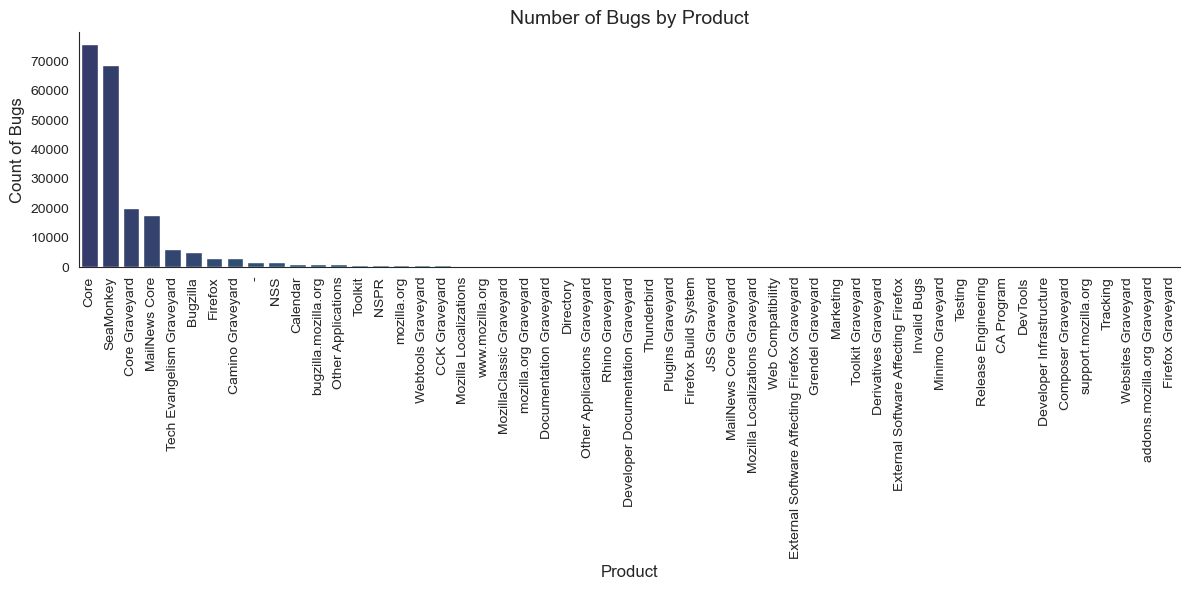

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


grouped = df.groupby('PRODUCT')['bug_id'].count().sort_values(ascending=False)

# Set the style to a seaborn theme
sns.set_style("white")

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped.index, y=grouped.values, palette='crest_r')

# Remove the top and right spines from plot
sns.despine()

# Set labels and title
plt.xlabel('Product', fontsize=12)
plt.ylabel('Count of Bugs', fontsize=12)
plt.title('Number of Bugs by Product', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


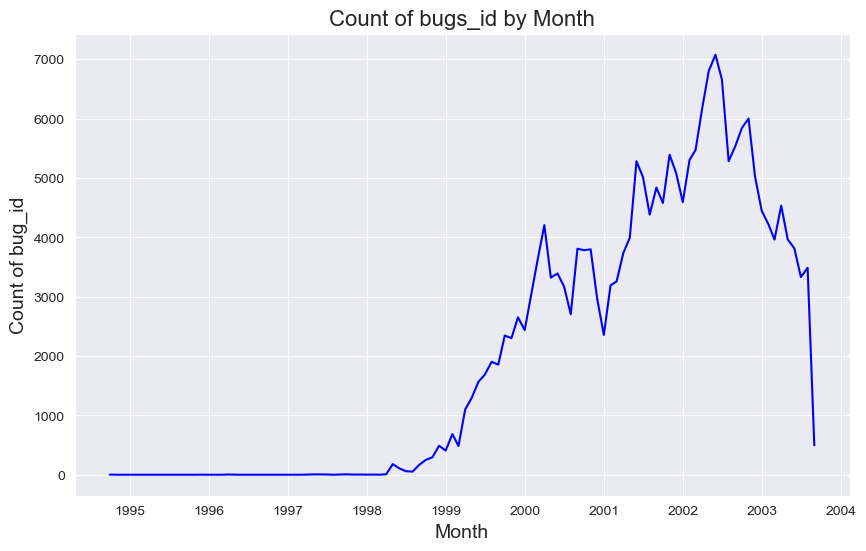

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['creation_time'] = pd.to_datetime(df['creation_time'])

# Resample the data by month and count the number of bugs_id
df_resampled = df.resample('M', on='creation_time').bug_id.count().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(data=df_resampled, x='creation_time', y='bug_id', color='blue')

plt.title('Count of bugs_id by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count of bug_id', fontsize=14)

plt.show()


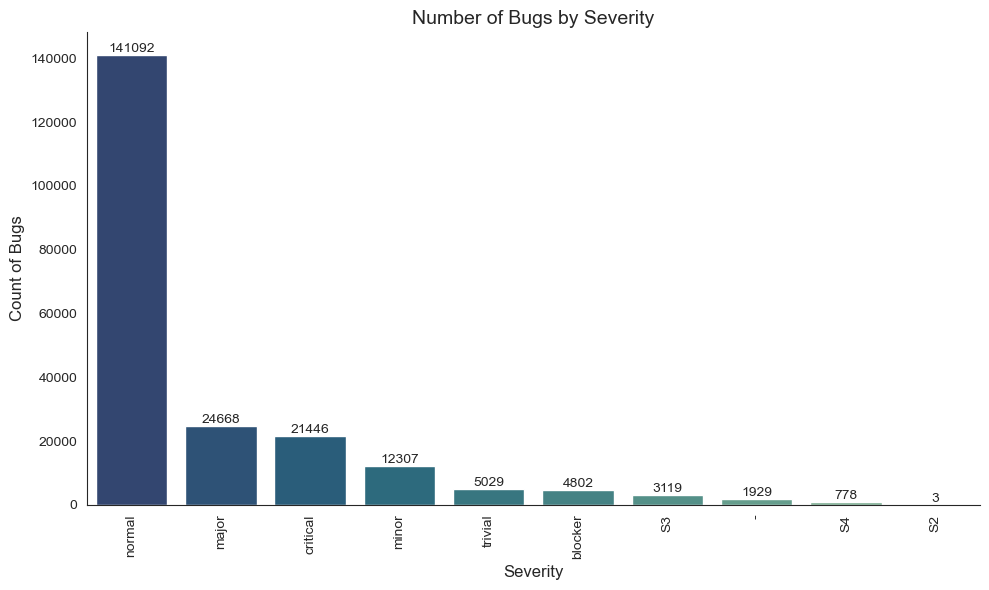

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped = df.groupby('SEVERITY')['bug_id'].count().sort_values(ascending=False)

# Set the style to a seaborn theme
sns.set_style("white")

# Create the plot
plt.figure(figsize=(10, 6))
# palette = sns.cubehelix_palette(11, start=.0, rot=-2.75)

barplot = sns.barplot(x=grouped.index, y=grouped.values, palette='crest_r')

# Remove the top and right spines from plot
sns.despine()

# Set labels and title
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Count of Bugs', fontsize=12)
plt.title('Number of Bugs by Severity', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add count numbers on top of each bar
for i, value in enumerate(grouped.values):
    barplot.text(i, value, value, ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1500x600 with 0 Axes>

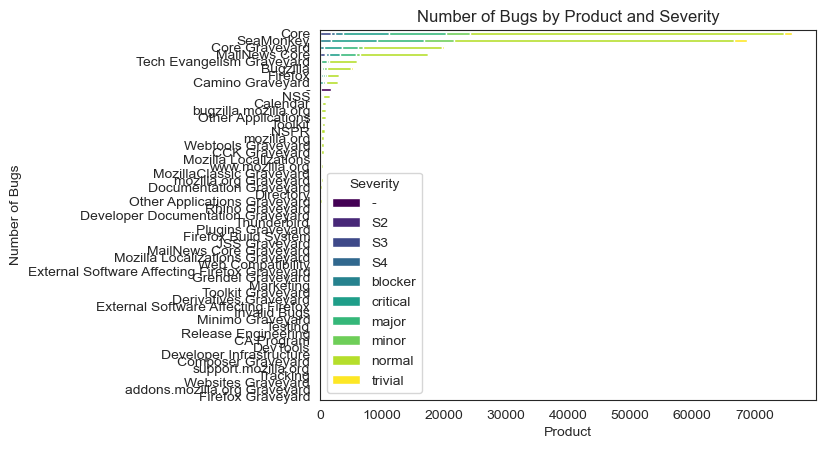

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 6))
# Aggregate the data
df_agg = df.groupby(['PRODUCT', 'SEVERITY'])['bug_id'].count().reset_index()

# Pivot the data
df_pivot = df_agg.pivot(index='PRODUCT', columns='SEVERITY', values='bug_id')

# Calculate the total number of bugs for each product
total_bugs = df_pivot.sum(axis=1)

# Sort the products by the total number of bugs
sorted_products = total_bugs.sort_values(ascending=True).index

# Reorder the DataFrame according to the sorted list of products
df_pivot = df_pivot.reindex(sorted_products)

# Plot
df_pivot.plot(kind='barh', stacked=True, colormap='viridis')

plt.xlabel('Product')
plt.ylabel('Number of Bugs')
plt.title('Number of Bugs by Product and Severity')
plt.legend(title='Severity')

plt.show()


<Figure size 1000x1500 with 0 Axes>

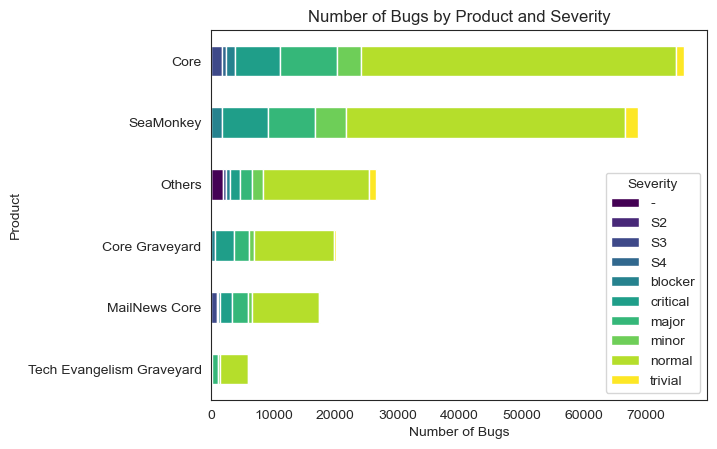

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Aggregate the data
df_agg = df.groupby(['PRODUCT', 'SEVERITY'])['bug_id'].count().reset_index()

# Calculate the total number of bugs for each product
total_bugs = df_agg.groupby('PRODUCT')['bug_id'].sum()

# Get the top 5 products
top_products = total_bugs.nlargest(5).index

# Replace the other products with 'Others'
df_agg['PRODUCT'] = df_agg['PRODUCT'].where(df_agg['PRODUCT'].isin(top_products), 'Others')

# Pivot the data
df_pivot = df_agg.groupby(['PRODUCT', 'SEVERITY'])['bug_id'].sum().unstack()

# Sort the products by the total number of bugs
sorted_products = df_pivot.sum(axis=1).sort_values(ascending=True).index

# Reorder the DataFrame according to the sorted list of products
df_pivot = df_pivot.reindex(sorted_products)

# Create a figure with a specified size
plt.figure(figsize=(10, 15))

# Plot
barplot = df_pivot.plot(kind='barh', stacked=True, colormap='viridis')

plt.xlabel('Number of Bugs')
plt.ylabel('Product')
plt.title('Number of Bugs by Product and Severity')
plt.legend(title='Severity')

# Add the count in the bar
# for p in barplot.patches:
#     width = p.get_width()
#     plt.text(width, p.get_y() + p.get_height() / 2,
#              '{:.0f}'.format(width), 
#              ha = 'left', 
#              va = 'center')

plt.show()


/var/folders/k4/zqtb5kxx0x33g50nwzjv1dmh0000gn/T/ipykernel_29192/1015706281.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resolved_duration'] = pd.cut(df['resolved_duration'], bins=bins, labels=labels)


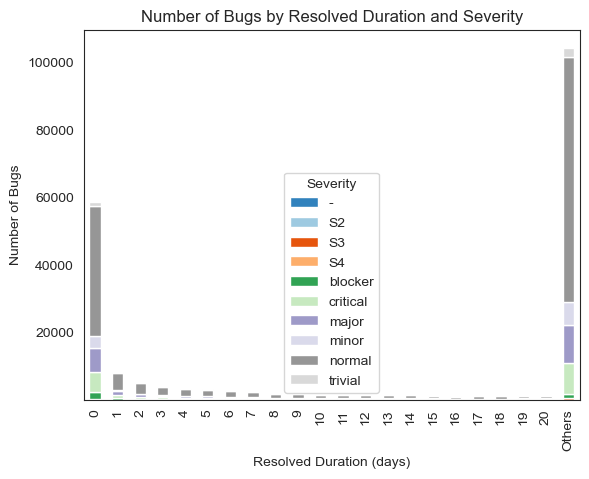

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert 'creation_time' and 'cf_last_resolved' to datetime
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['cf_last_resolved'] = pd.to_datetime(df['cf_last_resolved'])

# Calculate 'resolved_duration' in days
df['resolved_duration'] = (df['cf_last_resolved'] - df['creation_time']).dt.days

# Remove negative durations (if any)
df = df[df['resolved_duration'] >= 0]

# Separate 0-20 into individual bars and group the rest as 'Others'
bins = list(range(-1, 21)) + [df['resolved_duration'].max()]
labels = [str(i) for i in range(21)] + ['Others']
df['resolved_duration'] = pd.cut(df['resolved_duration'], bins=bins, labels=labels)

# Aggregate the data
df_agg = df.groupby(['resolved_duration', 'SEVERITY'])['bug_id'].count().reset_index()

# Pivot the data
df_pivot = df_agg.pivot(index='resolved_duration', columns='SEVERITY', values='bug_id')

# Plot
df_pivot.plot(kind='bar', stacked=True, colormap='tab20c')

plt.xlabel('Resolved Duration (days)')
plt.ylabel('Number of Bugs')
plt.title('Number of Bugs by Resolved Duration and Severity')
plt.legend(title='Severity')

plt.show()


In [64]:
df['assigned_to'].value_counts()

asa@mozilla.com            13108
nobody@mozilla.org          9642
sspitzer@mozilla.org        9148
bugs@bengoodger.com         5175
bugzilla@blakeross.com      4536
                           ...  
mozbugz@outlook.com            1
jamesbunton@fastmail.fm        1
elladan@eskimo.com             1
mycroft@iseli.org              1
daumling@adobe.com             1
Name: assigned_to, Length: 1755, dtype: int64

/var/folders/k4/zqtb5kxx0x33g50nwzjv1dmh0000gn/T/ipykernel_1788/2501004653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['assigned_to_domain'] = df['assigned_to'].str.split('@').str[1]


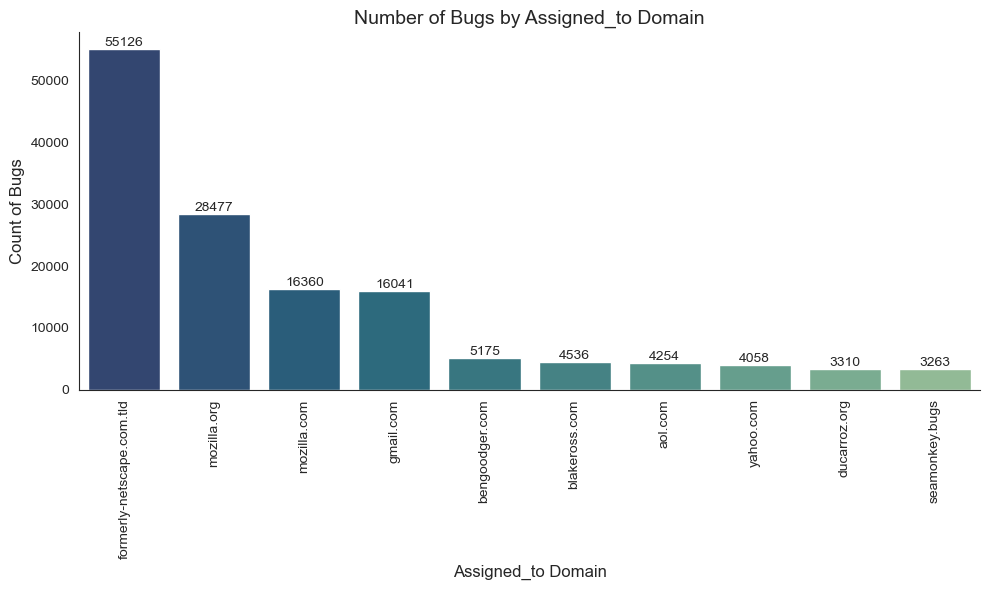

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Strip out only the domain from the email in "assigned_to" field
df['assigned_to_domain'] = df['assigned_to'].str.split('@').str[1]

grouped = df.groupby('assigned_to_domain')['bug_id'].count().sort_values(ascending=False)

# Get the top 5 'assigned_to'
top_assigned_to = grouped.nlargest(10).index

# Replace the 'assigned_to' that are not in the top 5 with 'Others'
grouped.index = grouped.index.where(grouped.index.isin(top_assigned_to))

# Re-aggregate the data
grouped = grouped.groupby(level=0).sum().sort_values(ascending=False)

# Set the style to a seaborn theme
sns.set_style("white")

# Create the plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=grouped.index, y=grouped.values, palette='crest_r')

# Remove the top and right spines from plot
sns.despine()

# Set labels and title
plt.xlabel('Assigned_to Domain', fontsize=12)
plt.ylabel('Count of Bugs', fontsize=12)
plt.title('Number of Bugs by Assigned_to Domain', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add count numbers on top of each bar
for i, value in enumerate(grouped.values):
    barplot.text(i, value, value, ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


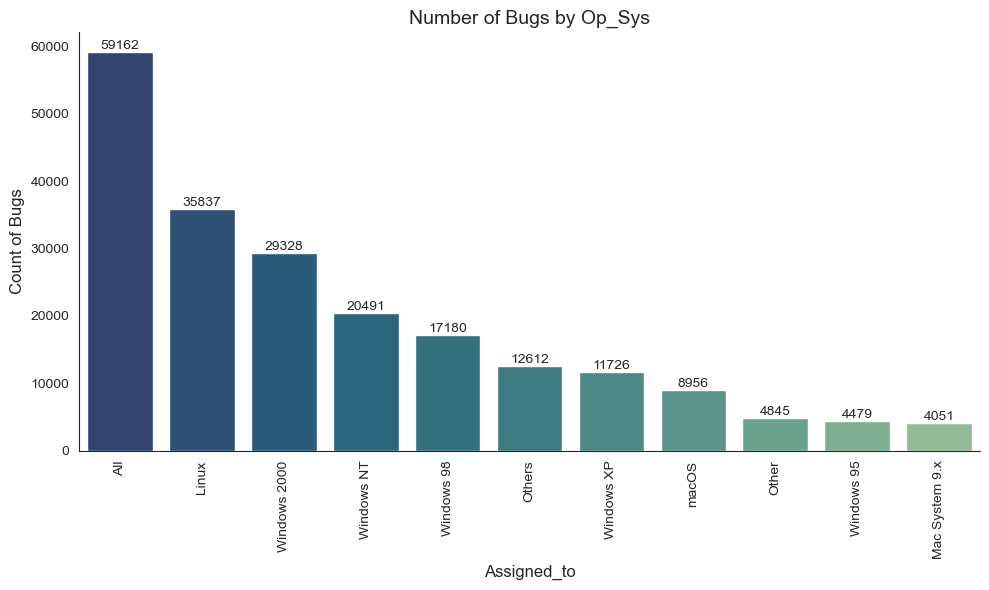

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped = df.groupby('OP_SYS')['bug_id'].count().sort_values(ascending=False)

# Get the top 5 'assigned_to'
top_assigned_to = grouped.nlargest(10).index

# Replace the 'assigned_to' that are not in the top 5 with 'Others'
grouped.index = grouped.index.where(grouped.index.isin(top_assigned_to), 'Others')

# Re-aggregate the data
grouped = grouped.groupby(level=0).sum().sort_values(ascending=False)

# Set the style to a seaborn theme
sns.set_style("white")

# Create the plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=grouped.index, y=grouped.values, palette='crest_r')

# Remove the top and right spines from plot
sns.despine()

# Set labels and title
plt.xlabel('Assigned_to', fontsize=12)
plt.ylabel('Count of Bugs', fontsize=12)
plt.title('Number of Bugs by Op_Sys', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add count numbers on top of each bar
for i, value in enumerate(grouped.values):
    barplot.text(i, value, value, ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


# Resolved Duration Boxplot

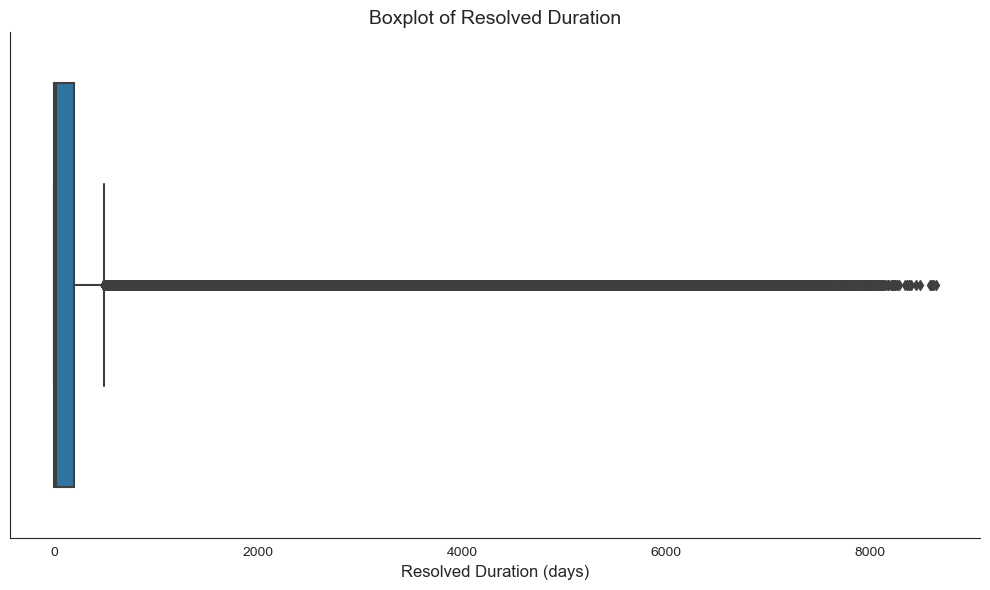

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the style to a seaborn theme
sns.set_style("white")
df['resolved_duration_num'] = (df['cf_last_resolved'] - df['creation_time']).dt.days

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['resolved_duration_num'])

# Remove the top and right spines from plot
sns.despine()

# Set labels and title
plt.xlabel('Resolved Duration (days)', fontsize=12)
plt.title('Boxplot of Resolved Duration', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df['resolved_duration_num'].describe()

count    208667.000000
mean        406.197468
std        1059.182490
min           0.000000
25%           0.000000
50%          20.000000
75%         197.000000
max        8648.000000
Name: resolved_duration_num, dtype: float64

# Bugs by Assigned_to

/var/folders/k4/zqtb5kxx0x33g50nwzjv1dmh0000gn/T/ipykernel_26574/155615701.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


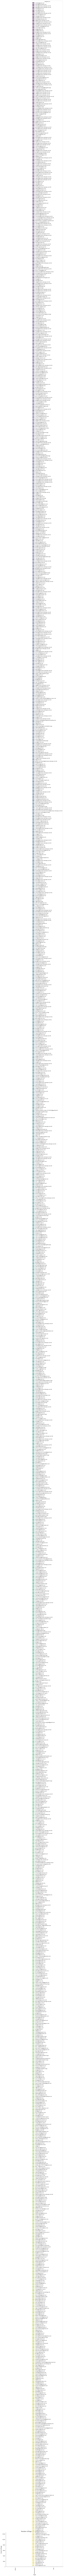

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to a seaborn theme
sns.set_style("white")

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='assigned_to', data=df, palette='viridis')

# Remove the top and right spines from plot
sns.despine()

# Set labels and title
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count of Bugs', fontsize=12)
plt.title('Number of Bugs by Type and Assigned_to', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


# Wordcloud

### Most frequent word in all summary

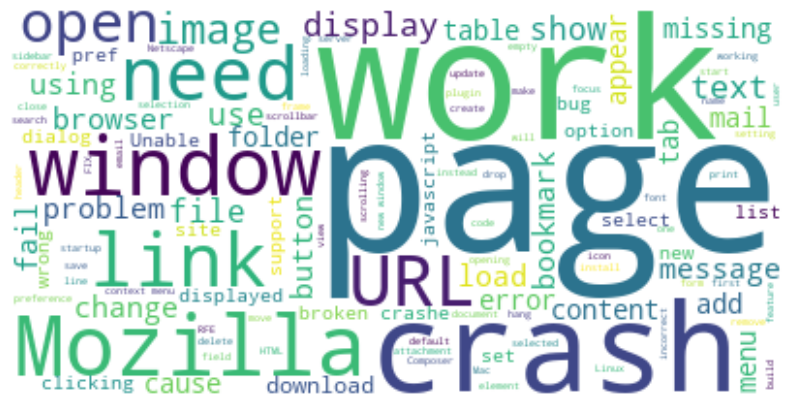

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all summaries into a single string
text = ' '.join(summary for summary in df['summary'])

# Create a WordCloud object
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# expand shoten words
def decontract(txt):
  return contractions.fix(txt)

def remove_tags(txt):
    txt = re.sub(re.compile('.<.*?>'), '', txt)
    txt = txt.translate(str.maketrans("", "", string.punctuation))
    # lower text
    txt = txt.lower()
    # expand shoten words
    txt = decontract(txt)
    txt = txt.strip()
    txt = txt.translate(str.maketrans("", "", string.punctuation))
    # tokenize text and remove puncutation
    txt = [word.strip(string.punctuation) for word in txt.split(" ")]
    # remove words that contain numbers
    txt = [word for word in txt if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    txt = [x for x in txt if x not in stop]
    # remove empty tokens
    txt = [t for t in txt if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(txt)
    # lemmatize text
    txt = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    txt = [t for t in txt if len(t) > 1]
    # join all
    txt = " ".join(txt)
    # remove numbers and specific signs
    txt = re.sub(r'\d+', '', txt)
    txt = re.sub(r'\W+', ' ', txt)
    return txt

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def text_length(text):
    text_list = text.split(' ')
    length = len(text_list)
    return length

def is_english(text):
    lang, _ = langid.classify(text)
    if lang == 'en':
        return True
    else:
        return False

def lang_detect(text):
  lang_detector = pipeline("text-classification",
                           model="papluca/xlm-roberta-base-language-detection")
  return lang_detector(text)[0]['label']


In [ ]:
pip install contractions

  Using cached contractions-0.1.73-py2.py3-none-any.whl (8.7 kB)
  Using cached textsearch-0.0.24-py2.py3-none-any.whl (7.6 kB)
  Using cached anyascii-0.3.2-py3-none-any.whl (289 kB)
  Using cached pyahocorasick-2.0.0-cp38-cp38-macosx_10_9_universal2.whl (63 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
# from keras import regularizers
# import tomotopy as tp
# import tensorflow as tf
# from transformers import RobertaTokenizerFast
# from transformers import TFRobertaModel
# from imblearn.over_sampling import RandomOverSampler
import numpy as np
import string
# import tensorflow as tf
# import tensorflow_hub as hub
import re
import contractions
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import string
from transformers import pipeline
from textblob import TextBlob
from sklearn.model_selection import train_test_split
import plotly.express as px
import warnings
import seaborn as sns
from collections import Counter
import re
import spacy
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import doc2vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from datasets import load_dataset
import evaluate
import numpy as np
# from transformers import AutoTokenizer
# from transformers import DataCollatorWithPadding
# from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from huggingface_hub import notebook_login
from rich.console import Console
from rich.table import Table
# from tensorflow.keras import layers, regularizers


warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import re

# Apply text cleaning process

#filter only summary that is not null
df_summary_1 = df[df['summary'].notna()]

# df_summary_1 = df['summary']

df_summary_1['summary_cleaned'] = df_summary_1['summary'].apply(remove_tags)
df_summary_1 = df_summary_1[df_summary_1['summary'] != '']


/var/folders/k4/zqtb5kxx0x33g50nwzjv1dmh0000gn/T/ipykernel_26574/3395499284.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_1['summary_cleaned'] = df_summary_1['summary'].apply(remove_tags)


### Most frequent word in summary that is Critical Severity bug

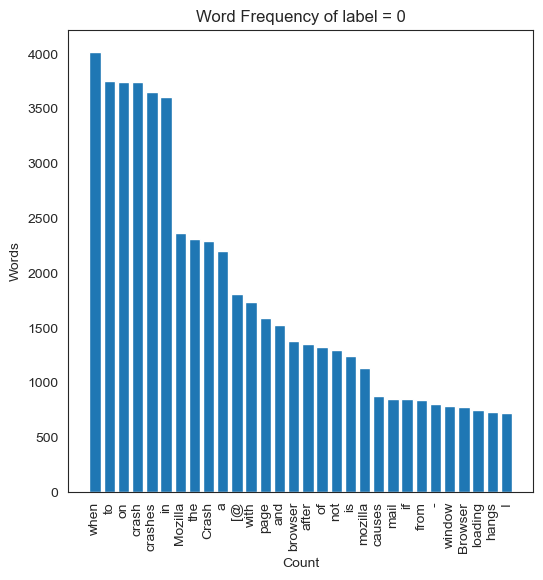

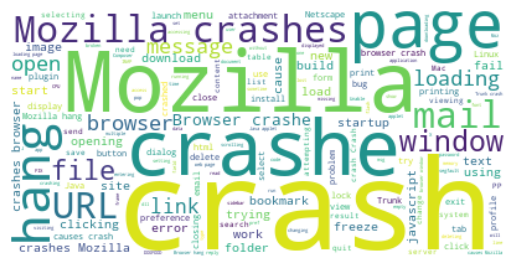

In [ ]:
#import counter
from collections import Counter

text = ' '.join(review for review in df['summary'][df['severity'] == 'critical'])

# Split the text into words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the 10 most common words
top_30_words = word_counts.most_common(30)

removed_common_words=word_counts.most_common(1)

# Separate the words and their counts into two lists
words = [word[0] for word in top_30_words]
counts = [word[1] for word in top_30_words]

# Create the bar graph
fig = plt.figure(1, figsize = (6, 6))
plt.bar(words, counts)
#rotate x-axis labels
plt.xticks(rotation=90)
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Word Frequency of label = 0')
plt.show()

wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Severity x Priority

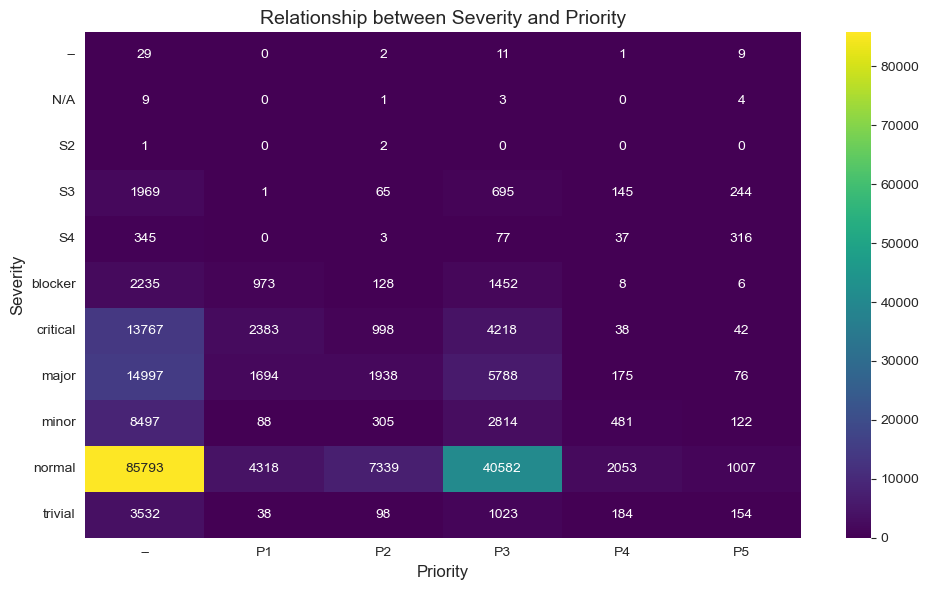

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a cross-tabulation of 'severity' and 'priority'
cross_tab = pd.crosstab(df['severity'], df['priority'])

# Set the style to a seaborn theme
sns.set_style("white")

# Create the plot
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, cmap='viridis', annot=True, fmt='d')

# Set labels and title
plt.xlabel('Priority', fontsize=12)
plt.ylabel('Severity', fontsize=12)
plt.title('Relationship between Severity and Priority', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


# Avg. Resolution Duration x Severity Level

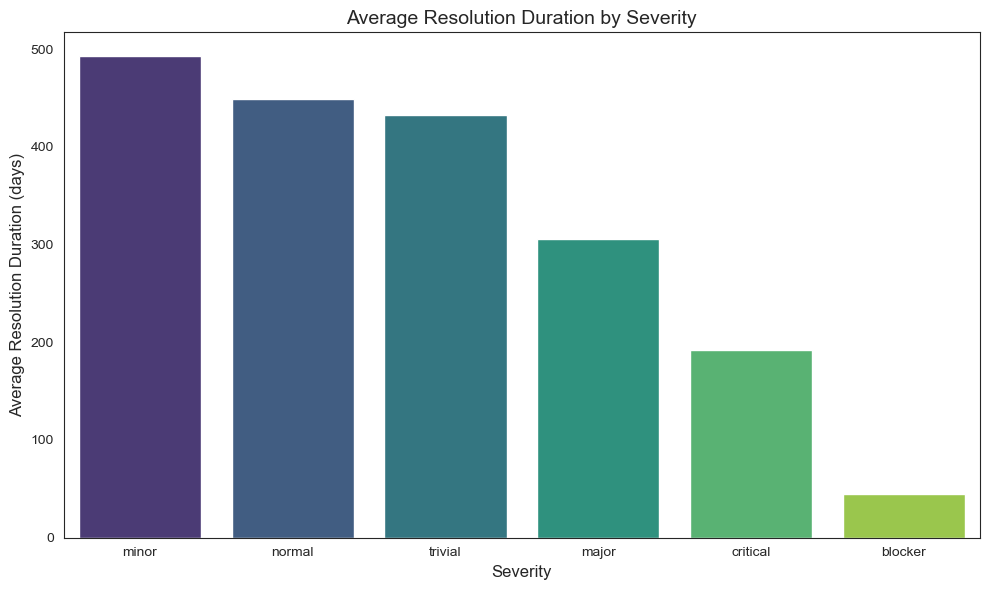

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'creation_time' and 'cf_last_resolved' to datetime
df['creation_time_date'] = pd.to_datetime(df['creation_time'])
df['cf_last_resolved_date'] = pd.to_datetime(df['cf_last_resolved'])

# # Calculate the resolution duration
# df['resolution_duration'] = (df['cf_last_resolved'] - df['creation_time']).dt.days

df['resolved_duration_num'] = (df['cf_last_resolved_date'] - df['creation_time_date']).dt.days

values_to_remove = ['N/A', 'S1', '--', 'S4', 'S3', 'S2']
df_2 = df[~df['severity'].isin(values_to_remove)]


# Calculate the average resolution duration for each severity level
grouped = df_2.groupby('severity')['resolved_duration_num'].mean().sort_values(ascending=False)

# Set the style to a seaborn theme
sns.set_style("white")

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped.index, y=grouped.values, palette='viridis')

# Set labels and title
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Average Resolution Duration (days)', fontsize=12)
plt.title('Average Resolution Duration by Severity', fontsize=14)

# Add count numbers on top of each bar
for i, value in enumerate(grouped.values):
    barplot.text(i, value, round(value, 2), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/k4/zqtb5kxx0x33g50nwzjv1dmh0000gn/T/ipykernel_29192/4284070800.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_until_resolved'] = (df['cf_last_resolved'] - df['creation_time']).dt.days
/var/folders/k4/zqtb5kxx0x33g50nwzjv1dmh0000gn/T/ipykernel_29192/4284070800.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_until_resolved'].where(df['days_until_resolved'] <= 20, inplace=True)


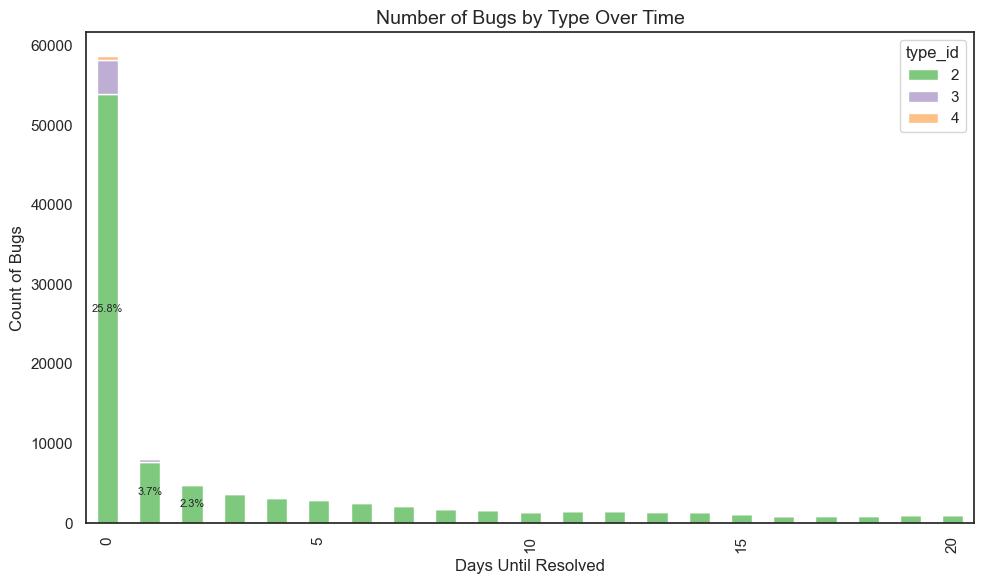

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# df['creation_time'] = pd.to_datetime(df['creation_time'], errors='coerce')
# df['cf_last_resolved'] = pd.to_datetime(df['cf_last_resolved'], errors='coerce')

df['days_until_resolved'] = (df['cf_last_resolved'] - df['creation_time']).dt.days

df['days_until_resolved'].where(df['days_until_resolved'] <= 20, inplace=True)

grouped = df.groupby(['days_until_resolved', 'type_id']).size().reset_index(name='counts')

pivot_df = grouped.pivot(index='days_until_resolved', columns='type_id', values='counts')
pivot_df = pivot_df.fillna(0)  
total_bugs = df['type_id'].count()

sns.set(style="white")

# Get the 'Pastel1' color palette
colors = sns.color_palette('Accent', n_colors=len(pivot_df.columns))

ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), grid=False, color=colors)

plt.xlabel('Days Until Resolved', fontsize=12)
plt.ylabel('Count of Bugs', fontsize=12)
plt.title('Number of Bugs by Type Over Time', fontsize=14)

plt.xticks(ticks=np.arange(0, 21, 5), labels=np.arange(0, 21, 5).astype(int), rotation=90)

for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    percentage = (height / total_bugs) * 100
    
    label_text = f'{percentage:.1f}%'  
    
    label_x = x + width / 2
    label_y = y + height / 2

    if i < len(pivot_df.columns):
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
import psycopg2
import psycopg2.extras
import pandas as pd

# Let's try to connect and print some info
try:
    connection = psycopg2.connect(dbname=dbname,
                            user=user,
                            password=password,
                            host=host,
                            port=port,
                            cursor_factory=psycopg2.extras.RealDictCursor)  # Use RealDictCursor
    cursor = connection.cursor()

    # Execute the query
    cursor.execute("SELECT * FROM final.BUG_TABLE as bug LEFT JOIN final.product_table AS product on bug.product_id = product.\"PRODUCT_ID\" LEFT JOIN final.severity_table severity on bug.severity_id = severity.\"SEVERITY_ID\" LEFT JOIN final.op_sys_table op_sys on bug.op_sys_id = op_sys.\"OP_SYS_ID\"")

    # Use chunked reading
    while True:
        rows = cursor.fetchmany(size=1000000000)  # Adjust size as needed
        if not rows:
            break

        # Convert the result into a pandas DataFrame
        df_3 = pd.DataFrame(rows)

        # Print the DataFrame
        print(df)

except psycopg2.Error as error:
    print("Warning!", error)

finally:
    if connection is not None:
        cursor.close()
        connection.close()

# Task 3

In [71]:
# to create a spark session object
from pyspark.sql import SparkSession
# data types
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql.functions import col
from pyspark.sql.functions import year
from pyspark.sql.functions import col as spark_col
from pyspark.sql.functions import mean, max, min, count



In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# Open a session with Postgre
spark_postgre = SparkSession \
    .builder \
    .appName("bugs_v1") \
    .config("spark.jars", "/Users/zhao/Desktop/postgresql-42.6.0.jar") \
    .getOrCreate()

23/07/21 15:18:01 WARN Utils: Your hostname, Tans-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.210.6.74 instead (on interface en0)
23/07/21 15:18:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
23/07/21 15:18:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
23/07/21 15:18:02 WARN DependencyUtils: Local jar /Users/zhao/Desktop/postgresql-42.6.0.jar does not exist, skipping.
23/07/21 15:18:02 INFO SparkContext: Running Spark version 3.2.1
23/07/21 15:18:02 INFO ResourceUtils: ==============================================================
23/07/21 15:18:02 INFO ResourceUtils: No custom resources configured for spark.driver.
23/07/21 15:18:02 INFO ResourceUtils: ==============================================================
23/07/21 15:18:02 INFO SparkContext: Submitted application: b

Py4JJavaError: An error occurred while calling None.org.apache.spark.api.java.JavaSparkContext.
: java.lang.IllegalAccessError: class org.apache.spark.storage.StorageUtils$ (in unnamed module @0x3f025b6b) cannot access class sun.nio.ch.DirectBuffer (in module java.base) because module java.base does not export sun.nio.ch to unnamed module @0x3f025b6b
	at org.apache.spark.storage.StorageUtils$.<init>(StorageUtils.scala:213)
	at org.apache.spark.storage.StorageUtils$.<clinit>(StorageUtils.scala)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.<init>(BlockManagerMasterEndpoint.scala:110)
	at org.apache.spark.SparkEnv$.$anonfun$create$9(SparkEnv.scala:348)
	at org.apache.spark.SparkEnv$.registerOrLookupEndpoint$1(SparkEnv.scala:287)
	at org.apache.spark.SparkEnv$.create(SparkEnv.scala:336)
	at org.apache.spark.SparkEnv$.createDriverEnv(SparkEnv.scala:191)
	at org.apache.spark.SparkContext.createSparkEnv(SparkContext.scala:277)
	at org.apache.spark.SparkContext.<init>(SparkContext.scala:460)
	at org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
	at java.base/jdk.internal.reflect.DirectConstructorHandleAccessor.newInstance(DirectConstructorHandleAccessor.java:67)
	at java.base/java.lang.reflect.Constructor.newInstanceWithCaller(Constructor.java:500)
	at java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:484)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:238)
	at py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
	at py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1623)


In [ ]:
# Read data from PostgreSQL running at localhost
params = spark_postgre.read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://localhost:5432/smm695_fcp") \
    .option("user", "postgres") \
    .option("password", "0776@zzW") \
    .option("driver", "org.postgresql.Driver")

df_0 = params \
    .option("dbtable", "final.bugs") \
    .load()

df_0.printSchema()

root
 |-- id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- classification: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- creator: string (nullable = true)
 |-- qa_contact: string (nullable = true)
 |-- creation_time: string (nullable = true)
 |-- last_change_time: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- cf_last_resolved: string (nullable = true)
 |-- op_sys: string (nullable = true)
 |-- resolution: string (nullable = true)
 |-- platform: string (nullable = true)
 |-- keywords: string (nullable = true)
 |-- is_creator_accessible: string (nullable = true)
 |-- is_confirmed: string (nullable = true)
 |-- votes: string (nullable = true)
 |-- url: string (nullable = true)
 |-- severity: string (nullable = true)
 |-- product: string (nullable = true)
 |-- is_cc_accessible: string (nullable = true)
 |-- version: string (nullable = true)
 |-- update_token: string (nullable = true)
 |-- component: string (nullable =

In [ ]:
df_0.describe([ 'id',
               'type_new','product_new','classification_new',
               'priority_new','resolution_new',
               'severity_new','status_new',
               'comment_count','creation_time_new',
               'cf_last_resolved_new',
               'op_sys_new','platform_new']).show()

23/07/21 10:57:48 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+--------+--------------------+------------------+------------+--------------+--------------+----------+------------------+----------+------------+
|summary|                id|type_new|         product_new|classification_new|priority_new|resolution_new|  severity_new|status_new|     comment_count|op_sys_new|platform_new|
+-------+------------------+--------+--------------------+------------------+------------+--------------+--------------+----------+------------------+----------+------------+
|  count|            207894|  207894|              207894|            207894|      207894|        207894|        207894|    207894|            207894|    207894|      207894|
|   mean|107617.39369582575|    null|                null|              null|        null|          null|          null|      null|10.042415846537178|      null|        null|
| stddev| 62076.18591163021|    null|                null|              null|        null|          null|          null|     

In [ ]:
# Create a new DataFrame to save the selected variables
df = df_0.select(F.col('id'),F.col("type_new"), F.col("product_new"),F.col('classification_new'),
                F.col('comment_count'), F.col('op_sys_new'),F.col('platform_new'),
                F.col("creation_time_new"), F.col("cf_last_resolved_new"),
                F.col("priority_new"),F.col("resolution_new"),
                F.col("severity_new"),F.col("status_new"),
                F.col("is_open")
                
                )

df.describe().show()

+-------+------------------+--------+--------------------+------------------+------------------+----------+------------+------------+--------------+--------------+----------+-------+
|summary|                id|type_new|         product_new|classification_new|     comment_count|op_sys_new|platform_new|priority_new|resolution_new|  severity_new|status_new|is_open|
+-------+------------------+--------+--------------------+------------------+------------------+----------+------------+------------+--------------+--------------+----------+-------+
|  count|            207894|  207894|              207894|            207894|            207894|    207894|      207894|      207894|        207894|        207894|    207894| 207894|
|   mean|107617.39369582575|    null|                null|              null|10.042415846537178|      null|        null|        null|          null|          null|      null|   null|
| stddev| 62076.18591163021|    null|                null|              null|14.16833

In [ ]:
# add a new column lifespan: how long the issue existed
df = df.withColumn('span_days', F.datediff(df.cf_last_resolved_new, df.creation_time_new)) 
# Adding a new column "year" by extracting the year from "creation_time"
df = df.withColumn("year", year("creation_time_new"))
# Convert the column to numeric type
df = df.withColumn("comment_count", spark_col("comment_count").cast("int"))


In [ ]:
df_d = df.select(['type_new','product_new','classification_new',
           'op_sys_new','platform_new','priority_new',
           'resolution_new','severity_new',
           'status_new','is_open','comment_count','span_days']).describe().show(5)



+-------+--------+--------------------+------------------+----------+------------+------------+--------------+--------------+----------+-------+------------------+------------------+
|summary|type_new|         product_new|classification_new|op_sys_new|platform_new|priority_new|resolution_new|  severity_new|status_new|is_open|     comment_count|         span_days|
+-------+--------+--------------------+------------------+----------+------------+------------+--------------+--------------+----------+-------+------------------+------------------+
|  count|  207894|              207894|            207894|    207894|      207894|      207894|        207894|        207894|    207894| 207894|            207894|            207755|
|   mean|    null|                null|              null|      null|        null|        null|          null|          null|      null|   null|10.042415846537178|402.40747996438114|
| stddev|    null|                null|              null|      null|        null|   

## Machine Learning on Predicting Analysis

In [ ]:
# Loading the library
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.sql.functions import year

## Prediction of the severity classification -Random Forest

In [ ]:
grouped_data = df.groupBy("severity_new").agg(
    mean("span_days").alias("span_days"),
    mean("comment_count").alias("comment_count"),
    # min("column3").alias("min_column3"),
    count("id").alias("id")
)

# Step 4: Show the results
grouped_data.show()


+--------------+------------------+------------------+------+
|  severity_new|         span_days|     comment_count|    id|
+--------------+------------------+------------------+------+
|          High| 263.2042011370987| 11.52805931569281| 29402|
|           Low| 427.8129901467927| 7.805382606949187|  4979|
|Severity S1-S4| 7595.315151515151|21.175757575757576|   165|
|        Medium|448.99846509575036| 9.516277477501202|151897|
|             -| 7533.037037037037| 32.81481481481482|    27|
|      Critical|192.77736271946208|12.139329723674384| 21424|
+--------------+------------------+------------------+------+



In [ ]:
columns_to_encode = ['type_new',
                     'product_new',
               'priority_new',
               'resolution_new',
               'classification_new',
               'status_new',
               'op_sys_new',
               'platform_new']

In [ ]:
indexers = []
encoders = []

for col in columns_to_encode:
    indexer = StringIndexer(inputCol=col, outputCol=col + "_index")
    encoder = OneHotEncoder(inputCols=[indexer.getOutputCol()], outputCols=[col + "_encoded"])
    indexers.append(indexer)
    encoders.append(encoder)

# Create a list of all the feature columns that will be used in the VectorAssembler
feature_cols = [col + "_encoded" for col in columns_to_encode]
# +['span_days']+['comment_count']

In [ ]:
# Apply all transformations to the DataFrame
df_encoded = df
for indexer, encoder in zip(indexers, encoders):
    df_encoded = indexer.fit(df_encoded).transform(df_encoded)
    df_encoded = encoder.fit(df_encoded).transform(df_encoded)

# Create the VectorAssembler to combine all encoded features
assembler = VectorAssembler(inputCols=feature_cols, 
                            outputCol="features")

# Apply the VectorAssembler to the DataFrame
df_assembled = assembler.transform(df_encoded)

# The "df_assembled" DataFrame now contains the "features" column with the combined encoded features
df_assembled.select(['features']).show()

+--------------------+
|            features|
+--------------------+
|(47,[0,4,14,19,28...|
|(47,[0,4,14,21,29...|
|(47,[0,4,13,18,28...|
|(47,[1,4,13,22,29...|
|(47,[0,4,13,21,29...|
|(47,[4,14,19,28,3...|
|(47,[1,3,13,21,27...|
|(47,[0,4,13,19,27...|
|(47,[0,4,13,20,28...|
|(47,[0,3,13,21,27...|
|(47,[4,13,22,30,3...|
|(47,[0,3,13,18,27...|
|(47,[0,4,14,18,29...|
|(47,[0,4,13,19,28...|
|(47,[0,4,14,22,28...|
|(47,[0,5,14,21,28...|
|(47,[0,5,13,21,28...|
|(47,[0,3,13,21,27...|
|(47,[4,13,20,29,3...|
|(47,[0,6,13,18,27...|
+--------------------+
only showing top 20 rows



In [ ]:
# Indexing 'binary'
idx_1 = StringIndexer() \
        .setInputCol("severity_new") \
        .setOutputCol("severity_idx")
        
df_assembled = idx_1.fit(df_assembled).transform(df_assembled)


In [ ]:
df_assembled.describe().show()

+-------+------------------+--------+--------------------+------------------+------------------+----------+------------+------------+--------------+--------------+----------+-------+------------------+------------------+-------------------+------------------+------------------+--------------------+------------------------+-------------------+------------------+------------------+------------------+
|summary|                id|type_new|         product_new|classification_new|     comment_count|op_sys_new|platform_new|priority_new|resolution_new|  severity_new|status_new|is_open|         span_days|              year|     type_new_index| product_new_index|priority_new_index|resolution_new_index|classification_new_index|   status_new_index|  op_sys_new_index|platform_new_index|      severity_idx|
+-------+------------------+--------+--------------------+------------------+------------------+----------+------------+------------+--------------+--------------+----------+-------+--------------

In [ ]:
# Step 5: Split the data into training and testing sets
train_data, test_data = df_assembled.randomSplit([0.7, 0.3], seed=42)


In [ ]:
# Step 6: Build the machine learning model (Random Forest Classifier)
rf = RandomForestClassifier(labelCol="severity_idx", featuresCol="features")

# Step 7: Train the model on the training data
model = rf.fit(train_data)

# Step 8: Evaluate the model on the testing data
predictions = model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="severity_idx", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 73.08%


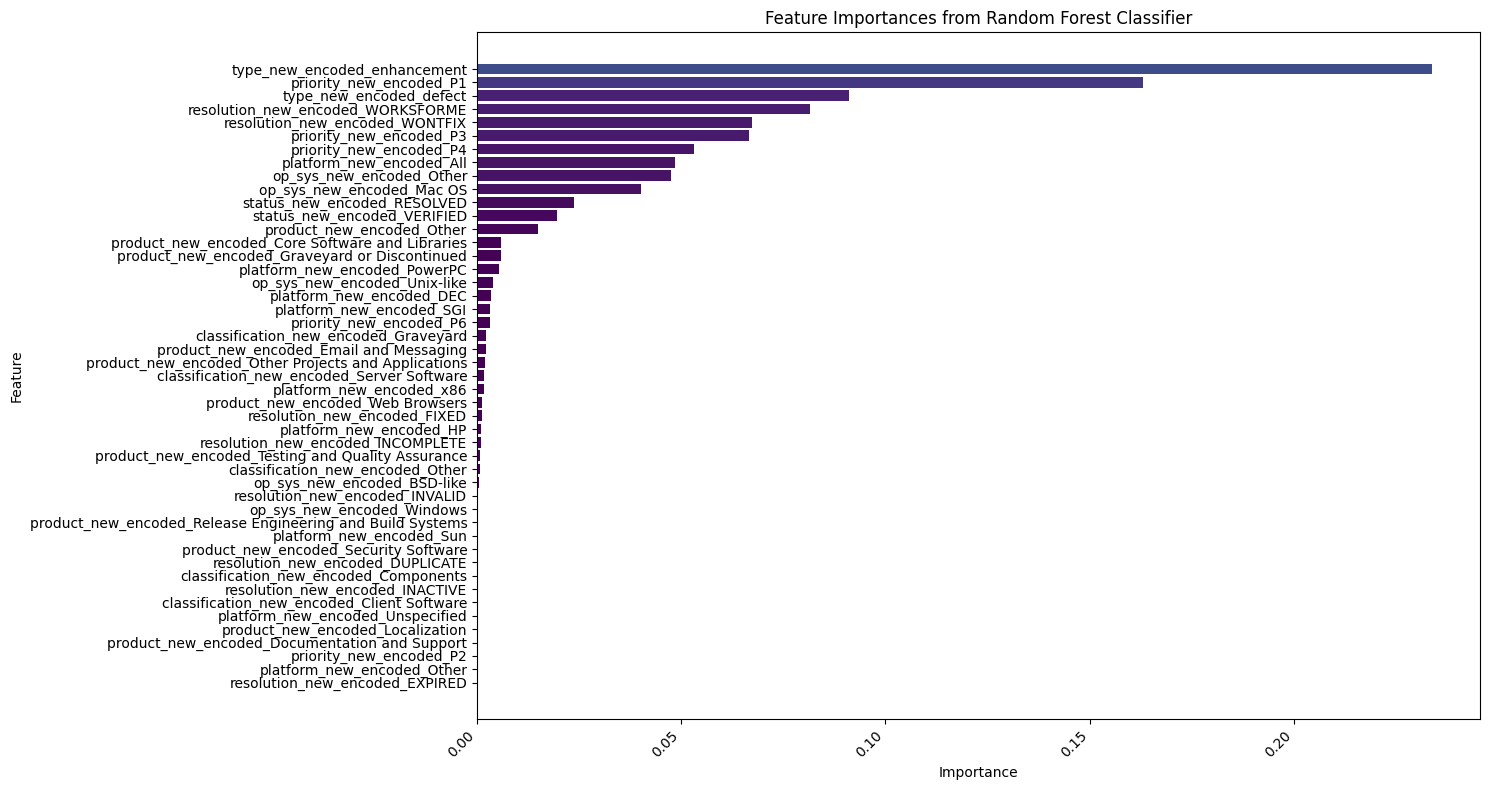

In [ ]:
# Get feature importances
importances = model.featureImportances

# Get the dict_values object from the DataFrame
attr_data = df_assembled.schema["features"].metadata["ml_attr"]["attrs"].values()

# Convert the dict_values object to a list
attr_list = list(attr_data)

# mapping the index and the column name
attrs = sorted(
    (attr["idx"], attr["name"])
    for attr in attr_list[0]
)

# Create a DataFrame to hold feature names and their importances
importance_df = pd.DataFrame({'Feature': [name for idx, name in attrs],
                              'Importance': [importances[idx] for idx, name in attrs]
                             })

# Sort the DataFrame in descending order of importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)


# Create a colormap using 'viridis'
colormap = plt.cm.viridis

# Create a horizontal bar chart for feature importances with colors based on importance values
plt.figure(figsize=(15, 8))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color=colormap(importance_df['Importance']))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Classifier')

# Add a color bar to show the mapping between importance values and colors
# cbar = plt.colorbar(bars)
# cbar.ax.set_ylabel('Importance')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Prediction of the span_days

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
import numpy as np
import scipy.stats as stats

In [ ]:
numerical_cols = ["year", "span_days", "comment_count"]


In [ ]:
df = df.withColumn("span_days", df["span_days"].cast(IntegerType()))
df = df.withColumn("comment_count", df["comment_count"].cast(IntegerType()))


In [ ]:
df=df.na.drop("any")

In [ ]:
columns_to_encode = ['type_new',
                     'product_new',
               'priority_new',
               'resolution_new',
               'classification_new',
               'status_new',
               'op_sys_new',
               'platform_new',
               'severity_new']

In [ ]:
# Features table
# columns_to_encode = ["priority_new", "resolution_new", "severity_new", "status_new",'year']

indexers = []
encoders = []

for col in columns_to_encode:
    indexer = StringIndexer(inputCol=col, outputCol=col + "_index")
    encoder = OneHotEncoder(inputCols=[indexer.getOutputCol()], outputCols=[col + "_encoded"])
    indexers.append(indexer)
    encoders.append(encoder)

# Create a list of all the feature columns that will be used in the VectorAssembler
# feature_cols = [col + "_encoded" for col in columns_to_encode]

# Apply all transformations to the DataFrame
df_encoded = df
for indexer, encoder in zip(indexers, encoders):
    df_encoded = indexer.fit(df_encoded).transform(df_encoded)
    df_encoded = encoder.fit(df_encoded).transform(df_encoded)



In [ ]:
# Create the VectorAssembler to combine all encoded features
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")


# Apply the VectorAssembler to the DataFrame
df_assembled_lr = assembler.transform(df_encoded)

# The "df_assembled" DataFrame now contains the "features" column with the combined encoded features
# df_assembled.select(['features']).show()

# # Applying some transformation: String indexer
# # Indexing 'binary'
# idx_1 = StringIndexer() \
#         .setInputCol("type_new") \
#         .setOutputCol("type_idx")
        
# df_assembled = idx_1.fit(df_assembled).transform(df_assembled)

# Step 5: Split the data into training and testing sets
train_data, test_data = df_assembled_lr.randomSplit([0.7, 0.3], seed=42)

svr_model = LinearRegression(featuresCol='features', labelCol='span_days', regParam=0.0)
# Fit the model to the training data
svr_model_fit = svr_model.fit(train_data)

# Make predictions on the test data
predictions = svr_model_fit.transform(test_data)

# Evaluate the model's performance using RMSE
evaluator = RegressionEvaluator(labelCol='span_days', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")


23/07/21 11:54:26 WARN Instrumentation: [159d4366] regParam is zero, which might cause numerical instability and overfitting.
23/07/21 11:54:33 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/07/21 11:54:33 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Root Mean Squared Error (RMSE): 834.2891761795684


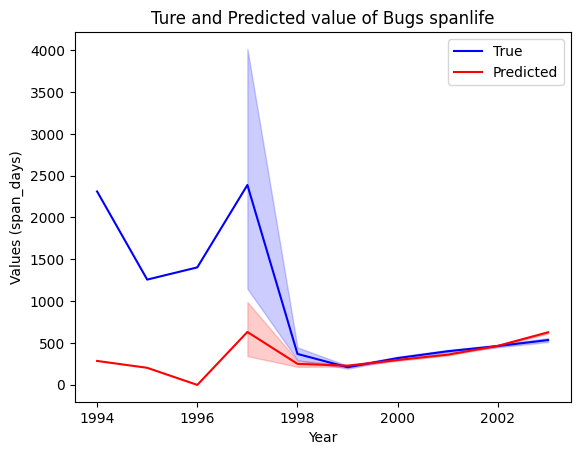

In [ ]:
# Convert the predictions DataFrame to a Pandas DataFrame
predictions_pd = predictions.select('span_days', 'prediction', 'year').toPandas()

# Create a line chart using Seaborn
sns.lineplot(x='year', y='span_days', data=predictions_pd, color='blue', label='True')
sns.lineplot(x='year', y='prediction', data=predictions_pd, color='red', label='Predicted')

plt.xlabel('Year')
plt.ylabel('Values (span_days)')
plt.title('Ture and Predicted value of Bugs spanlife')
plt.legend()
plt.show()